In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

import graphviz
from graphviz import Source

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1 - Data Understanding and Preparation
---------------------------------------------

(1). [25] **Data Understanding and Prep:** Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set.
    - (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside. 
    - (1.2) On the training set:
        - Plot the correlations between all the continuous features. Discuss what you see in these plots.
        - For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.
        - For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.

### Objectives
------------------------
I will be using the previously cleaned dataset used in homework 1 for this model exploration. The objectives of this section are:


1. Refamiliarise ourselves with the data and to check for any obvious errors or issues.


2. If necessary modify existing features so that they are more applicable to the models


3. Investigate correlations between the continuous features


4. Investigate the interaction of each continuous feature with the target feature. Select a subset (if any) of promising continuous features


5. Investigate the interaction of each categorical feature with the target feature. Select a subset (if any) of promising categorical features

## 1.1 - Data quality

Although we will be using a previously cleaned dataset it is important to refamiliarise ourselves with the data, especially in the context of training a predictive model.

In [5]:
# Import dataset
df = pd.read_csv("HW2_start.csv", keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)



In [6]:
df

,Animal_ID,Admission,Found_Location,Type,Condition,Animal_Type,Admission_Sex,Admission_Age,Breed,Colour,...,Discharge_Sex,Discharge_Age,binary_outcome,Admission_Spayed/Neutered,Discharge_Spayed/Neutered,Found_Area,Mix/PureBred,Mixed/Single_Color,Time_In_Shelter,Admission_Month
0,A680584,2014-06-04 15:55:00,4702 Little Hill Circle in Austin (TX),Stray,Normal,Cat,Unknown,15,Domestic Shorthair Mix,Brown Tabby,...,Unknown,15,0.0,Unknown,Unknown,Austin (TX),Mixed,Single colour,0,6
1,A797922,2019-06-19 13:08:00,Stassney in Austin (TX),Stray,Normal,Cat,Female,365,Domestic Shorthair,White/Brown Tabby,...,Female,371,0.0,Intact,Intact,Austin (TX),Purebred,Mixed Colour,6,6
2,A690783,2014-10-26 08:37:00,Westgate & 290 in Austin (TX),Stray,Normal,Cat,Female,35,Domestic Shorthair Mix,Brown Tabby,...,Female,93,0.0,Intact,Spayed,Austin (TX),Mixed,Single colour,58,10
3,A776412,2018-07-13 12:12:00,Lost Creek in Austin (TX),Stray,Normal,Dog,Male,242,Siberian Husky Mix,White/Black,...,Male,250,0.0,Intact,Neutered,Austin (TX),Mixed,Mixed Colour,8,7
4,A759720,2017-10-06 13:43:00,235 Corinthian in Austin (TX),Stray,Normal,Cat,Male,61,Domestic Shorthair Mix,Black,...,Male,66,0.0,Intact,Neutered,Austin (TX),Mixed,Single colour,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,A734990,2016-09-16 13:55:00,Austin (TX),Owner Surrender,Normal,Cat,Male,62,Domestic Shorthair Mix,Brown Tabby,...,Male,70,0.0,Intact,Neutered,Austin (TX),Mixed,Single colour,8,9
988,A740697,2017-11-29 12:17:00,Austin (TX),Public Assist,Normal,Dog,Male,496,Chihuahua Shorthair Mix,Sable,...,Male,504,0.0,Intact,Neutered,Austin (TX),Mixed,Single colour,8,11
989,A708894,2015-09-01 14:38:00,Leander (TX),Owner Surrender,Normal,Cat,Female,395,Domestic Shorthair Mix,Calico,...,Female,399,0.0,Spayed,Spayed,Leander (TX),Mixed,Single colour,4,9
990,A766637,2018-02-13 12:04:00,Del Valle (TX),Owner Surrender,Normal,Cat,Male,92,Domestic Medium Hair Mix,Brown Tabby,...,Male,93,0.0,Intact,Neutered,Del Valle (TX),Mixed,Single colour,1,2


In [7]:
df["Type"].value_counts()

Stray                 702
Owner Surrender       185
Public Assist          61
Wildlife               38
Euthanasia Request      6
Name: Type, dtype: int64

#### Check for duplicate columns and rows

In [8]:
# Columns
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

# Display the duplicate columns
dfT[dfT.duplicated(keep=False)]

Number of duplicate (excluding first) columns in the table is:  1
Number of duplicate (including first) columns in the table is:  2


,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
Admission_Sex,Unknown,Female,Female,Male,Male,Female,Female,Unknown,Male,Female,...,Female,Female,Female,Male,Female,Male,Male,Female,Male,Female
Discharge_Sex,Unknown,Female,Female,Male,Male,Female,Female,Unknown,Male,Female,...,Female,Female,Female,Male,Female,Male,Male,Female,Male,Female


In [9]:
# Rows
print("Number of duplicate (excluding first) rows in the table is: ", df.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  df[df.duplicated(keep=False)].shape[0])

# Display the duplicate columns
df[df.duplicated(keep=False)]

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate (including first) columns in the table is:  0


,Animal_ID,Admission,Found_Location,Type,Condition,Animal_Type,Admission_Sex,Admission_Age,Breed,Colour,...,Discharge_Sex,Discharge_Age,binary_outcome,Admission_Spayed/Neutered,Discharge_Spayed/Neutered,Found_Area,Mix/PureBred,Mixed/Single_Color,Time_In_Shelter,Admission_Month


- Columns: Found that Discharge_Sex and Admission_Sex are duplicate columns, therefore Discharge_Sex will be dropped and Admission_Sex will be renamed to sex


- Rows: No duplicate rows were found

In [10]:
df = df.drop("Discharge_Sex",axis=1)
df = df.rename(columns={"Admission_Sex": "Sex"})

#### Unsuitable Features

There are a number of features which immidiately stand out as no longer holding any value to the model training. These features are:
- Admission_Month (New feature added in the previous homework)
- Found_Location (Binned into the new feature Found_Area which will be maintained)
- Animal_ID (Holds no salient information)

In [11]:
df = df.drop(["Admission_Month","Found_Location","Animal_ID"],axis=1)

## 1.2 - Feature Modification
- There are a number of features (especially those with higher cardinality) which could be further modified to make them more amenable to a ML model. These Features include:
     - Admission/Discharge
     - Animal_Type
     - Colour
     - Breed
     - Admission/Discharge_Spayed/Neutered
     - Age
     

     

##### Admission/Discharge

Admission/Discharge are both timestamps of when the animal was admitted and discharged. In this format is an ordinal feature. To gain better insight into how admission and discharge times may affect it was decided that breaking the timestamp into individual time components (e.g. day, month, year) may be more insightful

In [12]:
# Convert to datetime objects
df['Admission']=pd.to_datetime(df['Admission'])
df['Discharge']=pd.to_datetime(df['Discharge'])

In [13]:
df.dtypes

Admission                    datetime64[ns]
Type                                 object
Condition                            object
Animal_Type                          object
Sex                                  object
Admission_Age                         int64
Breed                                object
Colour                               object
Discharge                    datetime64[ns]
DOB                                  object
Discharge_Age                         int64
binary_outcome                      float64
Admission_Spayed/Neutered            object
Discharge_Spayed/Neutered            object
Found_Area                           object
Mix/PureBred                         object
Mixed/Single_Color                   object
Time_In_Shelter                       int64
dtype: object

Currently both admission and discharge are of the 'datetime64[ns]' datatype, this was done so that 3 new features, the day of the week, month and year of admission/discharge could be created

In [14]:
# Set target feature as data type 'int64'
df["binary_outcome"] = df["binary_outcome"].astype('int64')

Converting to datetime so that I could divide by months and days

In [15]:
# Convert admission and discharge features 
df["AdmissionDay"] = df["Admission"].dt.dayofweek
df["AdmissionMonth"] = df["Admission"].dt.month
df["AdmissionYear"] = df["Admission"].dt.year

df["DischargeDay"] = df["Discharge"].dt.dayofweek
df["DischargeMonth"] = df["Discharge"].dt.month
df["DischargeYear"] = df["Discharge"].dt.year


I wanted to include a feature that investigated the time of the day, and if that had a predictive impact on outcome. I decided to convert the existing 'Admission' and 'Discharge' features into time of the day.
- To ensure that the categories could be comparable I divided the 24 hour day into 4 equal segments of 6 hours: morning [5am-11am], afternoon [11am-5pm], night [5pm-11pm] and late night [11pm-5am]

In [16]:
# Function to convert the admission/discharge features into time of day
def time_convert(col):
    if str(col) >= "05:00:00" and str(col) <"11:00:00":
        return "morning"
    elif str(col) >= "11:00:00" and str(col) <"17:00:00":
        return "afternoon"
    elif str(col) >= "17:00:00" and str(col) < "23:00:00":
        return "night"
    elif str(col) >= "23:00:00" or str(col) < "05:00:00":
        return "late_night"
    else:
        return "check: ", str(col)

In [17]:
df["Admission"] = [time_convert(x) for x in df['Admission'].dt.time]
df["Discharge"] = [time_convert(x) for x in df['Discharge'].dt.time]

In [18]:
df["Admission"].value_counts()

afternoon     735
night         147
morning        96
late_night     14
Name: Admission, dtype: int64

In [19]:
df["Discharge"].value_counts()

afternoon     527
night         344
morning        92
late_night     29
Name: Discharge, dtype: int64

##### Admission/Discharge_Spayed/Neutered
As the primary trend appears between those animals intact and those which are neutered/spayed, it was decided to combine spapyed and neutered into one category, as neutered can be used as a gender neutral term for removing reproductive function. 

In [20]:
def combine(row):
    if row == "Spayed":
        return "Neutered"
    else:
        return row
    

In [21]:
# Change all columns with 'Spayed' into 'Neutered'
df["Admission_Spayed/Neutered"] = [combine(x) for x in df['Admission_Spayed/Neutered']]
df["Discharge_Spayed/Neutered"] = [combine(x) for x in df['Discharge_Spayed/Neutered']]

In [22]:
# Rename Features as 'Neutered' and drop old names
df["Admission_Neutered"] = df["Admission_Spayed/Neutered"]
df["Discharge_Neutered"] = df["Discharge_Spayed/Neutered"]
df = df.drop(["Admission_Spayed/Neutered","Discharge_Spayed/Neutered"],axis=1)

In [23]:
# Look at admission_neutered value distribution
df["Admission_Neutered"].value_counts()

Intact      672
Neutered    233
Unknown      87
Name: Admission_Neutered, dtype: int64

In [24]:
# Look at discharge_neutered value distribution
df["Discharge_Neutered"].value_counts()

Neutered    637
Intact      268
Unknown      87
Name: Discharge_Neutered, dtype: int64

There is a noticable increase in the number of animals Neutered on discharge. Therefore to capture the outcome of the animals who had a neutering procdure performed during their stay, an additional feature was added, 'neuteredInShelter'

In [25]:
# Dummy column, all with value 'No'
df["neuteredInShelter"]="No"

# If on admission animal is intact and on outcome animal is neutered, change to 'Yes' 
for ind in df.index:
    if df["Admission_Neutered"][ind] == "Intact" and df["Discharge_Neutered"][ind] == "Neutered":
        df["neuteredInShelter"][ind] = "Yes"
        

In [26]:
df["neuteredInShelter"].value_counts()

No     588
Yes    404
Name: neuteredInShelter, dtype: int64

In [27]:
df.dtypes

Admission             object
Type                  object
Condition             object
Animal_Type           object
Sex                   object
Admission_Age          int64
Breed                 object
Colour                object
Discharge             object
DOB                   object
Discharge_Age          int64
binary_outcome         int64
Found_Area            object
Mix/PureBred          object
Mixed/Single_Color    object
Time_In_Shelter        int64
AdmissionDay           int64
AdmissionMonth         int64
AdmissionYear          int64
DischargeDay           int64
DischargeMonth         int64
DischargeYear          int64
Admission_Neutered    object
Discharge_Neutered    object
neuteredInShelter     object
dtype: object

### Addressing high cardinality categorical features

- The features of Breed and Colour are very high cardinality, however the previous method used to bin them into sub-groups 'Mix/PureBred' and 'Mixed/Single_Color' was deemed insufficient in order to capture any relationship to the target feature. Therefore these features will be dropped from the dataset.
- To better capture any predictive value these features may provide, a new, more effective method of grouping them into sub-groups was deployed.



In [28]:
df = df.drop(["Mixed/Single_Color","Mix/PureBred"],axis=1)

##### Breed

- Animals were split into dogs, cats and other animals. 
- Dog breeds were grouped if they were similar (e.g. labrador and retriever) or bred for similar purposes (e.g. hunting or sheepdogs). The individual breeds were selected as independent categories due to their high frequency. Other lower frequency breeds were grouped based on size (e.g. domestic medium breed, very small dogs). 
- The purpose of the variance in grouping was to find suitable yet generalizable categories that the animals in this dataset as well as new datasets could fit into. If no suitable group could be found, the breed was labelled as "other dog". 
- A simlar process was carried out with cats. 
- All other animals, due to relatively low frequency of specific breeds (e.g. all bats are of breed bat which is captured in 'Animal_Type') were labelled in breeds as "other animals".

The majority of animals are Dogs, followed relatively closely be cats (See below). First I wanted to identify the most common breeds for dogs and cats to assist with the grouping

In [29]:
df["Animal_Type"].value_counts()

Dog                539
Cat                396
Bat                 30
Rabbit Sh            6
Raccoon              6
Opossum              4
Bird                 3
Guinea Pig           3
Ferret               1
Turtle               1
New Zealand Wht      1
Cold Water           1
Californian          1
Name: Animal_Type, dtype: int64

Get an idea of which breeds overall are the most common in the dataset, by displaying the first 50

In [30]:
df['Breed'].value_counts().head(50)

Domestic Shorthair Mix           279
Labrador Retriever Mix            62
Pit Bull Mix                      61
Chihuahua Shorthair Mix           44
Domestic Shorthair                43
Domestic Medium Hair Mix          26
Bat Mix                           18
Siamese Mix                       17
German Shepherd Mix               16
Bat                               12
Yorkshire Terrier Mix             12
Domestic Longhair Mix             12
Dachshund Mix                     11
Australian Cattle Dog Mix         11
Border Collie Mix                 10
Boxer Mix                         10
Labrador Retriever                 9
Domestic Medium Hair               7
Australian Shepherd Mix            7
Rat Terrier Mix                    6
American Bulldog Mix               6
Plott Hound Mix                    6
Rabbit Sh Mix                      5
Siberian Husky Mix                 5
Rottweiler Mix                     5
Doberman Pinsch Mix                5
Cairn Terrier Mix                  5
C

Display the top 50 most common Cat breeds among dataset

In [31]:
cats = df.loc[df["Animal_Type"]== "Cat"]
cats["Breed"].value_counts().head(50)

Domestic Shorthair Mix        279
Domestic Shorthair             43
Domestic Medium Hair Mix       26
Siamese Mix                    17
Domestic Longhair Mix          12
Domestic Medium Hair            7
American Shorthair Mix          2
Siamese/Domestic Shorthair      2
Tonkinese Mix                   1
Balinese Mix                    1
Snowshoe Mix                    1
Manx Mix                        1
Maine Coon Mix                  1
Turkish Angora Mix              1
Russian Blue Mix                1
Domestic Longhair               1
Name: Breed, dtype: int64

Display the top 50 most common Dog breeds among dataset

In [32]:
dogs = df.loc[df["Animal_Type"]== "Dog"]
dogs["Breed"].value_counts().head(50)

Labrador Retriever Mix              62
Pit Bull Mix                        61
Chihuahua Shorthair Mix             44
German Shepherd Mix                 16
Yorkshire Terrier Mix               12
Australian Cattle Dog Mix           11
Dachshund Mix                       11
Border Collie Mix                   10
Boxer Mix                           10
Labrador Retriever                   9
Australian Shepherd Mix              7
Rat Terrier Mix                      6
Plott Hound Mix                      6
American Bulldog Mix                 6
Doberman Pinsch Mix                  5
Cairn Terrier Mix                    5
Siberian Husky Mix                   5
Chihuahua Longhair Mix               5
Rottweiler Mix                       5
Miniature Schnauzer                  5
American Pit Bull Terrier Mix        4
Catahoula Mix                        4
Belgian Malinois Mix                 4
German Shepherd                      4
Beagle Mix                           4
Pit Bull                 

Investigate the degree to which there are mixed breed animals

In [33]:
for x in df['Breed']:
    if "/" in x:
        print(x)

Pit Bull/Border Collie
Chihuahua Shorthair/Pug
Rat Terrier/Jack Russell Terrier
German Shepherd/Pembroke Welsh Corgi
Labrador Retriever/German Shepherd
Siamese/Domestic Shorthair
Collie Smooth/Jack Russell Terrier
Beagle/Pug
Boxer/Pit Bull
Australian Shepherd/German Shepherd
Chihuahua Shorthair/Jack Russell Terrier
Labrador Retriever/Pit Bull
German Shepherd/Labrador Retriever
Pug/Chihuahua Shorthair
Belgian Malinois/Treeing Cur
Dachshund/Jack Russell Terrier
Labrador Retriever/Beagle
Yorkshire Terrier/Miniature Schnauzer
Labrador Retriever/Border Collie
German Shepherd/Australian Kelpie
Chihuahua Shorthair/Dachshund
Pug/Chihuahua Shorthair
Boxer/Bulldog
Pointer/Jack Russell Terrier
Dachshund/Chihuahua Shorthair
Pointer/Great Pyrenees
Chihuahua Shorthair/Dachshund
German Shepherd/Catahoula
Chihuahua Shorthair/Miniature Pinscher
Chihuahua Shorthair/Toy Fox Terrier
Chihuahua Shorthair/Dachshund
Chihuahua Shorthair/Rat Terrier
Dachshund Longhair/Miniature Schnauzer
Rat Terrier/Chihuahua S

Create two dictionaries, one for dog breeds and one for cat breeds, with either the specific breed, or the grouping as the key value.

In [34]:
breed_dog={
    "lab/retriever":["labrador","retriever"],
    "PitBull/Boxer/Bulldog" : ["pit","boxer", "bulldog","staffordshire"],
    "GermanShepard/Rotweiler/doberman" : ["german shepherd","rottweiler","doberman","belgian malinois"],
    "Medium domestic" : ["dachshund","spaniel","schnauzer","poodle","cavalier","akita"],
    "Large domestic":["mastiff","anatol shepherd","bernard","bernese"],
    "Sheep Dog" : ["australian shepherd","australian Kelpie","border collie","great pyrenees","shetland","cattle dog","queensland heeler","kelpie","collie","sheepdog"],
    "Hunting Dog" : ["plott hound","beagle","basset hound","bloodhound","basenji","pointer","catahoula"],
    "Terrier" : ["terrier","maltese","rat terrier","cairn terrier","boston terrier","jack russell","yorkshire terrier","smooth fox terrier","west highland"],
    "Husky": ["husky"],
    "very small dogs":["chihuahua","shih tzu","pug","pekingese","lhasa apso","corgi","pomeranian","bichon frise","minature"]
}
breed_cat={
    "Domestic shorthair":["shorthair","snowshoe"],
    "Domestic medium hair":["medium hair"],
    "Domestic longhair":["longhair","balinese"],
    "Siamese":["siamese","tonkinese"],
}

In [35]:
def breed_categories(breed,breed_categories,other_statement):
    """
    takes in (i) row value, (ii) category to be tested (iii) statement to be returned if there is no suitable group identified
    """
#     convert to lowercase for comparison
    print("--------------------Breed:--------------------- ", breed)
    breed = breed.lower()
    if "/" in breed:
#         convert to list and just take the first element
        first = list(breed.split("/"))
        final = first[0]
    else:
        final = breed
        
    for category in breed_categories.keys():
#         check if any of the category key words are in the breed
        for keyword in breed_categories[category]:
            if keyword in final:
#                 return name of category
                return category
    
    print("xxxxxxxxxxxxxxx--------------Other-------------------xxxxxxxxxxx")
    return other_statement
            

For each row index, if the animal type is Dog or Cat it runs the defined function with the appropriate animal type inputs. Otherwise the row index is assigned the value 'Other animal'

In [36]:
for ind in df.index:
    if df["Animal_Type"][ind] == "Dog":
        df["Breed"][ind] = breed_categories(df["Breed"][ind],breed_dog,"other dog")
    elif df["Animal_Type"][ind] == "Cat":
        df["Breed"][ind] = breed_categories(df["Breed"][ind],breed_cat,"other cat")
    else:
        df["Breed"][ind] = "Other animal"
        


--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Shorthair
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Siberian Husky Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Pit Bull Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Doberman Pinsch Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Siamese Mix
--------------------Breed:---------------------  Yorkshire Terrier Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Pit Bull/Border Collie
--------------------Breed

--------------------Breed:---------------------  American Staffordshire Terrier
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Chihuahua Shorthair/Dachshund
--------------------Breed:---------------------  Chihuahua Shorthair/Rat Terrier
--------------------Breed:---------------------  Domestic Medium Hair Mix
--------------------Breed:---------------------  Domestic Shorthair
--------------------Breed:---------------------  Pit Bull Mix
--------------------Breed:---------------------  Shih Tzu Mix
--------------------Breed:---------------------  Dachshund Longhair/Miniature Schnauzer
--------------------Breed:---------------------  Australian Cattle Dog Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Longhair Mix
--------------------Breed:------------------

--------------------Breed:---------------------  American Pit Bull Terrier
--------------------Breed:---------------------  German Shepherd Mix
--------------------Breed:---------------------  West Highland Mix
--------------------Breed:---------------------  Boxer Mix
--------------------Breed:---------------------  Labrador Retriever Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Chihuahua Shorthair/Cardigan Welsh Corgi
--------------------Breed:---------------------  Domestic Shorthair Mix
--------------------Breed:---------------------  Pit Bull Mix
--------------------Breed:---------------------  German Shepherd Mix
-----

In [37]:
df["Breed"].value_counts()

Domestic shorthair                  325
PitBull/Boxer/Bulldog               109
lab/retriever                        86
very small dogs                      85
Other animal                         57
Terrier                              56
Sheep Dog                            53
GermanShepard/Rotweiler/doberman     44
Medium domestic                      40
Domestic medium hair                 33
Hunting Dog                          32
Siamese                              20
other dog                            19
Domestic longhair                    14
Husky                                 9
Large domestic                        6
other cat                             4
Name: Breed, dtype: int64

##### Colour

- Similar to Breed colour had a very high cardinality. 
- Therefore colours were grouped by similar appearance into more general categories. 
- The purpose of this keyword search approach is so that any new colour descriptors can be easily added into the suitable category, or a new category can be formed without having to change any function.

In [38]:
# Colour category
colour_cat={
    "light":["white","red merle","cream","flame point","lynx point","seal point","silver","grey","gray","buff"],
    "black" : ["black","blue tick"],
    "brown" : ["brown","tan","brindle","chocolate","sable","fawn","liver"],
    "blue": ["blue"],
    "yellow" : ["yellow","gold"],
    "tricolor" : ["tricolor"],
    "red" : ["red","orange"],
    "patterned": ["calico","tortie","torbie"],
    "green": ["green"]
}

In [39]:
def colour_categories(colour):
    """
    Take in animal colour as input, takes first colour in mixed colours, groups according to dictionary 'colour_cat'
    """
#     convert to lowercase for compasrison
    colour = colour.lower()
    if "/" in colour:
#         convert to list and just take the first element
        first = list(colour.split("/"))
        test = first[0]
    else:
        test = colour
        
#   split on empty space
    temp = list(test.split(" "))
    final = temp[0]
    
    for cat in colour_cat.keys():
        #         check if it is in the appropriate categeory, (test is to check if non colour descriptors e.g. flame point, are int he categroy)
        if final in colour_cat[cat] or test in colour_cat[cat]:
#             return name of category i.e. color
            return cat

    
    
    return "Other"
            
            
            


            
        
        

In [40]:
df["Colour"] = [colour_categories(x) for x in df['Colour']]

In [41]:
df["Colour"].value_counts()

brown        336
black        247
light        178
red           79
blue          74
patterned     43
tricolor      27
yellow         7
green          1
Name: Colour, dtype: int64

#### Animal Type

- In Animal_Type there were a number of values (3) which could not be interpreted, they were:
    - 'New Zealand Wht'(1 row)
    - 'Cold Water' (1 row)
    - 'Californian' (1 row)
- These rows were dropped to allow for appropriate animal age normalization (see below)

In [42]:
df["Animal_Type"].value_counts()

Dog                539
Cat                396
Bat                 30
Rabbit Sh            6
Raccoon              6
Opossum              4
Bird                 3
Guinea Pig           3
Ferret               1
Turtle               1
New Zealand Wht      1
Cold Water           1
Californian          1
Name: Animal_Type, dtype: int64

In [43]:
df.loc[df["Animal_Type"].isin(["New Zealand Wht","Cold Water","Californian"])]

,Admission,Type,Condition,Animal_Type,Sex,Admission_Age,Breed,Colour,Discharge,DOB,...,Time_In_Shelter,AdmissionDay,AdmissionMonth,AdmissionYear,DischargeDay,DischargeMonth,DischargeYear,Admission_Neutered,Discharge_Neutered,neuteredInShelter
348,night,Stray,Normal,New Zealand Wht,Male,365,Other animal,light,afternoon,2013-12-15 00:00:00,...,8,0,12,2014,2,12,2014,Intact,Intact,No
358,afternoon,Public Assist,Sick,Cold Water,Unknown,365,Other animal,black,night,2013-06-02 00:00:00,...,4,0,6,2014,4,6,2014,Unknown,Unknown,No
689,night,Stray,Normal,Californian,Male,365,Other animal,light,afternoon,2018-06-05 00:00:00,...,59,2,6,2019,6,8,2019,Neutered,Neutered,No


In [44]:
#Remove those rows fromt the dataset
df = df[~df["Animal_Type"].isin(["New Zealand Wht","Cold Water","Californian"])]

In [45]:
# 3 rows have been deleted
df.shape

(989, 23)

### Normalizing animal age in comparison to average life expectancy

- There are 8 specified animal types identified in this dataset (rest are put into 'other animals').
- Their age in days has been calculated, however different animals have different life expectancies, therefore to directly compare them it would be more suitable to normalise their ages according to the average life expectancy of that animal
- It is important to keep in mind that there may be cross species variation within a certain animal type, however given the average life expectancy of that animal should improve the accuracy of our analysis of this feature. 

In [46]:
df["Admission_Age_ratio"] = 0.0
df["Discharge_Age_ratio"] = 0.0

In [47]:
df.dtypes

Admission               object
Type                    object
Condition               object
Animal_Type             object
Sex                     object
Admission_Age            int64
Breed                   object
Colour                  object
Discharge               object
DOB                     object
Discharge_Age            int64
binary_outcome           int64
Found_Area              object
Time_In_Shelter          int64
AdmissionDay             int64
AdmissionMonth           int64
AdmissionYear            int64
DischargeDay             int64
DischargeMonth           int64
DischargeYear            int64
Admission_Neutered      object
Discharge_Neutered      object
neuteredInShelter       object
Admission_Age_ratio    float64
Discharge_Age_ratio    float64
dtype: object

In [48]:
df["Animal_Type"].value_counts()

Dog           539
Cat           396
Bat            30
Rabbit Sh       6
Raccoon         6
Opossum         4
Bird            3
Guinea Pig      3
Ferret          1
Turtle          1
Name: Animal_Type, dtype: int64

##### Average Life expectancies
--------
These results were obtained from googling 'Animal type' life expectancy.


- Dog: 10-13 years (small dogs can live to 15, some large dogs only live as long as 8) -> 11 years -> 4015 days  


- Cat: 15 years -> 5475 days


- Bat: 20 years -> 7300 days


- Rabbit: 8-12 (so choose 10 years) -> 3650 days


- Raccoon: In the wild 3, in captivity up to 20, all in dataset are wildlife -> 3 years -> 1095 days


- Opossum: 2 years (in the wild - all opossum in this dataset are wildlife) -> 730 days


- Bird: The 3 bird animals are a pigeon (15 years), duck (10 years), chicken (3-7 years), so average between these three species is approximately -> 10 years, it is important to note that this category, given the data constraints is likely the least accurate for life expectancy ratios. -> 3650 days


- Guinea Pig: 6 years -> 2190 days


- Ferret: 8 years -> 2920 days


- Turtle: This is another difficult animal type to deduce an appropriate life expectancy, as it can vary from 10-80 years. However, given that the turtle in this dataset was "Owner surrender", and given that they are not indigenous to Ireland, the main origin of turtles will be from a domestic context or zoo/sanctuary. These should be treated differently. For the sake of this model it will be assumed that the turtle was domesticated and therefore has an average life expectancy of 30 years -> 10950


In [49]:
df.loc[df["Animal_Type"] == 1000]

,Admission,Type,Condition,Animal_Type,Sex,Admission_Age,Breed,Colour,Discharge,DOB,...,AdmissionMonth,AdmissionYear,DischargeDay,DischargeMonth,DischargeYear,Admission_Neutered,Discharge_Neutered,neuteredInShelter,Admission_Age_ratio,Discharge_Age_ratio


In [50]:
# Dictionary containing the animals as keys and life expectancy in days as the value

Animal_LE = {'Cat': 5475,
 'Dog': 4015,
 'Bat': 7300,
 'Raccoon': 1095,
 'Rabbit Sh': 3650,
 'Dwarf Hotot': 3650,
 'Opossum': 730,
 'Guinea Pig': 2190,
 'Bird': 3650,
 'Ferret': 2920,
 'Turtle': 10950,
 'Fox': 1095,
 'Coyote':2555,
 'Lizard': 3650,
 'Hedgehog':1460 }

In [51]:
# Set new feature equal to the age/life expectancy ratio
for ind in df.index:
    if df["Animal_Type"][ind] in Animal_LE.keys():
        life_expectancy = Animal_LE[df["Animal_Type"][ind]]
        df["Admission_Age_ratio"][ind] = df["Admission_Age"][ind] / life_expectancy
        df["Discharge_Age_ratio"][ind] = df["Discharge_Age"][ind] / life_expectancy
    else:
#         Assign ratio of middle life expectancy
        df["Admission_Age_ratio"][ind] = 0.5
        df["Discharge_Age_ratio"][ind] = 0.5
        

Check for any errors (1000) or logical fallacies

In [52]:
 df.loc[df["Discharge_Age_ratio"] > 1]

,Admission,Type,Condition,Animal_Type,Sex,Admission_Age,Breed,Colour,Discharge,DOB,...,AdmissionMonth,AdmissionYear,DischargeDay,DischargeMonth,DischargeYear,Admission_Neutered,Discharge_Neutered,neuteredInShelter,Admission_Age_ratio,Discharge_Age_ratio
14,afternoon,Stray,Normal,Dog,Male,4840,PitBull/Boxer/Bulldog,light,morning,2006-07-22 00:00:00,...,10,2019,4,1,2020,Neutered,Neutered,No,1.205479,1.225405
15,afternoon,Owner Surrender,Aged,Dog,Female,4121,Terrier,light,night,2005-04-03 00:00:00,...,7,2016,0,2,2017,Neutered,Neutered,No,1.026401,1.082939
25,morning,Public Assist,Injured,Dog,Male,5875,Sheep Dog,brown,afternoon,1997-10-16 00:00:00,...,11,2013,5,11,2013,Neutered,Neutered,No,1.463263,1.463263
48,afternoon,Wildlife,Sick,Opossum,Unknown,1827,Other animal,light,night,2011-04-08 00:00:00,...,4,2016,6,4,2016,Unknown,Unknown,No,2.502740,2.505479
52,afternoon,Stray,Aged,Dog,Male,4383,lab/retriever,brown,afternoon,2005-01-01 00:00:00,...,1,2017,6,1,2017,Neutered,Neutered,No,1.091656,1.091656
54,night,Stray,Normal,Dog,Male,4380,lab/retriever,black,afternoon,2002-07-21 00:00:00,...,7,2014,0,7,2014,Neutered,Neutered,No,1.090909,1.091656
68,afternoon,Stray,Normal,Dog,Male,4088,PitBull/Boxer/Bulldog,brown,morning,2005-10-17 00:00:00,...,12,2016,1,12,2016,Neutered,Neutered,No,1.018182,1.018431
81,morning,Wildlife,Injured,Opossum,Female,1096,Other animal,light,morning,2011-04-22 00:00:00,...,4,2014,1,4,2014,Intact,Intact,No,1.501370,1.501370
107,afternoon,Owner Surrender,Sick,Dog,Female,5479,very small dogs,brown,morning,2004-01-23 00:00:00,...,1,2019,4,1,2019,Neutered,Neutered,No,1.364633,1.365131
126,afternoon,Stray,Normal,Dog,Female,4383,Terrier,light,afternoon,2006-10-09 00:00:00,...,10,2018,6,10,2018,Intact,Intact,No,1.091656,1.094645


- There are a number of animals (32) with above average life expectancy according to our thresholds
- The main animal type represented in this cohort is dogs
- As stated earlier there is likely to be cross species variation within a given animal type. Additionally the ratio is with respect to the average life expectancy, by definition there should be animals above and below this threshold.

In [53]:
# Check for illogical entries
df.loc[df["Discharge_Age_ratio"] < 0]

,Admission,Type,Condition,Animal_Type,Sex,Admission_Age,Breed,Colour,Discharge,DOB,...,AdmissionMonth,AdmissionYear,DischargeDay,DischargeMonth,DischargeYear,Admission_Neutered,Discharge_Neutered,neuteredInShelter,Admission_Age_ratio,Discharge_Age_ratio


In [54]:
 df.loc[df["Admission_Age_ratio"] > 1].shape

(31, 25)

There is a difference of one row compared to Discharge_Age_ratio. This is due to a dog who is just below 1 upon admission (0.994770) and then just above 1 on discharge (1.016189)

In [55]:
# Check for illogical entries
df.loc[df["Admission_Age_ratio"] < 0]

,Admission,Type,Condition,Animal_Type,Sex,Admission_Age,Breed,Colour,Discharge,DOB,...,AdmissionMonth,AdmissionYear,DischargeDay,DischargeMonth,DischargeYear,Admission_Neutered,Discharge_Neutered,neuteredInShelter,Admission_Age_ratio,Discharge_Age_ratio


In [56]:
 df["Discharge_Age_ratio"].value_counts()

0.004018    13
0.011872    12
0.092154    11
0.067397     9
0.182814     8
            ..
0.220174     1
0.096256     1
0.100457     1
0.046575     1
0.639103     1
Name: Discharge_Age_ratio, Length: 597, dtype: int64

In [57]:
 df["Discharge_Age_ratio"].nunique()

597

In [58]:
 df["Admission_Age_ratio"].value_counts()

0.090909    55
0.181818    47
0.066667    41
0.011142    32
0.004018    28
            ..
0.726775     1
0.006210     1
0.347198     1
0.055708     1
1.090660     1
Name: Admission_Age_ratio, Length: 381, dtype: int64

In [59]:
 df["Admission_Age_ratio"].nunique()

381

The hope would be that these ratios would give a better indication, based on the animal type, how far into their life the animal is based on the animal type average life expectancy.

### Convert datatypes into continuous and categorical

- There are a number of features which already have a datatype of 'int64' and 'float64'. They will be left as they are and will form the continuous features. Those features are:
    - Admission_Age
    - Discharge_Age
    - Time_In_Shelter
    - AdmissionDay
    - AdmissionMonth
    - AdmissionYear
    - DischargeDay
    - DischargeMonth
    - DischargeYear
    - Admission_Age_ratio
    - Discharge_Age_ratio
    - binary_outcome
    
- The remainder of the features will be cast as the 'category' datatype and will form the categorical features:
    - Admission
    - Type
    - Sex
    - Breed
    - Colour
    - Discharge
    - Found_Area
    - Admission_Neutered
    - Discharge_Neutered
    - neuteredInShelter

In [60]:
df.dtypes

Admission               object
Type                    object
Condition               object
Animal_Type             object
Sex                     object
Admission_Age            int64
Breed                   object
Colour                  object
Discharge               object
DOB                     object
Discharge_Age            int64
binary_outcome           int64
Found_Area              object
Time_In_Shelter          int64
AdmissionDay             int64
AdmissionMonth           int64
AdmissionYear            int64
DischargeDay             int64
DischargeMonth           int64
DischargeYear            int64
Admission_Neutered      object
Discharge_Neutered      object
neuteredInShelter       object
Admission_Age_ratio    float64
Discharge_Age_ratio    float64
dtype: object

In [61]:
categorical_columns = df[["Admission","Type","Condition","Animal_Type","Sex","Breed","Colour","Discharge","Admission_Neutered","Discharge_Neutered","neuteredInShelter","Found_Area","AdmissionDay","AdmissionMonth","AdmissionYear","DischargeDay","DischargeMonth","DischargeYear"]].columns

In [62]:
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
df[categorical_columns].dtypes

Admission             category
Type                  category
Condition             category
Animal_Type           category
Sex                   category
Breed                 category
Colour                category
Discharge             category
Admission_Neutered    category
Discharge_Neutered    category
neuteredInShelter     category
Found_Area            category
AdmissionDay          category
AdmissionMonth        category
AdmissionYear         category
DischargeDay          category
DischargeMonth        category
DischargeYear         category
dtype: object

In [63]:
continuous_columns = df.select_dtypes(['int64',"float64"]).columns
continuous_columns = continuous_columns.drop("binary_outcome")
df[continuous_columns].dtypes


Admission_Age            int64
Discharge_Age            int64
Time_In_Shelter          int64
Admission_Age_ratio    float64
Discharge_Age_ratio    float64
dtype: object

### Check for NAN/null values

In [64]:
df.isna().sum()

Admission              0
Type                   0
Condition              0
Animal_Type            0
Sex                    0
Admission_Age          0
Breed                  0
Colour                 0
Discharge              0
DOB                    0
Discharge_Age          0
binary_outcome         0
Found_Area             0
Time_In_Shelter        0
AdmissionDay           0
AdmissionMonth         0
AdmissionYear          0
DischargeDay           0
DischargeMonth         0
DischargeYear          0
Admission_Neutered     0
Discharge_Neutered     0
neuteredInShelter      0
Admission_Age_ratio    0
Discharge_Age_ratio    0
dtype: int64

In [65]:
# Check for null values
df.isnull().sum()

Admission              0
Type                   0
Condition              0
Animal_Type            0
Sex                    0
Admission_Age          0
Breed                  0
Colour                 0
Discharge              0
DOB                    0
Discharge_Age          0
binary_outcome         0
Found_Area             0
Time_In_Shelter        0
AdmissionDay           0
AdmissionMonth         0
AdmissionYear          0
DischargeDay           0
DischargeMonth         0
DischargeYear          0
Admission_Neutered     0
Discharge_Neutered     0
neuteredInShelter      0
Admission_Age_ratio    0
Discharge_Age_ratio    0
dtype: int64

### Stratified sampling

- The number of samples which are positive for the target feature i.e. binary outcome = 1.0, is 82, that is less than 10% of the entire dataset.


- There is a risk that by splitting the dataset into 70:30 training:test split randomly might lead to underrepresentation of the positive target feature, potentially limiting the accuracy and predicitve ability of the model.


- Therefore I decided to use stratified sampling to ensure appropriate levels of the target feature were included. I will later use random sampling to investigate to what extent the model was affected.

In [117]:
# y = pd.DataFrame(df["binary_outcome"])
# X = df.drop(["binary_outcome"],1)
# Stratified sampling
features = df.columns[df.columns != 'binary_outcome']

X = df[features]
y = df.binary_outcome

print("\nDescriptive features in X:\n", X.columns)
print("\nTarget feature in y:\n", y)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)


print("\n Total dataset counts for binary outcome: \n")
print("0 (negative): {} (% {} of total datset)".format(y.value_counts(0)[0],y.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of total datset)".format(y.value_counts(0)[1],y.value_counts(1)[1]*100))
print("\nTraining data binary_outcome counts:\n")
print("0 (negative): {} (% {} of training datset)".format(y_train.value_counts(0)[0],y_train.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of training datset)".format(y_train.value_counts(0)[1],y_train.value_counts(1)[1]*100))
print("\nTest data binary_outcome counts:\n")
print("0 (negative): {} (% {} of test datset)".format(y_test.value_counts(0)[0],y_test.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of test datset)".format(y_test.value_counts(0)[1],y_test.value_counts(1)[1]*100))




Descriptive features in X:
 Index(['Admission', 'Type', 'Condition', 'Animal_Type', 'Sex', 'Admission_Age',
       'Breed', 'Colour', 'Discharge', 'Discharge_Age', 'Found_Area',
       'Time_In_Shelter', 'AdmissionDay', 'AdmissionMonth', 'AdmissionYear',
       'DischargeDay', 'DischargeMonth', 'DischargeYear', 'Admission_Neutered',
       'Discharge_Neutered', 'neuteredInShelter', 'Admission_Age_ratio',
       'Discharge_Age_ratio'],
      dtype='object')

Target feature in y:
 0      0
1      0
2      0
3      0
4      0
      ..
987    0
988    0
989    0
990    0
991    0
Name: binary_outcome, Length: 989, dtype: int64

 Total dataset counts for binary outcome: 

0 (negative): 907 (% 91.70879676440849 of total datset)
1 (positive): 82 (% 8.291203235591507 of total datset)

Training data binary_outcome counts:

0 (negative): 635 (% 91.76300578034682 of training datset)
1 (positive): 57 (% 8.236994219653178 of training datset)

Test data binary_outcome counts:

0 (negative): 272 (% 

- It is clear to see that the representation is the exact same percentage for rows both positive and negative for the binary_outcomes (1 and 0) across the total dataset, training dataset and test dataset. This will hopefully ensure that the training model is as accurate as possible with the given dataset.

## 1.3. -  Continuous-Continuous feature correlation

- Now that the data is appropriately separated into the two datasets, before training any models it is important to look at both continuous and categorical features to select promising features (i.e. correlation to the target feature) as well as identify any interfeature correlation. 


- For example with continuous features there may be co-linearity (i.e. two features closely correlated) which will interfere with the model accuracy. In the case of this event, one feature must be chosen and the other dropped.


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

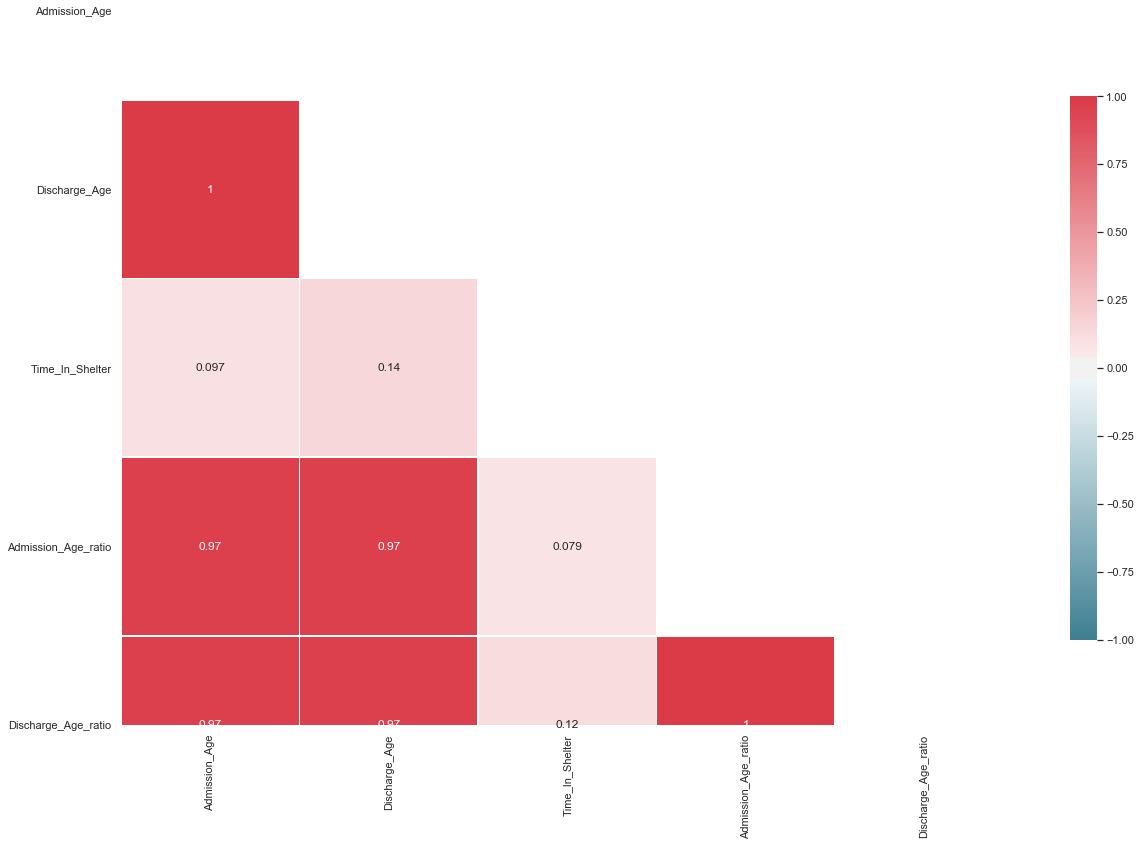

In [118]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = X_train[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

#### Interpretation of results
------

- Discharge age and admission age are closely correlated as would be expected (don't spend that long in a shelter). This strong correlation (1.0) indicates that the two columns show identical trends and therefore having both may be redundant and could possibly interfere with the model accuracy. 


- As would be expected there is a high correlation between the age_ratios (as difference between admission and discharge age is relatively low, ratio would make this difference even smaller) and between the age_ratio and the admission and discharge age (as they are calculated using these numbers).


- Therefore discharge age will not be included in the models. Otherwise there is no correlations seen. It is interesting that admission and discharge age have different correlations to the time spent in the shelter however it is difficult to compare when the numbers are of such a small magnitude.

## 1.4 - Continuous feature and target feature

- We have seen a correlation matrix for all continuous features with regards to each other. 


- Now to deduce if any of the continuous features should be included in the training set run on the models, their correlation to the target feature must be investigated. 


- Scatter plots provide both a visual and numerical output to clearly identify relationships between features.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

,binary_outcome
Admission_Age_ratio,0.043506
Admission_Age,0.043317
Discharge_Age_ratio,0.042190
Discharge_Age,0.042073
Time_In_Shelter,-0.021951


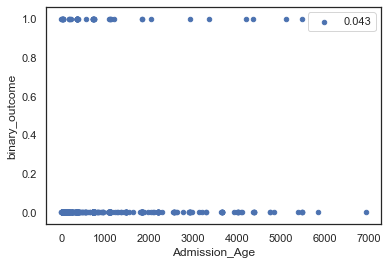

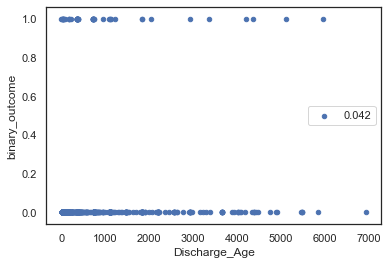

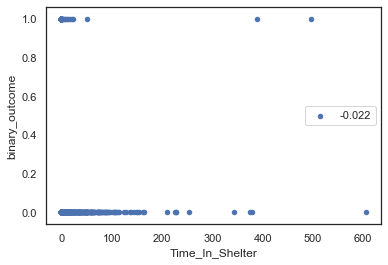

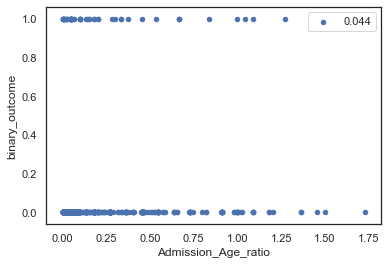

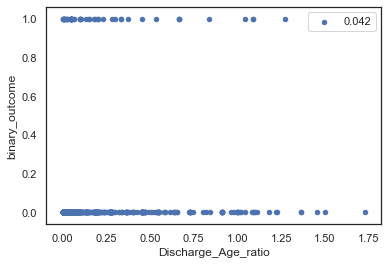

In [119]:
# dict to hold correlation values 
corr_dict = {}

# plot pairwise interaction between all continuous features and target
for column in X_train[continuous_columns]:
    # create temp df to merge column and target
    df_temp = pd.concat([X_train[column], y_train], axis=1)
    # store correlation in variable
    correlation = df_temp[[column, "binary_outcome"]].corr().values[0,1]
    # plot the column and tartget feature
    df_temp.plot(kind='scatter', x=column, y="binary_outcome", label="%.3f" % correlation)
    # add correlation to dict
    corr_dict[column] = correlation

# dataframe holding sorted correlation values to aid in interpreting results
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['binary_outcome']).sort_values('binary_outcome', ascending=False)
corr_df

#### Interpretation of results
------

- Both visually and numerically there is no significant relationship, negative or positive between any of the continuous features, and the target feature. 


- Due to the low numbers (Admission Age: 0.020, Discharge Age: 0.017 , Time in shelter: -0.074, Admission_Age_ratio	0.043506,Discharge_Age_ratio	0.042190) these features will not be included in the model training and therefore we will proceed with purely categorical features.

## 1.5 - Categorical Data and target features

- A huge proportion of the data in this dataset is of a categorical nature. As they are not continuous, it would not be appropriate to use scatter plots as seen above. 


- Therefore stacked bar charts will be used to visualize potential relationships between categorical data and the target feature.


- There are 18 categorical features in total: 
    - Admission 
    - Type 
    - Condition
    - AnimalType
    - Sex
    - Breed
    - Colour
    - Discharge
    - Admission_Spayed/Neutered 
    - Discharge_Spayed/Neutered
    - neuteredInShelter
    - Found_Area
    - AdmissionDay 
    - AdmissionMonth
    - AdmissionYear 
    - DischargeDay
    - DischargeMonth 
    - DischargeYear

##### Stacked bar plots for all categorical features


 Admission
Index 	 Count
afternoon 	 507
morning 	 71
night 	 104
late_night 	 10

 Type
Index 	 Count
Owner Surrender 	 118
Wildlife 	 28
Stray 	 493
Public Assist 	 47
Euthanasia Request 	 6

 Condition
Index 	 Count
Normal 	 605
Sick 	 28
Injured 	 28
Nursing 	 25
Other 	 2
Aged 	 4

 Animal_Type
Index 	 Count
Cat 	 277
Raccoon 	 4
Dog 	 377
Guinea Pig 	 2
Bat 	 24
Opossum 	 3
Bird 	 2
Rabbit Sh 	 2
Ferret 	 1

 Sex
Index 	 Count
Female 	 329
Unknown 	 64
Male 	 299

 Breed
Index 	 Count
Domestic shorthair 	 226
Other animal 	 38
PitBull/Boxer/Bulldog 	 88
Terrier 	 36
GermanShepard/Rotweiler/doberman 	 31
Hunting Dog 	 19
other dog 	 14
very small dogs 	 57
Domestic longhair 	 9
Husky 	 9
Large domestic 	 6
Domestic medium hair 	 25
Siamese 	 14
Medium domestic 	 26
lab/retriever 	 51
Sheep Dog 	 40
other cat 	 3

 Colour
Index 	 Count
light 	 137
brown 	 235
black 	 164
blue 	 58
tricolor 	 16
patterned 	 30
red 	 49
yellow 	 3

 Discharge
Index 	 Count
afternoon 	 363
night 	 24

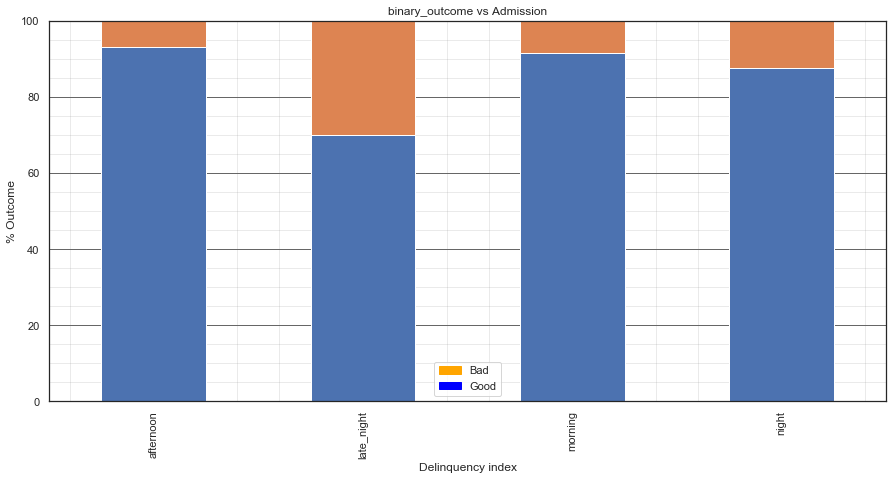

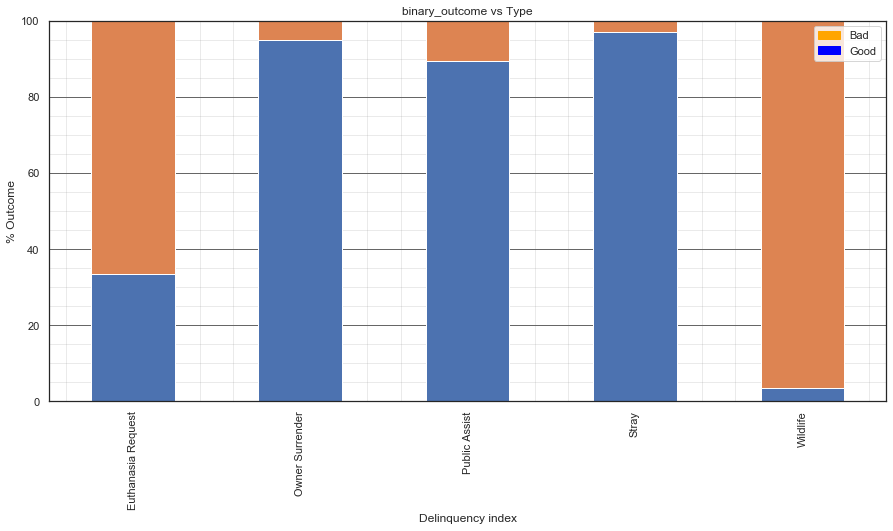

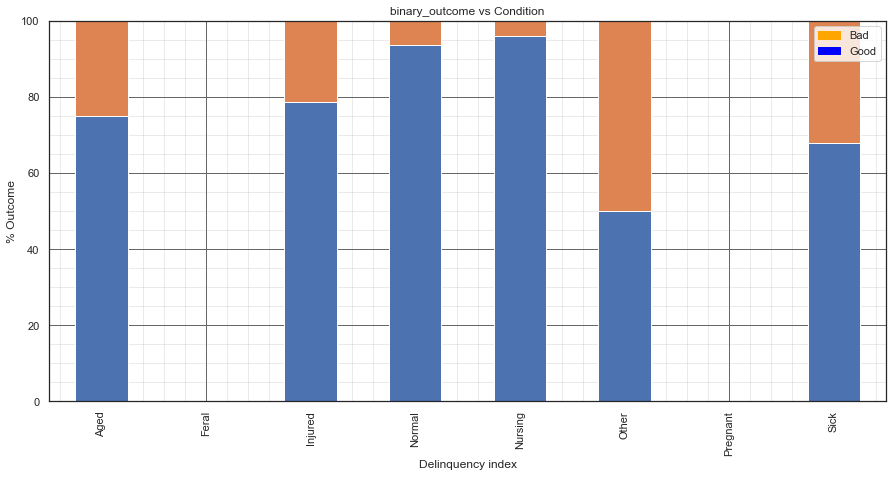

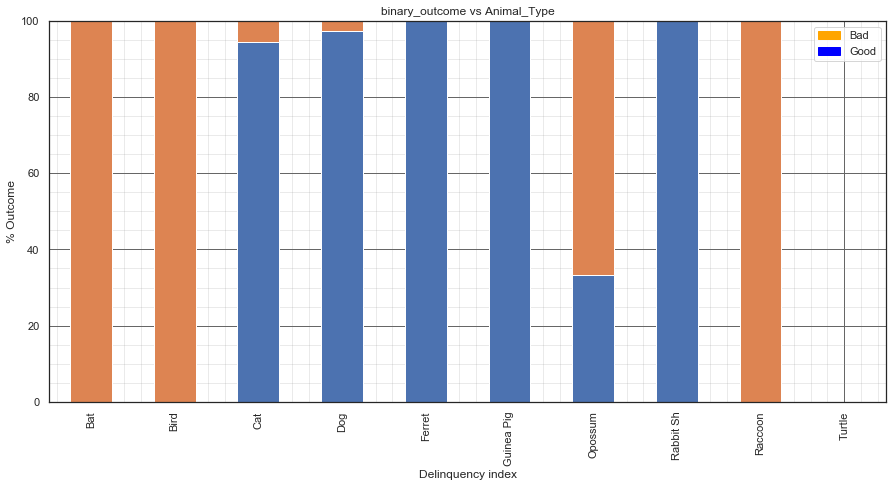

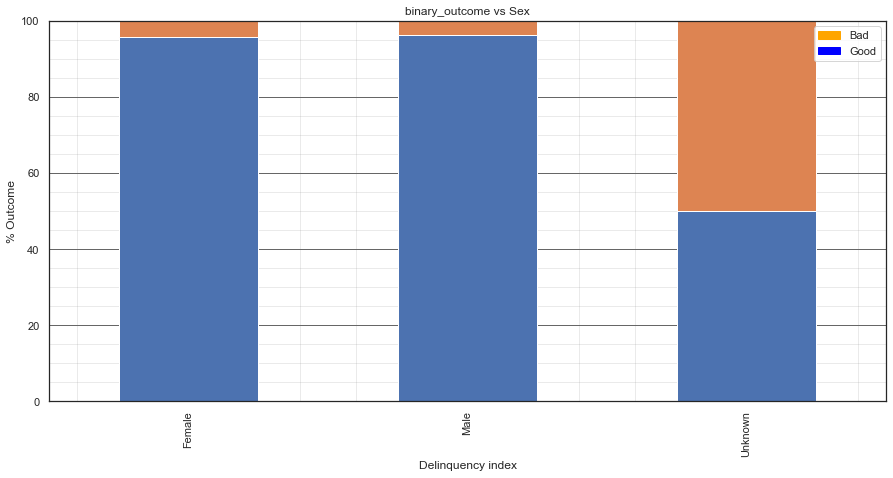

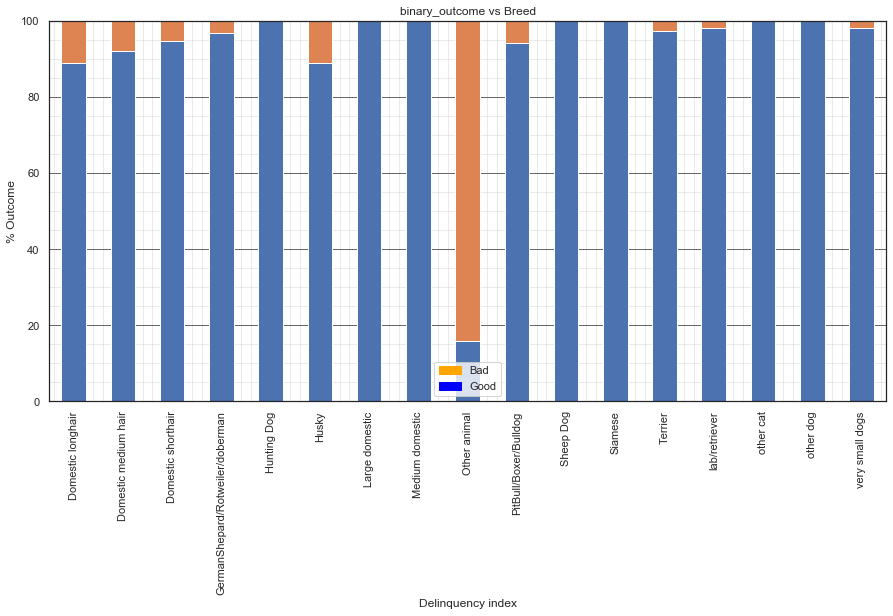

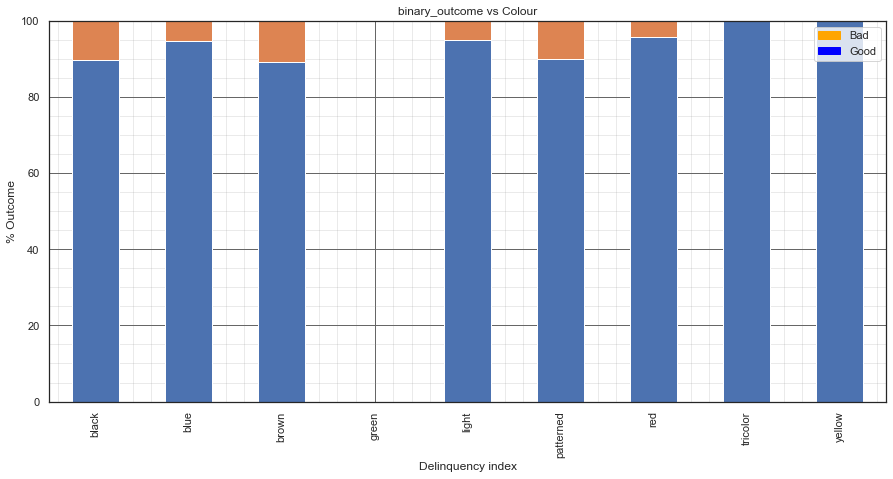

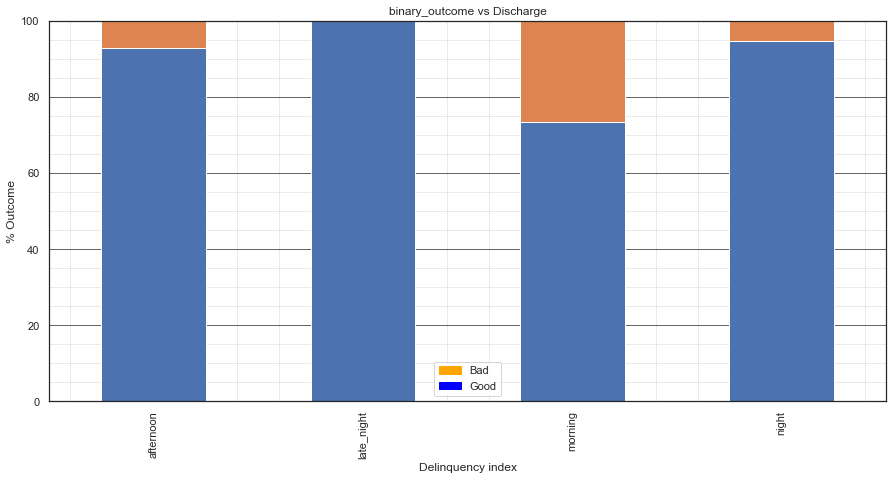

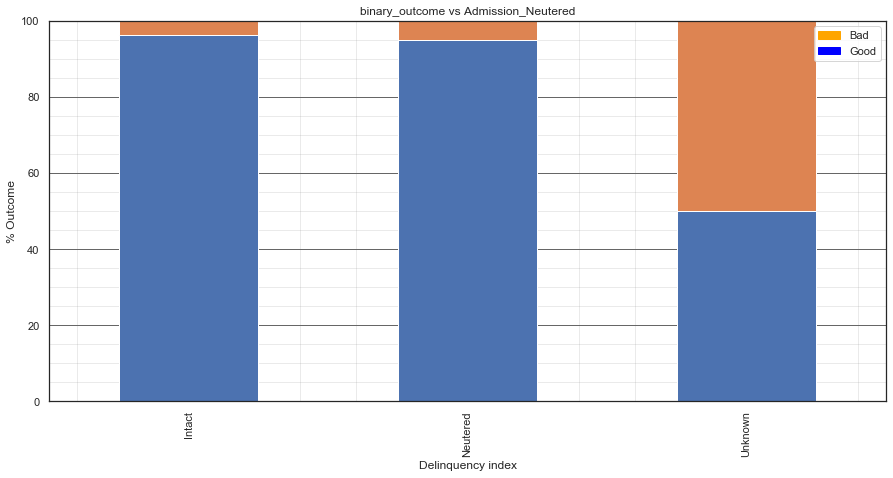

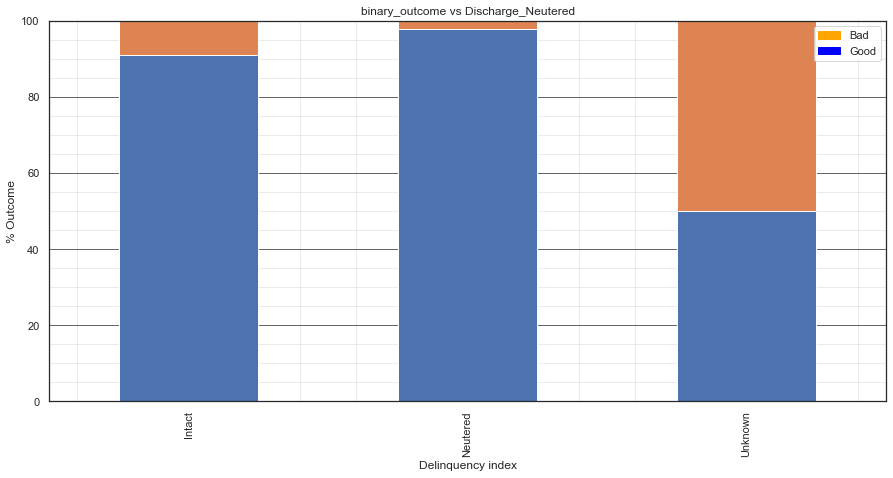

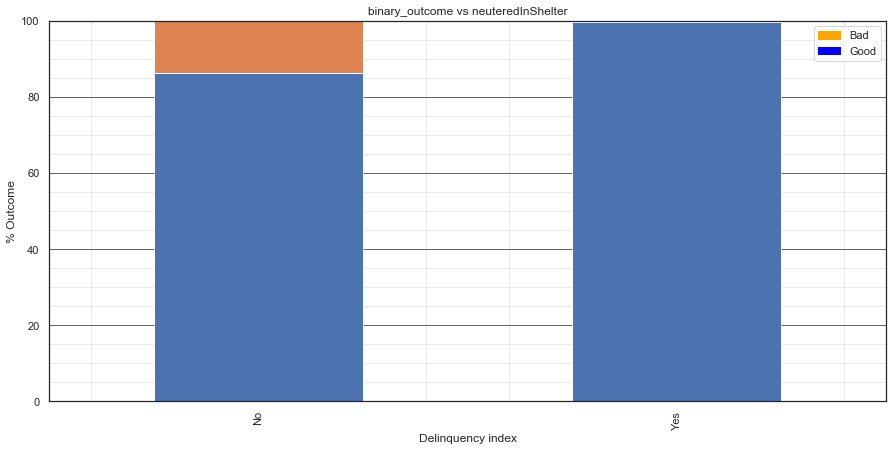

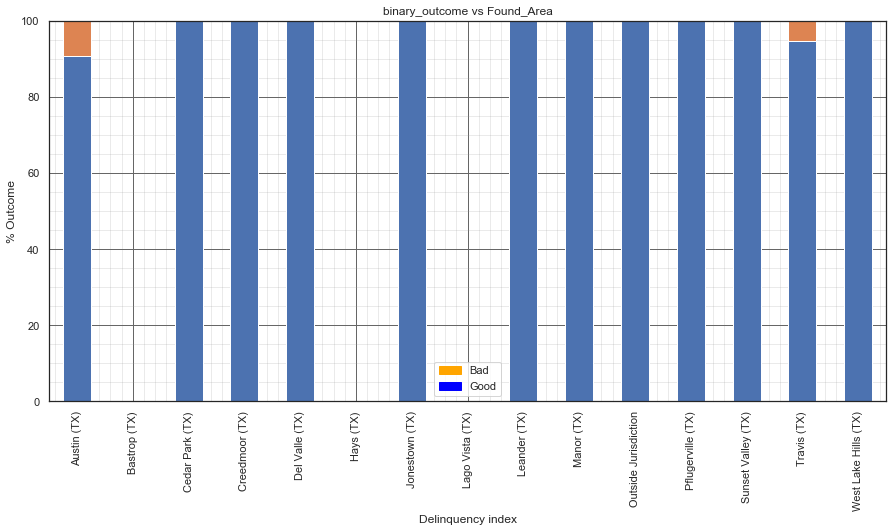

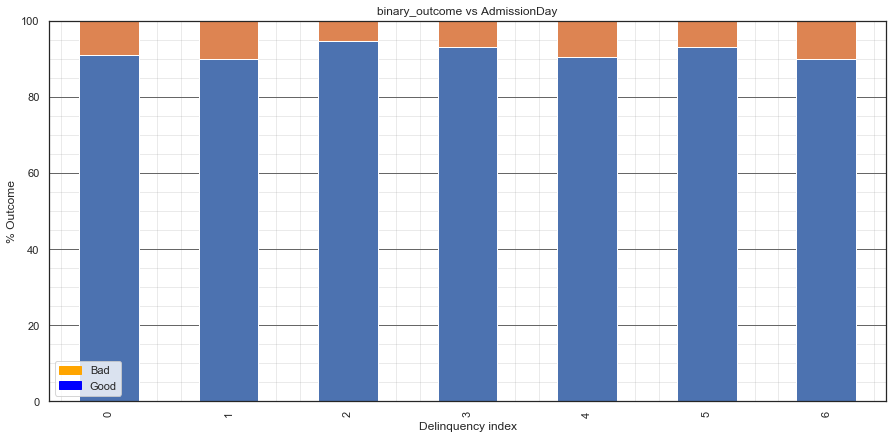

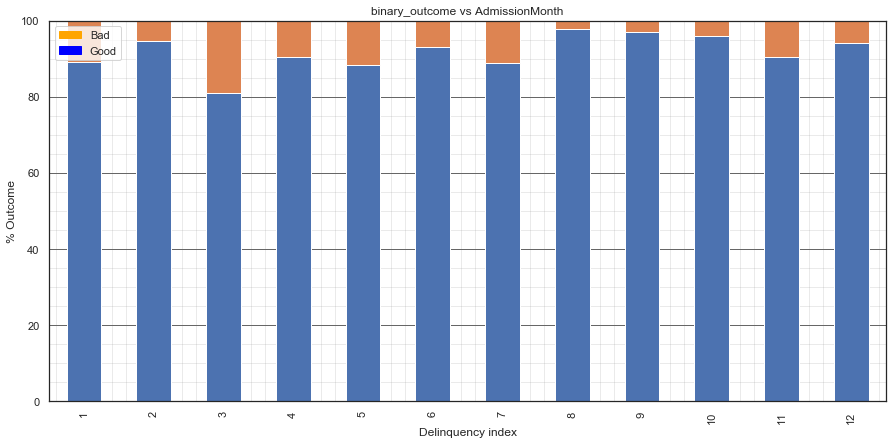

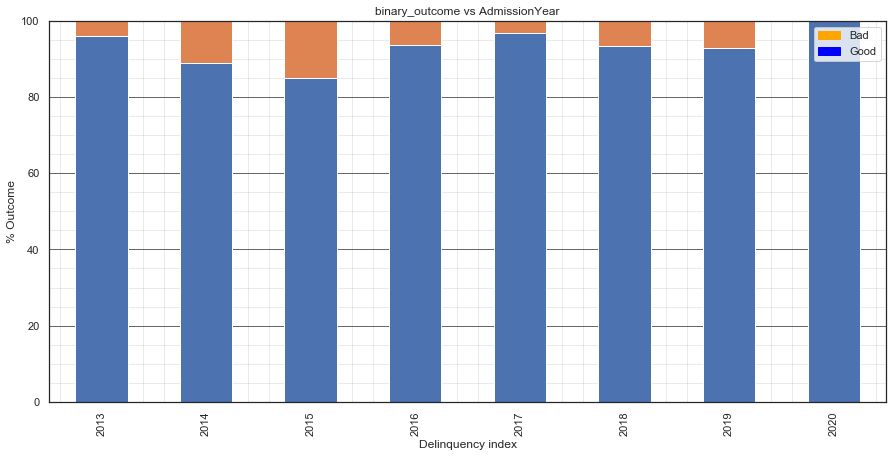

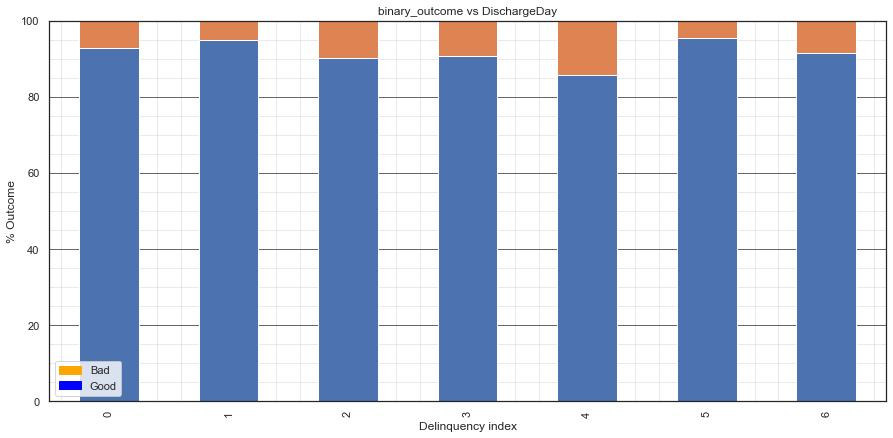

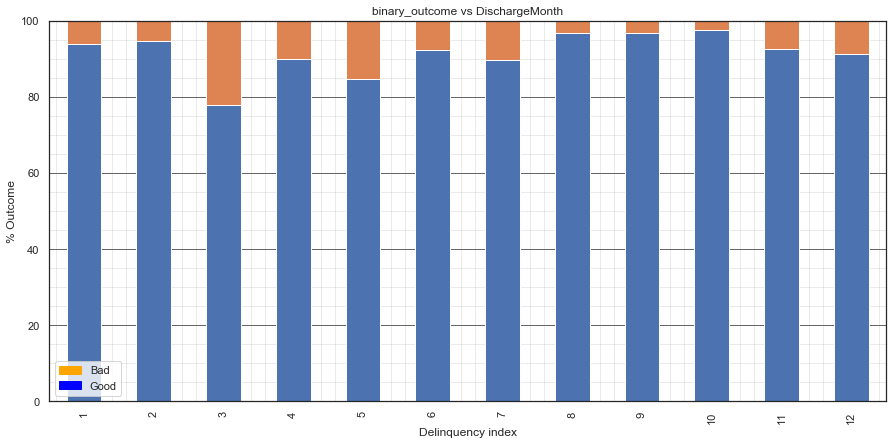

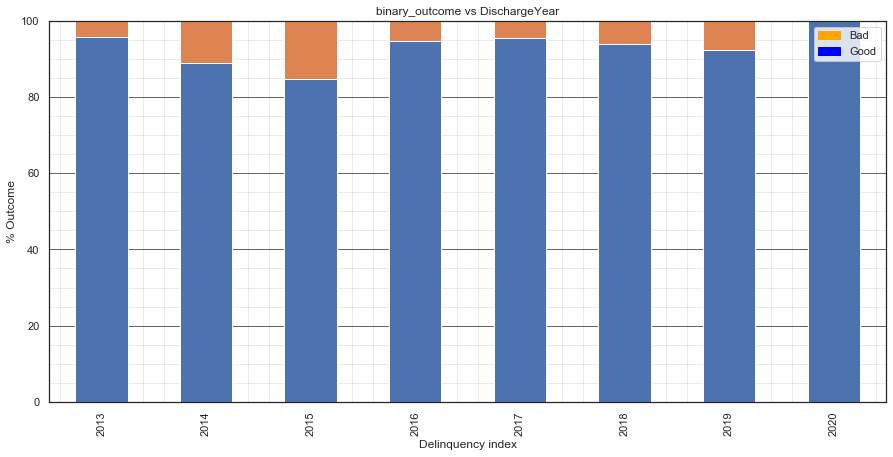

In [120]:
# for the comparison we will convert the target back to categorical
y_train = y_train.astype("category")
#X_train[categorical_columns].columns

# we will create temp dataframe for these plots, mergeing X_train and y_train
df_temp= pd.concat([X_train, y_train], axis=1)


# for each categorical feature create a stacked bar plot
for categorical_feature in categorical_columns:
    # Using code from the module lab
    
    sub_cat = pd.unique(df_temp[categorical_feature].ravel())

    # add new column and set values to zero
    df_temp['percent'] = 0

    #print header
    print("\n", categorical_feature)
    print("Index \t Count")

    # for each unique value in a categorical feature
    for i in sub_cat:

        count = df_temp[df_temp[categorical_feature] == i].count()['binary_outcome']
        count_percentage = (1 / count) * 100

        # print out index vs count
        print(i, "\t", count)

        index_list = df_temp[df_temp[categorical_feature] == i].index.tolist()
        for ind in index_list:
            df_temp.loc[ind, 'percent'] = count_percentage

    group = df_temp[['percent',categorical_feature,'binary_outcome']].groupby([categorical_feature,'binary_outcome']).sum()

    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f"binary_outcome vs {categorical_feature}", figsize=(15,7), grid=True)

    # add legend
    red_patch = mpatches.Patch(color='orange', label='Bad')
    blue_patch = mpatches.Patch(color='blue', label='Good')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # add gridlines
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    # add labels
    my_plot.set_xlabel("Delinquency index")
    my_plot.set_ylabel("% Outcome")
    my_plot.set_ylim([0,100])
    
# drop 'percent' that was used only for stacked bar plot
df_temp = df_temp.drop("percent", 1)

#### Reminder of scale meanings

| Admission   | Meaning  |
|-------------|----------|
| Morning     |   05:00-11:00     | 
| Afternoon   |    11:00-17:00      |
| Night       |    17:00-23:00     | 
| Late night  |    23:00-05:00      |

| Day         | Meaning  |
|-------------|----------|
| 0     |      Monday   | 
| 1   |     Tuesday    |
| 2       |      Wednesday   | 
| 3  |     Thursday    |
| 4  |     Friday    |
| 5  |     Saturday    |
| 6  |     Sunday    |

| Day         | Meaning  |
|-------------|----------|
| 1     |      January   | 
| 2   |     February    |
| 3       |      March   | 
| 4  |     April    |
| 5  |     May    |
| 6  |     June    |
| 7  |     July    |
| 8   |     August    |
| 9       |      September   | 
| 10  |     October    |
| 11 |     November    |
| 12  |     December    |




In [121]:
df.columns

Index(['Admission', 'Type', 'Condition', 'Animal_Type', 'Sex', 'Admission_Age',
       'Breed', 'Colour', 'Discharge', 'Discharge_Age', 'binary_outcome',
       'Found_Area', 'Time_In_Shelter', 'AdmissionDay', 'AdmissionMonth',
       'AdmissionYear', 'DischargeDay', 'DischargeMonth', 'DischargeYear',
       'Admission_Neutered', 'Discharge_Neutered', 'neuteredInShelter',
       'Admission_Age_ratio', 'Discharge_Age_ratio'],
      dtype='object')

### Interpretation of results
-----

For each result interpreted, underneath I include the values and their counts in order to maintain perspective on how proportional a particular category is, to minimize the chance of over stating certain features influence on outcome. Due to the high number of categorical features I will focus on those features that appear to be associated with the target feature.

#### (i) Admission

- Observing the plots there appears to be an increase in the proportion of bad (binary outcome = 1) outcomes in the case of admission at late night [11pm-5am] (approximately 30% bad outcomes). 


- However it is important to keep in mind that the value count for 'late night' was only 10, the value counts for the other options was: 'morning': 75, 'afternoon': 503, 'night': 107, therefore although 28% of outcomes resulting in a negative animal outcome when admitted late at night sounds significant, when the value count is taken into account this means there were 3/10 animals in this category that resulted in a poor outcome, suggesting this is not a strong predictor of outcome.

In [122]:
X_train["Admission"].value_counts()

afternoon     507
night         104
morning        71
late_night     10
Name: Admission, dtype: int64

#### (ii) Type
- Observing the plots there appears to be significant proportion of animals who were admitted as 'wildlife' (>95%) that experienced bad outcomes, as well as those admitted as euthanasia request (~37%)


- Stray and owner surrender are the largest groups in terms of numbers of animals, yet there appears to be a low percentage of poor outcomes associated with both categories


- Animals admitted as a 'euthanasia request' would be expected to experience poorer outcomes


- Although the number of animals under the label 'wildlife' is only 26 due to the high percentage of poor outcomes, this appears to be a good candidate for predicting poor outcomes.

In [123]:
X_train["Type"].value_counts()

Stray                 493
Owner Surrender       118
Public Assist          47
Wildlife               28
Euthanasia Request      6
Name: Type, dtype: int64

#### (iii) Condition

- Observing the plots animals with the condition of 'sick' (approx. 40%), 'injured' (approx. 20%) or 'aged' appear to have correlations to poor animal outcomes.


- Given the relative low counts of each feature (especially aged) it is difficult to deduce with any confidence that condition is a good predictor of animal outcome.


- This was surprising as condition would be a logical predictor of animal outcome.


- The majority of animals were normal, indicating that these were probably routine visits.


- Overall condition could be a potential coefficient that is effective at predicting animal outcome, however due to the low sample size of animals in a condition other than normal it is inappropriate to say this with any real confidence. 

In [124]:
X_train["Condition"].value_counts()

Normal      605
Sick         28
Injured      28
Nursing      25
Aged          4
Other         2
Pregnant      0
Feral         0
Name: Condition, dtype: int64

#### (iv) Animal_Type

- Observing the plots, the main types of animals that visit the shelter, cats and dogs, show a majority experience positive outcomes.


- In this dataset, every bat experiences poor outcomes (100%). This is the same with birds, however bats have a much higher value count in this data set.


- An explanation could be that cats and dogs are more likely to visit the vet routinely or for minor issues, while bats may only visit the vet in more serious cases.


- Animal_Type is an interesting feature which appears to hold some value in predicting animal outcome, albeit specifically bats.

In [125]:
X_train["Animal_Type"].value_counts()

Dog           377
Cat           277
Bat            24
Raccoon         4
Opossum         3
Rabbit Sh       2
Guinea Pig      2
Bird            2
Ferret          1
Turtle          0
Name: Animal_Type, dtype: int64

#### (V) Breed
- Given the current data set there were a few breeds which showed an increase in poor outcomes, which were husky (count: 8), domestic longhair (count: 9) and domestic medium hair(count: 21). However none exceeded 15%, and given the low value counts this would translate to appproximately 1-3 animals) in each category, which would seem to small to make any inferences.


- The category of "other animal" shows an outcome percentage of approximately 85% (count: 35). This makes sense as it follows along the earlier trends of animals that are not cats and dogs, although more rare, having a much more frequent poor outcome.

In [126]:
X_train["Breed"].value_counts()

Domestic shorthair                  226
PitBull/Boxer/Bulldog                88
very small dogs                      57
lab/retriever                        51
Sheep Dog                            40
Other animal                         38
Terrier                              36
GermanShepard/Rotweiler/doberman     31
Medium domestic                      26
Domestic medium hair                 25
Hunting Dog                          19
Siamese                              14
other dog                            14
Husky                                 9
Domestic longhair                     9
Large domestic                        6
other cat                             3
Name: Breed, dtype: int64

#### (vi) Colour
- From observing the above plots, there appears to be slight increases in the incidence of poor outcomes among animals that have a brown (approx. 10%),black (approx. 11%) or patterned (approx 11%) colour. 


- As white has a poor outcome of approximately 5%, it may suggest that although the numbers are low, darker, or patterned colours are associated with poorer outcomes, in particular when compared with lighter coloured animals.


- Although patterned has a low value count (26), black has similar numbers to white, while brown has a much larger cohort.

In [127]:
X_train["Colour"].value_counts()

brown        235
black        164
light        137
blue          58
red           49
patterned     30
tricolor      16
yellow         3
green          0
Name: Colour, dtype: int64

#### (vii) Discharge
- From the plots above, the percentage of poor outcomes for discharge in the morning (apprix 27%) appears to be quite a bit higher than afternoon (8%) and night (approx. 5%). Late night has virtually no bad outcomes, however this could also be explained by the fact that it is less likley an animal will be discharged that late.


- Although the value count for morning is much lower than the others, its hard to ignore the higher percentage of poor outcomes.


- However discharge time does not appear to have direct predictive value, as it is likely something that cannot be altered. The only interpretation where it may be useful that I can think of is that maybe keeping an animal in for the day as opposed to discharging them in the morning might result in improved outcomes.

In [128]:
X_train["Discharge"].value_counts()

afternoon     363
night         241
morning        68
late_night     20
Name: Discharge, dtype: int64

#### (viii) Neutered
- Interestingly this plot would suggest that animals which have their genetalia remaining intact upon discharge appear to have a higher percentage of poor outcomes (10%).


- The amount of animals in this dataset that were spayed or neutered was 289 (477 intact upon admission - 188 intact on discharge). Although unknown still has the largest proportion of poor outcomes, due to the size of the intact value_count (188), intact animals upon discharge may provide a relevant predictor of animal outcome.


- The additionally small number of poor outcomes associated with neutered (<1%) or spayed (<3%), despite large value counts, would suggest that having said procedures may have a positive impact on animal outcome.


- The additional feature 'neuteredInShelter' appears to support this thesis, as the percentage of poor outcomes when neutered in the shelter cannot be extrapolated (too small). Although the no category in this feature encompasses the large cohort of 'unkown' neutered status animals, the yes category supports the hypothesis that animals neutered in the shelter have a better outcome than those that don't.

In [129]:
X_train["Admission_Neutered"].value_counts()

Intact      466
Neutered    162
Unknown      64
Name: Admission_Neutered, dtype: int64

In [130]:
X_train["Discharge_Neutered"].value_counts()

Neutered    447
Intact      181
Unknown      64
Name: Discharge_Neutered, dtype: int64

In [131]:
X_train["neuteredInShelter"].value_counts()

No     407
Yes    285
Name: neuteredInShelter, dtype: int64

In [132]:
X_train.columns

Index(['Admission', 'Type', 'Condition', 'Animal_Type', 'Sex', 'Admission_Age',
       'Breed', 'Colour', 'Discharge', 'Discharge_Age', 'Found_Area',
       'Time_In_Shelter', 'AdmissionDay', 'AdmissionMonth', 'AdmissionYear',
       'DischargeDay', 'DischargeMonth', 'DischargeYear', 'Admission_Neutered',
       'Discharge_Neutered', 'neuteredInShelter', 'Admission_Age_ratio',
       'Discharge_Age_ratio'],
      dtype='object')

Using the entire dataset, the outcomes associated with animals being neutered or not neutered in the shelter were investigated.

In [133]:
df["neuteredInShelter"].value_counts()

No     585
Yes    404
Name: neuteredInShelter, dtype: int64

I wanted to get a better idea of the exact proportion of good and bad outcome of animals neutered in the shelter, compared to those not neutered in the shelter.

In [134]:
# Neutered in shelter with bad outcome
neutered_bad = 0
# Neutered in shelter with good outcome
neutered_good= 0
# Not neutered in shelter with bad outcome
notNeutered_bad = 0
# Not neutered in shelter with good outcome
notNeutered_good= 0
for ind in df.index:
    if df["neuteredInShelter"][ind] == "Yes" and df["binary_outcome"][ind] == 1.0:
        neutered_bad+=1
    elif df["neuteredInShelter"][ind] == "Yes" and df["binary_outcome"][ind] == 0.0:
        neutered_good+=1
    elif df["neuteredInShelter"][ind] == "No" and df["binary_outcome"][ind] == 1.0:
        notNeutered_bad+=1
    elif df["neuteredInShelter"][ind] == "No" and df["binary_outcome"][ind] == 0.0:
        notNeutered_good+=1


In [135]:
print("------Neutered in shelter------- \n")
print("good outcome: ", neutered_good, "\n")
print("poor outcome: ", neutered_bad, "\n")
print("------Not neutered in shelter----- \n")
print("good outcome: ", notNeutered_good, "\n")
print("poor outcome: ", notNeutered_bad, "\n")

print("neutered in shelter bad outcome ratio: ",(neutered_bad/neutered_good)*100)
print("not neutered in shelter bad outcome ratio: ",(notNeutered_bad/notNeutered_good)*100)

------Neutered in shelter------- 

good outcome:  402 

poor outcome:  2 

------Not neutered in shelter----- 

good outcome:  505 

poor outcome:  80 

neutered in shelter bad outcome ratio:  0.4975124378109453
not neutered in shelter bad outcome ratio:  15.841584158415841


These numbers support the earlier statement that animals neutered in the shelter are more likely to experience a good outcome compared to those not neutered in the shelter (this would include animals already neutered just not in the shelter).

#### (ix)Admission/Discharge Month
- Both features showed similar trends, which similar to year makes sense as animals would often be discharged during the same month


- This was a difficult feature to properly interpret. There does not appear to be a huge difference across the months, however there are 4 months, 3 (March), 5(May), 7(July) and 11 (November) which have a small increase in the percentage of poor outcomes.


- When value counts are taken into account the number of animals with poor outcomes are approximately double the number of the other months, however it is an increase from approximately 4 animals with poor outcomes, to approximately 8.


- There is no obvious trend or reason why these months would show a variance in outcome, but it is interesting to see if they could influence animal outcome.


- Admission month is the feature I will include in the model as opposed to discharge month, as it follows the same trend which could cause issues, yet admission month would appear to be more actionable in terms of predictive power.

In [136]:
X_train["AdmissionMonth"].value_counts()

5     77
10    72
7     72
6     71
9     68
11    52
4     52
12    51
3     47
8     46
1     46
2     38
Name: AdmissionMonth, dtype: int64

#### (ix)Admission/Discharge Year
- Both of these features appear to follow the same trend, this makes sense as animals would commonly be discharged during the same year they were admitted.


- Similar to admission month, the differences visually were not huge, however when you take value count into account, 2015 appears to have twice as many animals with poor outcomes (approx. 15% versus approx 7%) compared to the other years in this dataset.


- It is important to note that as 2013/20 are not complete years in terms of data gathering their outcome should not be heavily weighted.


- 2014 appears to have a slight increase in numbers as well, given that both these years are well represented in terms of value counts, it could indicate these years had overall worse outcomes.


- That said in terms of the ability to predict animal outcomes going forward, this does not provide much value other than for the vetinary clinic to decipher if there were any significant changes, or altering of protocols during these years. As overall the trend has improved since 2015 suggesting any issues that there might have been, have been addressed.

In [137]:
X_train["AdmissionYear"].value_counts()

2015    127
2019    114
2016    111
2014    110
2018    107
2017     93
2013     26
2020      4
Name: AdmissionYear, dtype: int64

### Uninformative features

1. Sex: Male and female animals show almost identical outcome percentages which are both quite low. The majority of animals which show poor outcomes have an 'unknown' sex. This would suggest that the animals sex was not determined and entered. Therefore given a new animal arriving at the vetinary clinic, the fact that unknown gender is associated with poor outcomes would have no predictive indications.


2. Admission_Spayed/Neutered: Similar to the sex issue above, almost all categories had the same or similar outcome ratios/percentages, however the majority of poor outcomes were among those for which the attribute is unknown. Similarly this is not actionable information, but more a side note, an indication that animals without information pertaining to their genetalia are more likely to encounter poor outcomes.


3. Found_Area: Although there is some increase in poor outcome in Austin and Travis compared to other areas in the dataset, these two areas represent the top two areas in terms of numbers of animals, and the vast majority of animals in the dataset (635/715) and so it would make sense that these two areas would show the greatest level of animals with poor outcomes.


4. Admission_Day: Although there is a slight increase at 1 (i.e. tuesday), compared to the other days, it is at most a 5% difference, which corresponds to about 5 animals. Poor outcomes are quite evenly dispersed throughout the week and therefore admission_day does not appear to influence animal outcomes.

## Compare trends to entire dataset


 Admission
Index 	 Count
afternoon 	 734
morning 	 96
night 	 145
late_night 	 14

 Type
Index 	 Count
Stray 	 700
Public Assist 	 60
Wildlife 	 38
Owner Surrender 	 185
Euthanasia Request 	 6

 Condition
Index 	 Count
Normal 	 864
Injured 	 38
Sick 	 45
Nursing 	 32
Aged 	 6
Feral 	 1
Pregnant 	 1
Other 	 2

 Animal_Type
Index 	 Count
Cat 	 396
Dog 	 539
Bat 	 30
Raccoon 	 6
Rabbit Sh 	 6
Opossum 	 4
Ferret 	 1
Guinea Pig 	 3
Bird 	 3
Turtle 	 1

 Sex
Index 	 Count
Unknown 	 86
Female 	 450
Male 	 453

 Breed
Index 	 Count
Domestic shorthair 	 325
Husky 	 9
PitBull/Boxer/Bulldog 	 109
Other animal 	 54
GermanShepard/Rotweiler/doberman 	 44
Siamese 	 20
Terrier 	 56
very small dogs 	 85
Sheep Dog 	 53
Domestic medium hair 	 33
lab/retriever 	 86
Hunting Dog 	 32
Medium domestic 	 40
Domestic longhair 	 14
Large domestic 	 6
other dog 	 19
other cat 	 4

 Colour
Index 	 Count
brown 	 336
light 	 176
black 	 246
blue 	 74
patterned 	 43
red 	 79
tricolor 	 27
yellow 	 7
green 	 1

 Disc

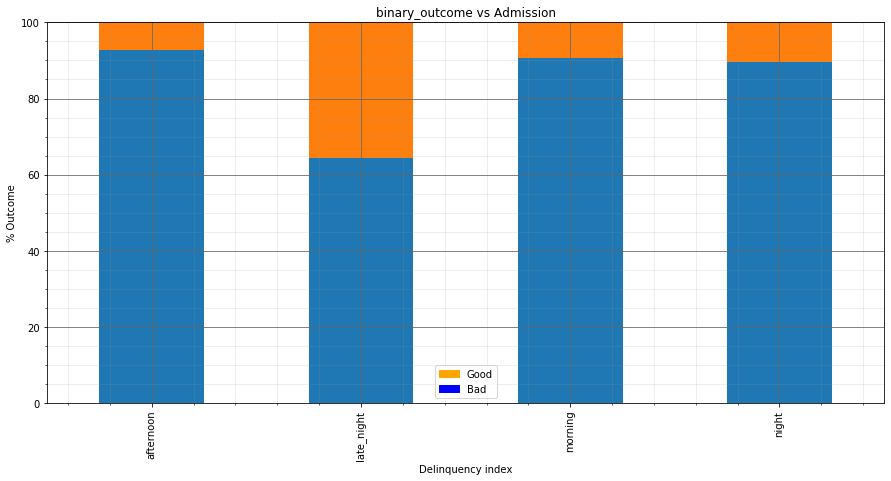

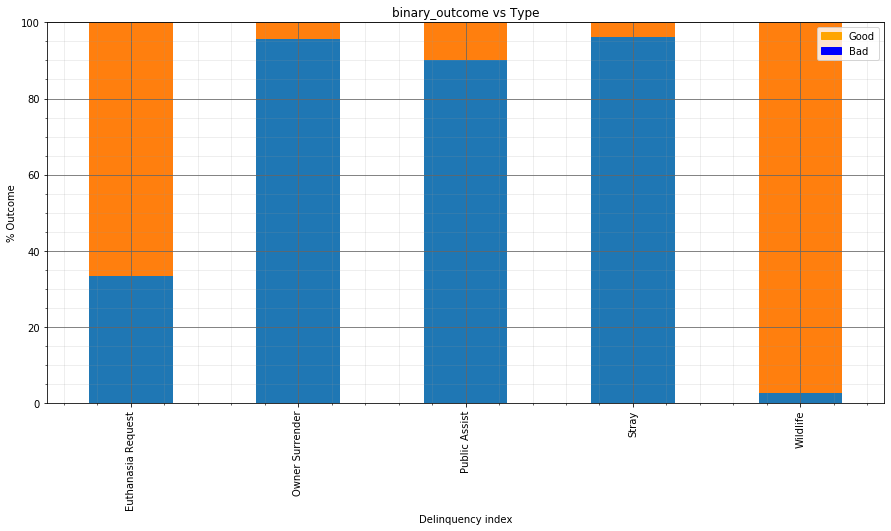

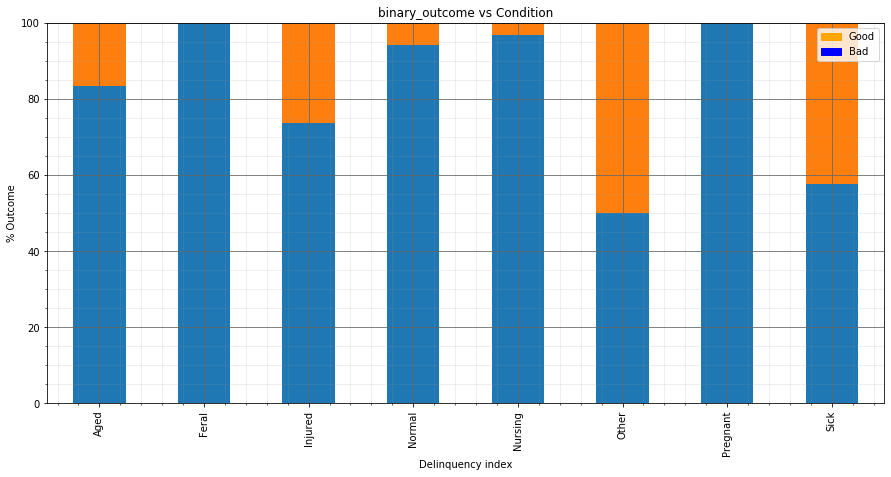

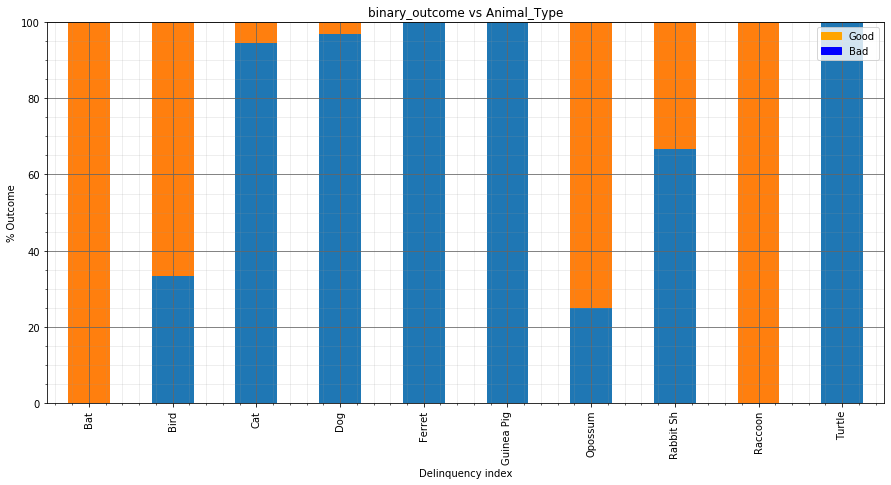

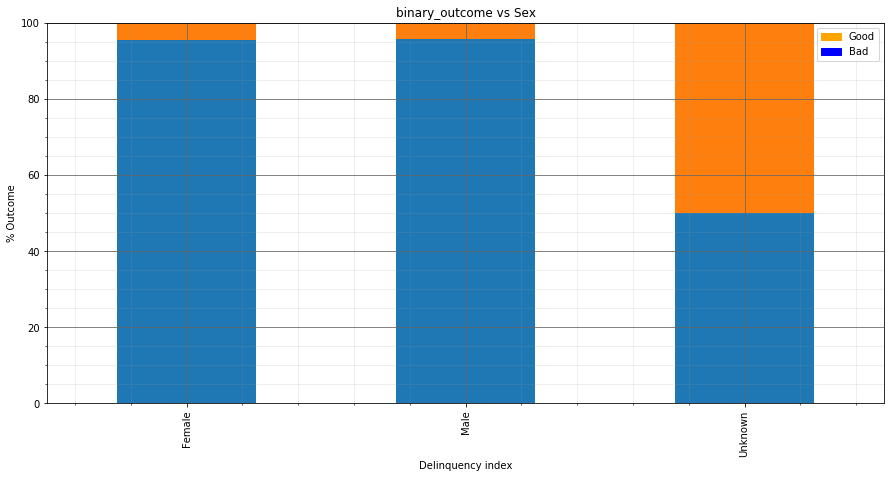

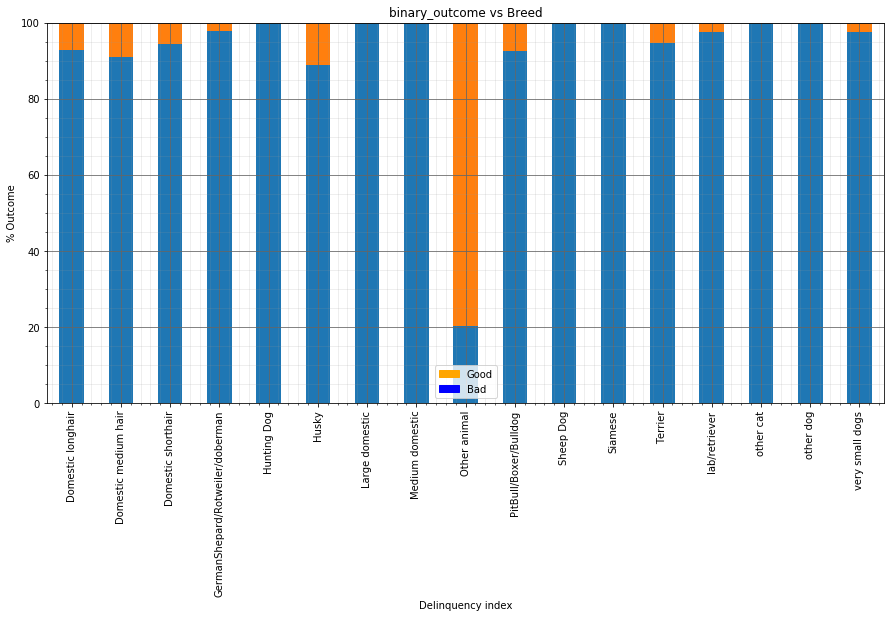

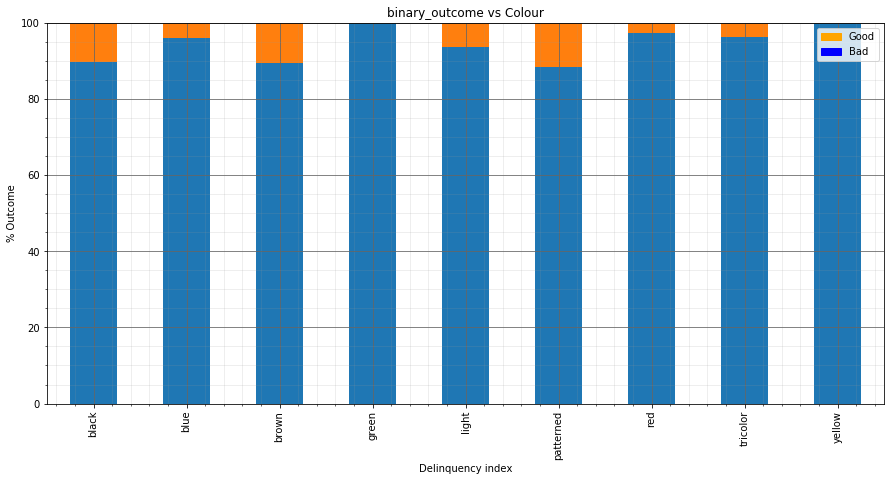

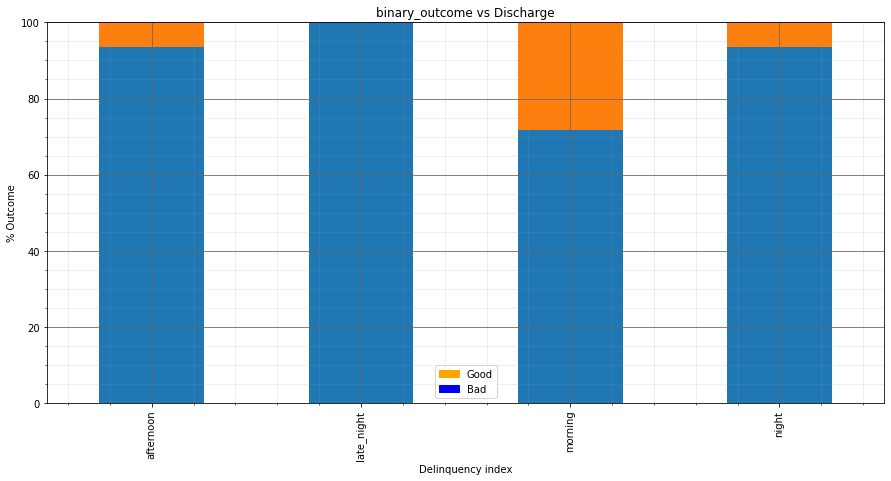

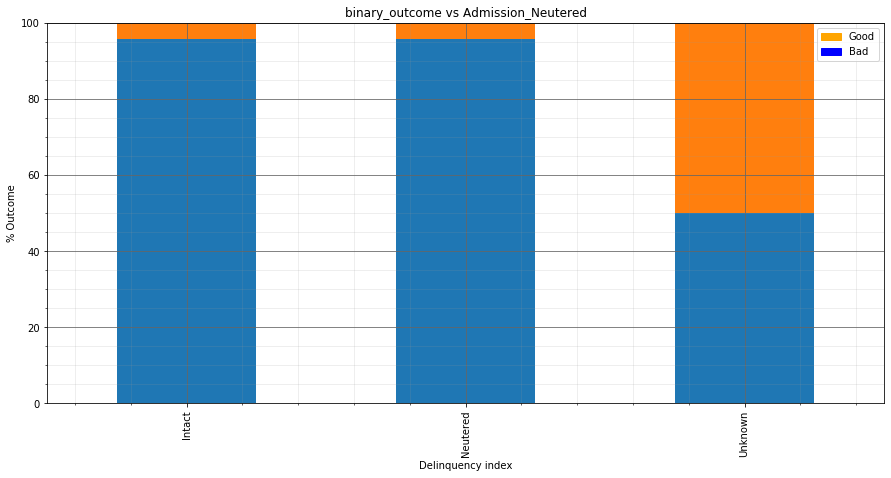

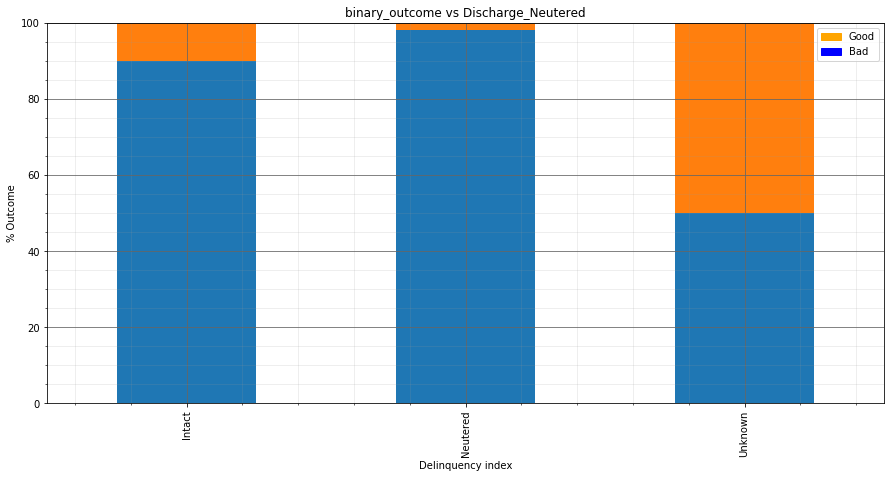

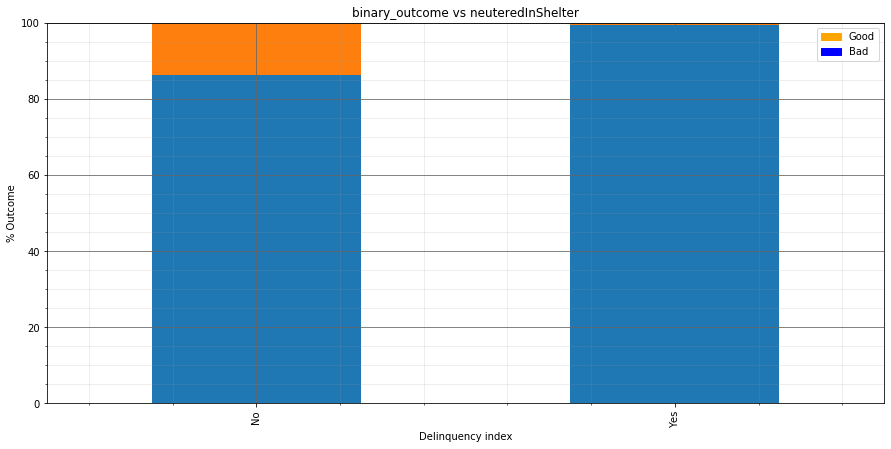

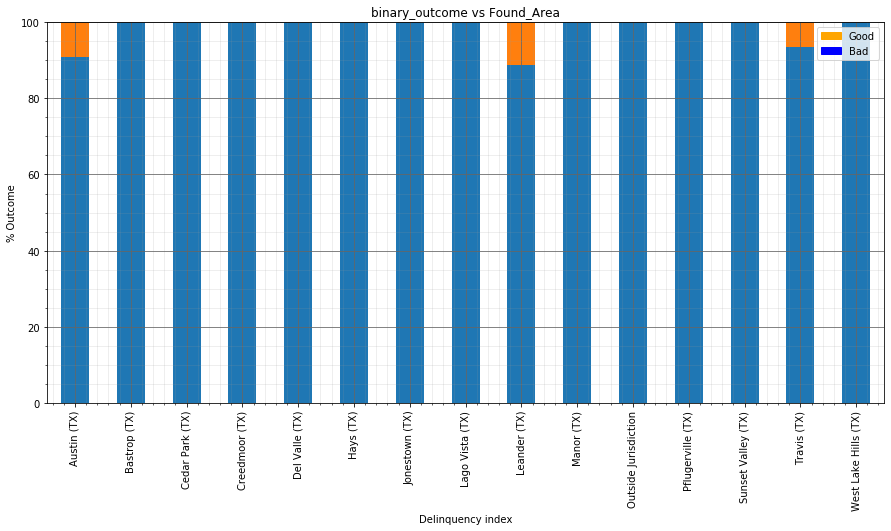

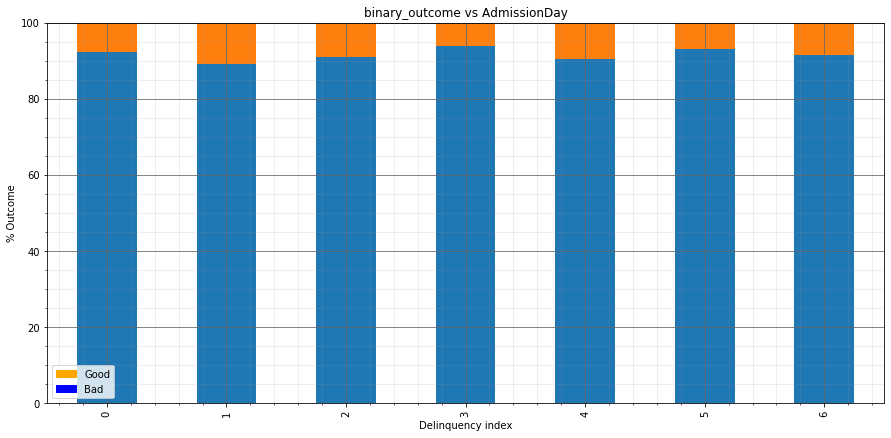

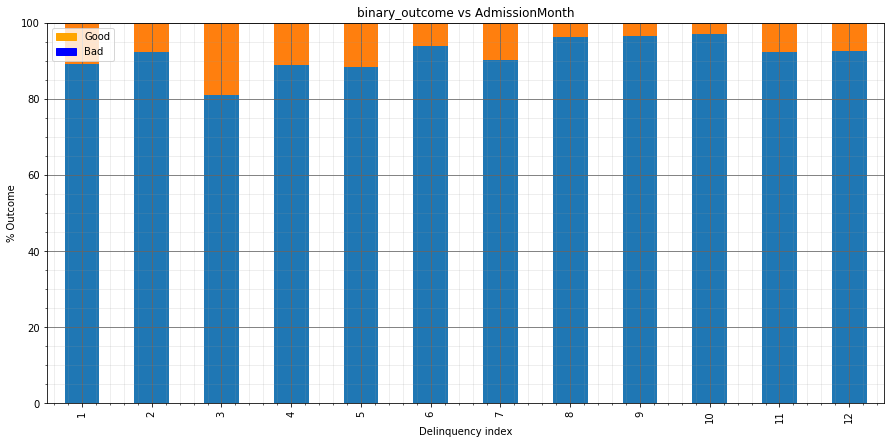

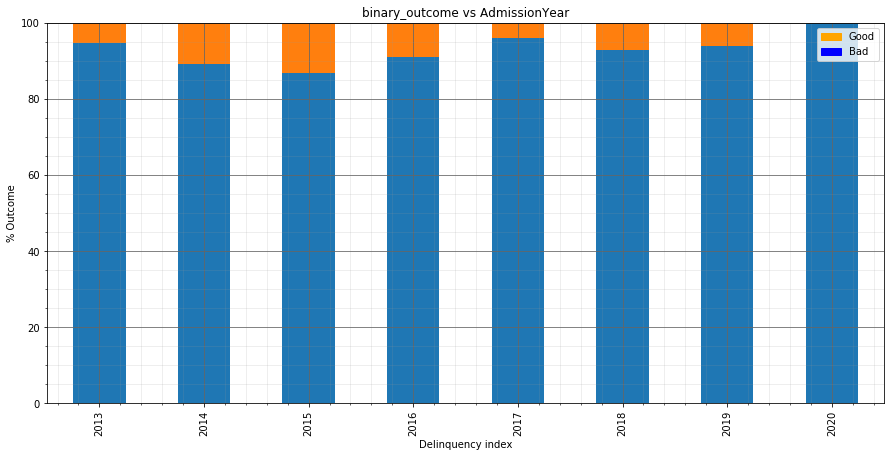

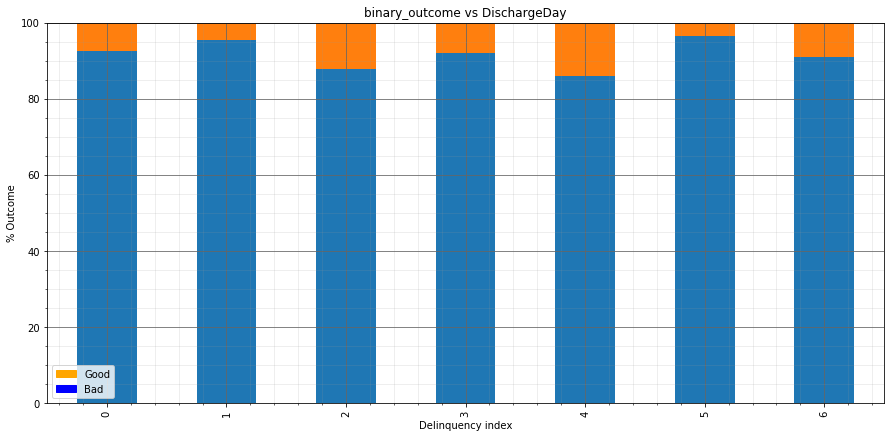

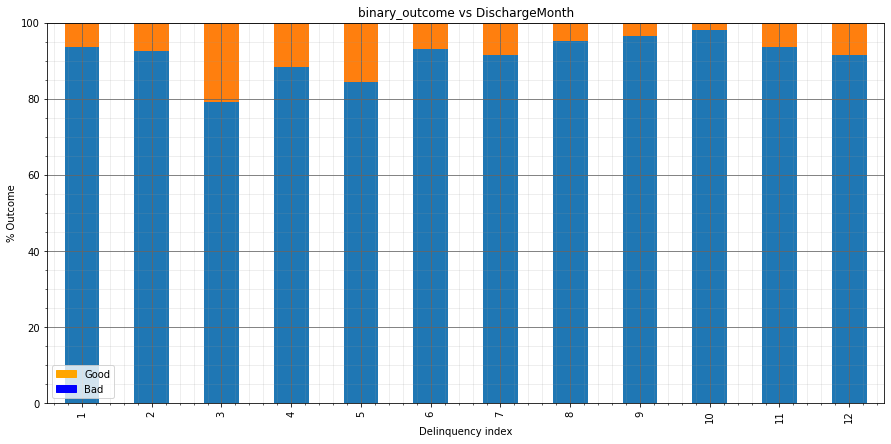

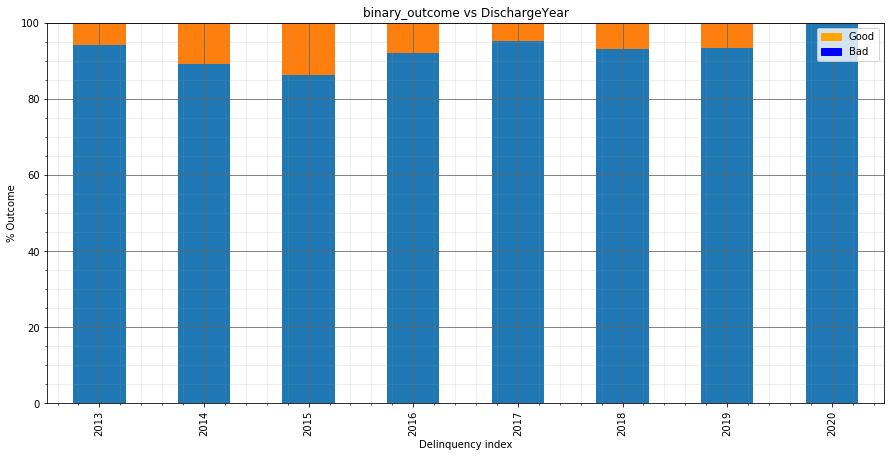

In [86]:
# for the comparison we will convert the target back to categorical
y = y.astype("category")
#X_train[categorical_columns].columns

# we will create temp dataframe for these plots, mergeing X_train and y_train
df_temp= pd.concat([X, y], axis=1)


# for each categorical feature create a stacked bar plot
for categorical_feature in categorical_columns:
    # Using code from the module lab
    
    maxDelqEver = pd.unique(df_temp[categorical_feature].ravel())

    # add new column and set values to zero
    df_temp['percent'] = 0

    #print header
    print("\n", categorical_feature)
    print("Index \t Count")

    # for each delinquency category
    for i in maxDelqEver:

        count = df_temp[df_temp[categorical_feature] == i].count()['binary_outcome']
        count_percentage = (1 / count) * 100

        # print out index vs count
        print(i, "\t", count)

        index_list = df_temp[df_temp[categorical_feature] == i].index.tolist()
        for ind in index_list:
            df_temp.loc[ind, 'percent'] = count_percentage

    group = df_temp[['percent',categorical_feature,'binary_outcome']].groupby([categorical_feature,'binary_outcome']).sum()

    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f"binary_outcome vs {categorical_feature}", figsize=(15,7), grid=True)

    # add legend
    red_patch = mpatches.Patch(color='orange', label='Good')
    blue_patch = mpatches.Patch(color='blue', label='Bad')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # add gridlines
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    # add labels
    my_plot.set_xlabel("Delinquency index")
    my_plot.set_ylabel("% Outcome")
    my_plot.set_ylim([0,100])
    
# drop 'percent' that was used only for stacked bar plot
df_temp = df_temp.drop("percent", 1)

- Overall the training set appears to be quite representative of the dataset as a whole, this was to be expected as it makes up 70% of it.


- It is more evidence that the stratified sampling worked, and if there are features which are able to effectively predict animal outcome, that they are sufficiently present in the training dataset (i.e. reflective of entire dataset).

## Choosing feature sub-group for model training

- From the analysis of each feature with the target feature (binary outcome) I have deduced the list below as an appropriate sub-group of features to train the model with


- Upon further analysis the feature "DOB" was dropped for two reasons
    1. With dummy encoding it adds a huge amount of columns, and also would add to the risk of overfitting in a random forest model as the DOB will be very specific to certain animals.
    2. The information it holds, if there were any relationship with the target feature, should be covered in the 'Age' features. 

In [138]:
df= df.drop(["DOB"],1)

KeyError: "['DOB'] not found in axis"

In [141]:
low_value_features=['Sex',
 'Admission_Age',
 'Breed',
 'Discharge_Age',
 'Found_Area',
 'Time_In_Shelter',
 'AdmissionDay',
 'AdmissionYear',
 'DischargeDay',
 'DischargeMonth',
 'DischargeYear',
 'Admission_Neutered',
 "AdmissionMonth",
 "neuteredInShelter",
 "Admission_Age_ratio",
 "Discharge_Age_ratio"]

In [142]:
# Make copy of original data frame with only the model_features included
df_model = df.copy()
df_model.drop(low_value_features, 1, inplace=True)

In [143]:
df_model.dtypes

Admission             category
Type                  category
Condition             category
Animal_Type           category
Colour                category
Discharge             category
binary_outcome           int64
Discharge_Neutered    category
dtype: object

In [91]:
df_model

,Admission,Type,Condition,Animal_Type,Colour,Discharge,binary_outcome,Discharge_Neutered
0,afternoon,Stray,Normal,Cat,brown,night,0,Unknown
1,afternoon,Stray,Normal,Cat,light,afternoon,0,Intact
2,morning,Stray,Normal,Cat,brown,afternoon,0,Neutered
3,afternoon,Stray,Normal,Dog,light,night,0,Neutered
4,afternoon,Stray,Normal,Cat,black,night,0,Neutered
...,...,...,...,...,...,...,...,...
987,afternoon,Owner Surrender,Normal,Cat,brown,afternoon,0,Neutered
988,afternoon,Public Assist,Normal,Dog,brown,night,0,Neutered
989,afternoon,Owner Surrender,Normal,Cat,patterned,night,0,Neutered
990,afternoon,Owner Surrender,Normal,Cat,brown,afternoon,0,Neutered


- There were no continuous features included, as observed during the scatterplot analysis, they showed no relationship, positive or negative to the target feature.


- Breed was left out. This was because the primary category that breed showed to have poor outcomes, was 'other animals'. This information I felt was sufficiently covered by the features 'Type' and 'Animal_Type'.


### Preparing data for model

### Dummy encoding

- As all of the model features are categorical datatypes, they need to be converted into a numerical format so that linear regression, logistic regression and random forest models can use the data to train models.
- One method of doing this is to do dummy/one hot encoding. 

In [92]:
# Identift cardinalities of columns to find out new columns needed
card_sum =0
cardinalities = {}
for col in df_model.columns:
    print("Column: ",col)
    print("-----------------------")
    print("Rows: ", df_model[col].shape[0])
    print("-----------------------")
    print("cardinality:  ", df_model[col].nunique())
    cardinalities[col] = df_model[col].nunique()
    card_sum += df_model[col].nunique()
    print("-----------------------")
    print("Value   ", "Frequency")
    print("-----------------------")
    print(df_model[col].value_counts(),"\n\n")

Column:  Admission
-----------------------
Rows:  989
-----------------------
cardinality:   4
-----------------------
Value    Frequency
-----------------------
afternoon     734
night         145
morning        96
late_night     14
Name: Admission, dtype: int64 


Column:  Type
-----------------------
Rows:  989
-----------------------
cardinality:   5
-----------------------
Value    Frequency
-----------------------
Stray                 700
Owner Surrender       185
Public Assist          60
Wildlife               38
Euthanasia Request      6
Name: Type, dtype: int64 


Column:  Condition
-----------------------
Rows:  989
-----------------------
cardinality:   8
-----------------------
Value    Frequency
-----------------------
Normal      864
Sick         45
Injured      38
Nursing      32
Aged          6
Other         2
Pregnant      1
Feral         1
Name: Condition, dtype: int64 


Column:  Animal_Type
-----------------------
Rows:  989
-----------------------
cardinality:   

In [93]:
cardinalities

{'Admission': 4,
 'Type': 5,
 'Condition': 8,
 'Animal_Type': 10,
 'Colour': 9,
 'Discharge': 4,
 'binary_outcome': 2,
 'Discharge_Neutered': 3}

To minimize multicolinearity between features it is necessary to drop the reference variable when dummy encoding. This is because the presence of that feature can be deduced from the values of the other categories in that feature.  The number of dummy variables is the total number of options for a given feature - 1 (for the reference variable).

- The dummy variable dropped is the reference variable, meaning the coefficients obtained for each of the dummy variables will be their relative effect on the target feature value (i.e. binary outcome), compared to the reference variable.

- For example if Type_wildlife is the reference variable, the coefficients for all other dummy variables beginning with 'Type_' will be their effect on the REGRESSION LINE??? compared to the effect the animal haivng 'Type' wildlife has.

In [94]:
# Dummy variables is total cardinality - number of features (i.e, -1 for each feature)
print("The total number of dummy variables: ", card_sum - len(cardinalities.keys()))

The total number of dummy variables:  37


- In simple or multiple linear regression, the size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect

- In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.


In [95]:
# set up dummies features, drop first to minimize multicolinearity
df_model = pd.get_dummies(df_model)
df_model.dtypes

binary_outcome                 int64
Admission_afternoon            uint8
Admission_late_night           uint8
Admission_morning              uint8
Admission_night                uint8
Type_Euthanasia Request        uint8
Type_Owner Surrender           uint8
Type_Public Assist             uint8
Type_Stray                     uint8
Type_Wildlife                  uint8
Condition_Aged                 uint8
Condition_Feral                uint8
Condition_Injured              uint8
Condition_Normal               uint8
Condition_Nursing              uint8
Condition_Other                uint8
Condition_Pregnant             uint8
Condition_Sick                 uint8
Animal_Type_Bat                uint8
Animal_Type_Bird               uint8
Animal_Type_Cat                uint8
Animal_Type_Dog                uint8
Animal_Type_Ferret             uint8
Animal_Type_Guinea Pig         uint8
Animal_Type_Opossum            uint8
Animal_Type_Rabbit Sh          uint8
Animal_Type_Raccoon            uint8
A

I selected reference variables which appear to be relatively normal or be associated with a better outcome. The rational was that this would help emphasize those variables which have a negative effect of outcome.

In [96]:
ref_dummies = ["Admission_afternoon", "Type_Stray", "Condition_Normal", "Animal_Type_Dog","Colour_yellow","Discharge_late_night","Discharge_Neutered_Neutered"]

In [97]:
df_model = df_model.drop(ref_dummies,1)

In [98]:
df_model.shape

(989, 37)

#### Setting up train/test split

- It is important when training the model with an existing dataset, that the dataset after preprocessing be split into a training and test set.


- The model will be trained on the training set, then to test how well it deals with novel values (i.e. rows not in the training set) it is run using the test dataset. This will represent a better idea of how well the model will be able to predict new data.


- This also helps identify if overfitting has occured (i.e. the model has just learnt off the data it is trained on). It will give us an idea of how flexible the model is. This will be further tested using cross validation with each model (see later).


- The percentage of positive and negative outcomes for the target feature (i.e. binary_outcomes), has been displayed to ensure that that both the training and test dataset are representative of the entire dataset and to each other.

- The target feature is stored in dataframe 'y'


- The independent variables (i.e. the other features) are stored in dataframe 'X'


- Both X and y are split into test and training sets

In [99]:
# y is the target
y = df_model["binary_outcome"]
# X is everything else
X = df_model.drop(["binary_outcome"],1)
# Split the dataset into two datasets: 70% training and 30% test (stratify to ensure appropriate respresentation as explained earlier)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3, stratify=y)

print("original range is: ",df_model.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

print("\n Total dataset counts for binary outcome: \n")
print("0 (negative): {} (% {} of total datset)".format(y.value_counts(0)[0],y.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of total datset)".format(y.value_counts(0)[1],y.value_counts(1)[1]*100))
print("\nTraining data binary_outcome counts:\n")
print("0 (negative): {} (% {} of training datset)".format(y_train.value_counts(0)[0],y_train.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of training datset)".format(y_train.value_counts(0)[1],y_train.value_counts(1)[1]*100))
print("\nTest data binary_outcome counts:\n")
print("0 (negative): {} (% {} of test datset)".format(y_test.value_counts(0)[0],y_test.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of test datset)".format(y_test.value_counts(0)[1],y_test.value_counts(1)[1]*100))

original range is:  989
training range (70%):	 rows 0 to 692
test range (30%): 	 rows 692 to 989

 Total dataset counts for binary outcome: 

0 (negative): 907 (% 91.70879676440849 of total datset)
1 (positive): 82 (% 8.291203235591507 of total datset)

Training data binary_outcome counts:

0 (negative): 635 (% 91.76300578034682 of training datset)
1 (positive): 57 (% 8.236994219653178 of training datset)

Test data binary_outcome counts:

0 (negative): 272 (% 91.58249158249158 of test datset)
1 (positive): 25 (% 8.417508417508419 of test datset)


In [100]:
print("\nDescriptive features in X:\n", X_train.head(5))
print("\nTarget feature in y:\n", y_train.head(5))


Descriptive features in X:
      Admission_late_night  Admission_morning  Admission_night  \
182                     0                  0                0   
169                     0                  0                0   
649                     0                  1                0   
897                     0                  0                0   
663                     0                  0                0   

     Type_Euthanasia Request  Type_Owner Surrender  Type_Public Assist  \
182                        0                     1                   0   
169                        0                     0                   0   
649                        0                     0                   0   
897                        0                     1                   0   
663                        0                     0                   0   

     Type_Wildlife  Condition_Aged  Condition_Feral  Condition_Injured  ...  \
182              0               0                0     

### Reset indexes of training and test splits

In [101]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,Admission_late_night,Admission_morning,Admission_night,Type_Euthanasia Request,Type_Owner Surrender,Type_Public Assist,Type_Wildlife,Condition_Aged,Condition_Feral,Condition_Injured,...,Colour_green,Colour_light,Colour_patterned,Colour_red,Colour_tricolor,Discharge_afternoon,Discharge_morning,Discharge_night,Discharge_Neutered_Intact,Discharge_Neutered_Unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# 2. Linear Regression

#### 2.1. Train a linear regression model to predict the target feature, using only the descriptive features selected in section 1

In [102]:
# Train aka fit, a model using all continuous and categorical features.
multiple_linreg = LinearRegression().fit(X_train, y_train)

#### 2.2. Print the coefficients learned by the model and discuss their role in the model (i.e. interpret the model)

In [103]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)
print("\nFeatures and coeficients: \n")
for x in list(zip(X_train.columns, multiple_linreg.coef_)):
    print(x)


Features are: 
 Index(['Admission_late_night', 'Admission_morning', 'Admission_night',
       'Type_Euthanasia Request', 'Type_Owner Surrender', 'Type_Public Assist',
       'Type_Wildlife', 'Condition_Aged', 'Condition_Feral',
       'Condition_Injured', 'Condition_Nursing', 'Condition_Other',
       'Condition_Pregnant', 'Condition_Sick', 'Animal_Type_Bat',
       'Animal_Type_Bird', 'Animal_Type_Cat', 'Animal_Type_Ferret',
       'Animal_Type_Guinea Pig', 'Animal_Type_Opossum',
       'Animal_Type_Rabbit Sh', 'Animal_Type_Raccoon', 'Animal_Type_Turtle',
       'Colour_black', 'Colour_blue', 'Colour_brown', 'Colour_green',
       'Colour_light', 'Colour_patterned', 'Colour_red', 'Colour_tricolor',
       'Discharge_afternoon', 'Discharge_morning', 'Discharge_night',
       'Discharge_Neutered_Intact', 'Discharge_Neutered_Unknown'],
      dtype='object')

Coeficients are: 
 [-1.67735836e-02 -1.48820655e-02  7.55648317e-03  5.75156879e-01
  2.57479679e-02  6.10802310e-03  1.49159962e-

#### 2.3. Interpreting the linear regression model

- Linear regression finds the line of best fit that described the relationship between the target feature (binary_outcome) and the predictors (i.e. the independent variables)


- The linear regression formula is:
     - $target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n $


- The intercept of the regression line in this model is  -0.053860608394781156.
    - This means that if all other coefficients are 0, then the result of the model would be -0.053860608394781156.
    - This intercept is interesting for analysis, as the more positive the coefficient, the closer the output value will be to one, and therefore the higher the predictive value of that feature on negative outcome.


- The sum of all the feature*coefficients + intercept will result in the model prediction 


- As all the features are effectively normalized (all have min 0 and max 1), we can therefore directly compare the effect of different coefficients


- The coefficients shown above is the effect that option of that feature has on the y-axis (i.e. binary_outcome) compared to the reference variable of that feature (i.e. compared to the option not shown). From this one can deduce the relative effect between each option and the target feature (binary_outcome)

##### (i)Admission
- These coefficients are in comparison to 'Admission_afternoon', which showed the lowest instances of poor outcomes.

- Overall there is no major variance from the Admission_afternoon value. late_night and morning I found surprising as their presence appears to have a negative impact on the model output value. While night has a very slight positive effect. I would have predicted the opposite given the previous plots.


##### (ii)Type
- These coefficients are in comparison to 'Admission_Stray', which showed the lowest instances of poor outcomes.

- Type clearly has a role in predicting the outcome of an animal.

- 'Euthanasia Request' has the highest impact

- I found it surprising to see 'Owner Surrender' to have a larger effect than 'Wildlife'. Wildlife appeared to be a strong predictor of poor outcome, therefore surprising that the relative impact on the model outcome value is so low (0.015) compared to stray.

##### (iii) Condition
- These coefficients are in comparison to 'Condition_normal', which showed the lowest instances of poor outcomes.


- 'Other', as highlighted earlier by the plots, has a strong predictive value, greatly increasing the model output value (by 0.46) compared to normal.

- As expected 'Aged' was followed closely by 'Sick' as having a smaller impact compared to Other, but not a negligble amount (close to 0.1).


- 'Injured' also had a contributory effect towards poor outcome prediction (0.04), but less so than the aformentioned options.

##### (iv) Animal_Type
- These coefficients are in comparison to 'Animal_Type_Dog', which showed the lowest instances of poor outcomes.


- The coefficients line up similarly to the results of the plots seen earlier. Bat, Bird, Racoon and Opossum all have a high impact on the model output value, in a positive trend (towards 1 = poor outcome).


- The remainder showed relatively small difference compared to dogs in both the negative (Ferret, Guinea Pig, Rabbit, turtle) and positive (cats) direction

##### (v) Colour
- These coefficients are in comparison to 'Colour_yellow', which showed the lowest instances of poor outcomes.


- The highest positive coefficient was 'patterned' (0.05) followed by 'black' and 'blue' (approx. 0.25) compared to yellow.


- The remainder of options did not appear to have a strong effect.


- From these coefficients it would appear that colour may not be a strong predictor of negative outcomes for animals.

##### (vi) Discharge
- These coefficients are in comparison to 'Discharge_late_night', which showed the lowest instances of poor outcomes.


- Compared to 'late_night' all options showed a small positive effect on the model outcome value.


- The largest was morning (0.06) followed by afternoon (0.05) and night (0.03). This follows the trend seen in the plots previously

##### (vii) Discharge_Neutered
- These coefficients are in comparison to 'Discharge_Neutered_netutered', which showed the lowest instances of poor outcomes.


- Compared to those animals which are neutered, animals 'intact' showed a coefficient value of ~ 0.05 and unknown ~ 0.04.

##### (vii) 'neuteredInShelter'
- These coefficients are in comparison to 'neuteredInShelter_Yes', which showed the lowest instances of poor outcomes.


- Animals who were not neutered in the shelter showed  a coefficient value of ~ 0.045.

#### 2.4. Printing 100 predicted target features and evaluate the prediction
- Here we will print the predicted target feature value for the first 100 training examples. 


- Linear regression is well not suited to the classification that we are trying to solve. 


- In order to classify an output into one of two categories (i.e. 0 or 1), it is necessary to set a threshold for the output value of the model (see below)


- Initially this will be 0.5 (this will be experimented with in section 5)


- Any model output >= 0.5 will be classified as 1, anything < 0.5 will be classified as 0.

In [104]:
# calculate the prediction and threshold the value. If >= 0.5 its true

multiple_linreg_predictions_train = (multiple_linreg.predict(X_train) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(100))


Predictions with multiple linear regression: 

    binary_outcome  Predicted
0                0        0.0
1                1        1.0
2                0        0.0
3                0        0.0
4                0        0.0
..             ...        ...
95               0        0.0
96               0        0.0
97               0        0.0
98               0        0.0
99               0        0.0

[100 rows x 2 columns]


#### 2.5 Evaluation metrics based on training data

- To evaluate the model we will use a number of classification related metrics:
    - Accuracy
    - Confusion Matrix
    - Precision
    - Recall
    - F1
    

For training and later test data these metrics will be used to evaluate the model perfomance.

In [105]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9667630057803468
Confusion matrix: 
 [[632   3]
 [ 20  37]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98       635
           1       0.93      0.65      0.76        57

    accuracy                           0.97       692
   macro avg       0.95      0.82      0.87       692
weighted avg       0.97      0.97      0.96       692



#### Explanation of metrics
1. **Accuracy**
 - Accuracy is the number of correct predictions / total number of predictions
<br>
$ Accuracy = TruePositives + TrueNegatives / (TruePositives+ TrueNegatives + FalsePositives + FalseNegatives) $
   
  
  
2. **Confusion Matrix**


      TN = 632 | FP = 3
      -----------------
      FN = 20 | TP = 37


  - True negative (TN): The number that is predicted 0 that was actually 0
  - False positive (FP): The number that is predicted 1 that is actually 0
  - False negative (FN): The number that is predicted 0 that is actually 1
  - True positive (TP): The number that is predicted 1 that is actually 1
  
  
3. **Precision**
  - Precision is the number of values **correctly** predicted to be positive / total number of values predicted to be positive (i.e. how good is the model at predicting the positive class)
<br>
    $ Precision = TruePositives / (TruePositives + FalsePositives) $
    
4. **Recall**
  - Recall is the fraction of samples from a class which are correctly predicted by the model (recall is a measure of the sensitivity of the model)
 <br>
     $ Recall = TruePositives / (TruePositives + FalseNegative) $
     
     
5. **F1 Score**
  - This is a combination of recall and precision (i.e. a weighted average of precision and recall)
 <br>
 $ F1 score =  2*(Precision * Recall)/Precision + Recall $


#### Interpretation of results
----
1. Accuracy
  - The accuracy on the training data is quite high (96.7%). This means out of the predictions the model made, 96.7% were correct.
    
2. Confusion Matrix
  - The high accuracy is likely due to the large number of true negatives (TN).
  - There are very few false positives which is good.
  - There are quite a few false negatives, meaning animals wrongly predicted to be 0.
  
3. Precision
  - The precision positive is 0.93
  - The precision negative is 0.97
  - Similar to the accuracy the precision is quite high for the model for both positive and negative classes.
  
4. Recall
  - The recall positive is 0.65
  - The recall negative is 1.0
  - The model has a sensitivity of 100% when it comes to the negative class (i.e. no false negatives).
  - The model sensitivity for the positive class is much lower. This is explained by the high number of false negatives
  
5. F1 Score
  - The F1 score positive is 0.76
  - The F1 score negative is 0.98
  - The model has a very high negative class F1 score due to the high precision and recall seen.
  - The model has a lower, but still relatively high positive class F1 Score. This is due to the high precision, which makes up for the lower recall seen.


#### Overall
---
- Overall the model is very strong at predicting the negative class correctly(i.e. binary outcome = 0).


- However it is not so accurate at predicting the positive class (i.e. binary_outcome = 1). 


- This is not ideal as in the context of the animal shelter it would mean that there would be a significant proportion of animals that would be predicted to have a good outcome, when they are actually at an increased risk of a poor outcome. 


- In this context the degree of false negatives seen is not acceptable as it would be preferable to be over cautious (i.e. more false positives) than not cautious enough, which may cause certain animals at risk to not be attended to as closely as is required.
 



#### 2.6 Evaluate the model using the hold-out (30% examples) test set

- As previously seen we have trained the data on the training set (70% of original dataset)


- To evaluate how well the trained model will do on a new set of data, test the model and evaluate its predictions when run using the test dataset (30% of original dataset)


- In addition they will be compared to the results from a cross-validated model (i.e. a new model trained and evaluated using cross-validation on the full dataset).

In [106]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_test = (multiple_linreg.predict(X_test) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(multiple_linreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(100))


Predictions with multiple linear regression: 

    binary_outcome  Predicted
0                1        0.0
1                0        0.0
2                0        0.0
3                0        0.0
4                0        0.0
..             ...        ...
95               0        0.0
96               0        0.0
97               0        0.0
98               0        0.0
99               0        0.0

[100 rows x 2 columns]


In [107]:
# printMetrics(y_test, multiple_linreg_predictions_test,X_test.columns)

In [108]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_linreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_linreg_predictions_test))
print("Classification report - Test data:\n ", metrics.classification_report(y_test, multiple_linreg_predictions_test))
print("\n==================== Train Data ======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("\nClassification report: - Training data\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))

==================== Test Data =======================
Accuracy:  0.9427609427609428
Confusion matrix: 
 [[271   1]
 [ 16   9]]
Classification report - Test data:
                precision    recall  f1-score   support

           0       0.94      1.00      0.97       272
           1       0.90      0.36      0.51        25

    accuracy                           0.94       297
   macro avg       0.92      0.68      0.74       297
weighted avg       0.94      0.94      0.93       297


==================== Train Data ======================
Accuracy:  0.9667630057803468
Confusion matrix: 
 [[632   3]
 [ 20  37]]

Classification report: - Training data
                precision    recall  f1-score   support

           0       0.97      1.00      0.98       635
           1       0.93      0.65      0.76        57

    accuracy                           0.97       692
   macro avg       0.95      0.82      0.87       692
weighted avg       0.97      0.97      0.96       692



#### Interpretation of results
----
1. Accuracy
  - The accuracy on the test data is still very high, but a bit lower than the training data (94.3% vs 96.7%). This is likely due to the higher proportion of false negatives compared to true positives.
  
2. Confusion Matrix
  - There is only 1 false positive, so similar to the training set, there is a very small number of FP.
  - The majority of the predictions fall under the true negative category, meaning the model on the test data shows a similar aptitude for correctly predicting teh negative class
  - There is a large increase in the number of FN.
  - At the same time there is a reduction in the proportion of TP.
  
3. Precision
  - The precision positive is 0.90
  - The precision negative is 0.94
  - The precision has reduced slightly but still remains at a high level for both classes
  
4. Recall
  - The recall positive is 0.36
  - The recall negative is 1.0
  - The model retains a sensitivity of 100% when it comes to the negative class (i.e. no false negatives) on the test data.
  - The model sensitivity for the positive class is much lower on the test data compared to the training data. This means the model does not look to be very sensitive when exposed to new data. This is explained by the higher proportion of FN compared to TP.
  
5. F1 Score
  - The F1 score positive is 0.51
  - The F1 score negative is 0.97
  - The model still has a very high negative class F1 score due to the high precision and recall seen.
  - Compared to the training data the F1 Score has reduced when predicting the positive class. As the precision is still relatively high this is likley due to the lower recall value.
  
#### Overall
---

- Overall the test data does not look very promising


- The issue of the high number of FN identified during the training of the model has become worse when exposed to new data


- The model is quite poor (not very sensitive) at predicting when an animal is at an increased risk of a poor outcome. Under these circumstances, out of the animals that are at an increased risk of a poor outcome (i.e. should be labelled as 1), nearly double the amount that are predicted to have a poor outcome correctly (TP), will be predicted to have a good outcome (FN).

#### 2.7 Cross validation

- As seen previously the data did not perform very well when given the test data set.
- However, to test how accurate this interpretation is, cross validation will be performed.
- Each time the data is shuffled so we get a slightly different view of the data for training and testing
- This works well for evaluating on a limited set of data

First we need to create a function to perform this cross validation. Sklearn does not provide one for linear regression. However it does for logistic and random forests models
- Cross validation Function can be seen below

In [109]:
def cross_val_LinReg(X, y, cv=3, scoring='accuracy'):
    """Functions to carry out cross validation on the linear regression model
    Default number of validations is 3. The randon state will be updated 
    at each iteration to allow our results to be repeated"""
    
    # store results
    results = []
    # evaluate cv times and append to results
    for i in range(cv):
        # set up train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i , test_size=0.3)
        # generate model
        multiple_linreg = LinearRegression().fit(X_train, y_train)
        # threshold
        multiple_linreg_predictions = (multiple_linreg.predict(X_test) >= 0.5) * 1.0
        # calc score
        if scoring=='accuracy':
            score = metrics.accuracy_score(y_test, multiple_linreg_predictions)
        elif scoring=='precision':
            score = metrics.precision_score(y_test, multiple_linreg_predictions)
        elif scoring=='f1':
            score = metrics.f1_score(y_test, multiple_linreg_predictions)
        elif scoring=='recall':
            score = metrics.recall_score(y_test, multiple_linreg_predictions)
            
        # append to results
        results.append(score)
    return results

In [110]:
def cross_val_LinReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    linRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']
    
    for metric in test_metrics:
        # generate test results
        result = cross_val_LinReg(X, y, cv=10, scoring=metric)
        length = len(result)
        # store result in dict
        linRegResults[metric] = sum(result)/length

    # create dataframe with results
    LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])
    
    return LinRegDF

In [111]:
linRegDF = cross_val_LinReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
linRegDF

Mean results from 10 fold cross validation are:


,Linear_Regression
accuracy,0.951515
precision,0.871437
recall,0.515178
f1,0.641905


#### Interpretation of Cross Validation
---

- The accuracy (0.951515) and precision (0.871437) of the model remain quite high, which upon initial inspection would lead you to believe that the model is quite good i.e. appropriate fit for purpose, as it has good accuracy and good precision.


- However the recall is only 0.515178. Although this is an improvement compared to the test data results, this is still quite low. The recall is a measure of the sensitivity i.e. out of all the samples in the data set with a positive class (i.e. binary_outcome = 1.0), what was the proportion of predictions the model predict correctly (True positives - TP) to the proportion of the model predicted incorrectly (False Negative - FN). In this case there were only slightly more TP compared to FN.


- The number of False Positives (FP) remained consistently quite low, therefore the model maintains high accuracy and precision, yet misses many positive predictions. Therefore the model would be correct the majority of times when it predicts a positive class, but would miss many actual positive classes by labelling them as negative.


- The F1 Score is slightly higher than expected, this would likely be due to the slightly higher recall than previously, combined with the maintainence of a high precision.


- In the context of the current analytical problem, this would mean that this model would be highly accurate when it did predict an animal to have an increased risk of a poor outcome, however it would falsely predict many animals to have no increased risk of a poor outcome, when they would be at an increased risk. 


- Therefore a poor sensitivity, in the context of this problem is insufficient. It would be more beneficial to be overcautious then too relaxed when it came to attending to the animals.


- Although the cross validation results look more promising than the test data results, the sensitivity is still only approximately 50%. If this cannot be addressed this model is not suitable for its intended purpose.

### (3) Logistic Regression

#### 3.1. Train a logistic regression model using the subset of features from section 1

In [1520]:
# Train aka fit, a model using all continuous and categorical features.
multiple_logisticreg = LogisticRegression().fit(X_train, y_train)

#### 3.2. Print out coefficients 

In [1521]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_logisticreg.coef_)
print("\nIntercept is: \n", multiple_logisticreg.intercept_)
print("\nFeatures and coeficients: \n",)
for x in list(zip(X_train.columns, multiple_logisticreg.coef_[0])):
    print(x)


Features are: 
 Index(['Admission_late_night', 'Admission_morning', 'Admission_night',
       'Type_Euthanasia Request', 'Type_Owner Surrender', 'Type_Public Assist',
       'Type_Wildlife', 'Condition_Aged', 'Condition_Feral',
       'Condition_Injured', 'Condition_Nursing', 'Condition_Other',
       'Condition_Pregnant', 'Condition_Sick', 'Animal_Type_Bat',
       'Animal_Type_Bird', 'Animal_Type_Cat', 'Animal_Type_Ferret',
       'Animal_Type_Guinea Pig', 'Animal_Type_Opossum',
       'Animal_Type_Rabbit Sh', 'Animal_Type_Raccoon', 'Animal_Type_Turtle',
       'Colour_black', 'Colour_blue', 'Colour_brown', 'Colour_green',
       'Colour_light', 'Colour_patterned', 'Colour_red', 'Colour_tricolor',
       'Discharge_afternoon', 'Discharge_morning', 'Discharge_night',
       'Discharge_Neutered_Intact', 'Discharge_Neutered_Unknown'],
      dtype='object')

Coeficients are: 
 [[-0.05032507 -0.27577037  0.02448111  1.85821435  0.36843539  0.57653923
   2.43657608  0.53039738  0.        

#### 3.3. Interpreting the logistic regression model
----
- Logistic regression differs from linear regression in that the output of the regression model for a given input is a probability (between 0 and 1) as opposed to a number on a larger scale.
    - $probability(target=1|descriptive\_features)=logistic(w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n)$


- The coefficients above can be interpreted similarly to the way in which they were interpreted during linear regression (also have an intercept for the line of best fit), in that it gives an indication of the degree of impact they have on the model output relative to their reference dummy variable.


- More specifically a change in a coefficient represents a change in the log-odds for a unit change in the feature. In this case (dataset only contains dummy variables), the only value of the feature can only be 0 or 1.


- Although the coefficients give an indication of a given features impact on the prediction, the effect is not as readily interpretable compared to linear regression. This equation and the associated coefficients are first given to a logistic function which will output a probability between 0 and 1, taking the input characteristics (i.e. which features the animal has) into account. 
     - $logistic\_Function(x) = \frac{e ^ x}{1 + e ^ x} = \frac{1}{1+e^{-x}}$


- The default threshold for a positive class is 0.5. Any input with an output >= 0.5 will be classed as positive (i.e. binary_outcome = 1.0), those with an output < 0.5 will be classed as negative (i.e. binary_outcome = 0.0)


#### Overall
----
- The coefficients show a very similar trend to that seen of the linear regression coefficients.


- Those features which were shown previously to have a positive impact on the linear model output, appear to also have a positive effect (i.e. positive numbers) on the model, with their presence increasing the end probability of a positive prediction. 



#### 3.4. Printing 100 predicted target features and evaluating the prediction

- Here we will print the predicted target feature value for the first 100 training examples. 


- The output of the logistic regression model is a probability (i.e. 0-1). The default threshold is 0.5 (this will be experimented with in section 5).


- Any model output >= 0.5 will be classified as 1, anything < 0.5 will be classified as 0.


In [1522]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_train = multiple_logisticreg.predict(X_train)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_train, pd.DataFrame(multiple_logisticreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(100))


Predictions with multiple linear regression: 

    binary_outcome  Predicted
0                0          0
1                1          1
2                0          0
3                0          0
4                0          0
..             ...        ...
95               0          0
96               0          0
97               0          0
98               0          0
99               0          0

[100 rows x 2 columns]


#### 3.5 Evaluation metrics based on training data


- As with the linear model, to evaluate the model we will use a number of classification related metrics:
    - Accuracy
    - Confusion Matrix
    - Precision
    - Recall
    - F1
    

- For training and later test data these metrics will be used to evaluate the model perfomance.

In [1523]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9609826589595376
Confusion matrix: 
 [[634   1]
 [ 26  31]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      1.00      0.98       635
           1       0.97      0.54      0.70        57

    accuracy                           0.96       692
   macro avg       0.96      0.77      0.84       692
weighted avg       0.96      0.96      0.96       692



#### Interpretation of  training data results
----
1. Accuracy
  - The accuracy on the training data is quite high and almost identical to that of the linear regression model (96.1%). This means out of the predictions the model made, 96.7% were correct.
    
2. Confusion Matrix
  - The high accuracy is likely due to the large number of true negatives (TN).
  - There is only 1 false positive.
  - There are quite a few false negatives, meaning animals wrongly predicted to be 0. There are more true positives than true negatives but the proportion is smaller than the linear model suggesting it might be less sensitive.
  
3. Precision
  - The precision positive is 0.97
  - The precision negative is 0.96
  - Similar to the accuracy the precision is quite high for the model for both positive and negative classes and very similar to the linear regression model.
  
4. Recall
  - The recall positive is 0.54
  - The recall negative is 1.0
  - The model has a sensitivity of 100% when it comes to the negative class (i.e. no false negatives).
  - The model sensitivity for the positive class is lower than the linear model. This is explained by the high number of false negatives.
  
5. F1 Score
  - The F1 score positive is 0.70
  - The F1 score negative is 0.98
  - The model has a very high negative class F1 score due to the high precision and recall seen.
  - The model has a lower, but still relatively high positive class F1 Score, almost identical to the linear model (difference of 0.6). This is due to the higher precision, which makes up for the lower recall seen.


#### Overall
---
- Overall the model performance is very similar to the linear model, the only real difference being a slight increase in positive class precision and a decrease in positive class recall. This is reflected by the similar F1 positive scores


- The model is still very strong at predicting the negative class correctly(i.e. binary outcome = 0).


- However it is not so accurate at predicting the positive class (i.e. binary_outcome = 1). 


- As explained earlier this is not ideal as in the context of the animal shelter it would mean that there would be a significant proportion of animals that would be predicted to have a good outcome, when they are actually at an increased risk of a poor outcome. 


#### 3.6. Evaluation metrics based on test data
- As previously seen we have trained the data on the training set (70% of original dataset)


- To evaluate how well the trained model will do on a new set of data, test the model and evaluate its predictions when run using the test dataset (30% of original dataset)


- In addition they will be compared to the results from a cross-validated model (i.e. a new model trained and evaluated using cross-validation on the full dataset).

In [1524]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_test = multiple_logisticreg.predict(X_test)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_test, pd.DataFrame(multiple_logisticreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(20))


Predictions with multiple linear regression: 

    binary_outcome  Predicted
0                1          0
1                0          0
2                0          0
3                0          0
4                0          0
5                0          0
6                0          0
7                0          0
8                0          0
9                0          0
10               0          0
11               0          0
12               0          0
13               0          0
14               1          1
15               1          1
16               0          0
17               1          0
18               0          0
19               0          0


In [1525]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, multiple_logisticreg_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9494949494949495
Confusion matrix: 
 [[272   0]
 [ 15  10]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      1.00      0.97       272
           1       1.00      0.40      0.57        25

    accuracy                           0.95       297
   macro avg       0.97      0.70      0.77       297
weighted avg       0.95      0.95      0.94       297

==================== Train Data =======================
Accuracy:  0.9609826589595376
Confusion matrix: 
 [[634   1]
 [ 26  31]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      1.00      0.98       635
           1       0.97      0.54      0.70        57

    accuracy                           0.96       692
   macro avg       0.96      0.77      0.84       692
weighted avg       0.96      0.96      0.96       692



#### Interpretation of test data results
----
1. Accuracy
  - The accuracy on the test data is still very high, but a bit lower than the training data (95% vs 96%). This is likely due to the higher proportion of false negatives compared to true positives.
  
2. Confusion Matrix
  - There are no false positives, compared to 1 in the training set. This is not too surprising given the difference in the size of the dataset.
  - The majority of the predictions fall under the true negative category, meaning the model on the test data shows a similar aptitude for correctly predicting the negative class
  - There is an increase in the number of FN proportional to the number of TP. In the test data there are more FN.
  
3. Precision
  - The precision positive is 1.00
  - The precision negative is 0.95
  - The precision is almost identical, but has increased for the positive class (0.97 -> 1.0) due to the lack of false positives.
  
4. Recall
  - The recall positive is 0.4
  - The recall negative is 1.0
  - The model retains a sensitivity of 100% when it comes to the negative class (i.e. no false negatives) on the test data.
  - The model sensitivity for the positive class is lower on the test data compared to the training data. This means the model does not look to be very sensitive when exposed to new data. This is explained by the higher proportion of FN compared to TP.
  
5. F1 Score
  - The F1 score positive is 0.57
  - The F1 score negative is 0.97
  - The model still has a very high negative class F1 score due to the high precision and recall seen.
  - Compared to the training data the F1 Score has reduced when predicting the positive class. As the precision is still relatively high this is likley due to the lower recall value.
  
#### Overall
---

- Overall the test data does not look very promising, it is similar to that of the linear model, in terms of relatively low sensitivity, but high precision and accuracy.


- The issue of the high number of FN identified during the training of the model has become worse when exposed to new data


- The model is quite poor (not very sensitive) at predicting when an animal is at an increased risk of a poor outcome. Under these circumstances, out of the animals that are at an increased risk of a poor outcome (i.e. should be labelled as 1), nearly 1.5x the amount that are predicted to have a poor outcome correctly (TP), will be predicted to have a good outcome falsely(FN).

#### 3.7 Cross validation
We will first create function to perform 10 fold cross validation and store results into a dataframe
- This will be used to simplify further analysis the dataset, looking at accuracy, precision, recall, f1.

In [1526]:
def cross_val_LogReg_DF(X,y,class_weight=None):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    logRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(LogisticRegression(max_iter=10000, class_weight=class_weight), X, y, scoring=metric, cv=10)
        # store result in dict
        logRegResults[metric] = result.mean()        
    # create dataframe with results
    LogRegDF = pd.DataFrame.from_dict(logRegResults, orient='index', columns=['Logistic_Regression'])
    
    return LogRegDF

Preform 10 fold cross validation using cross_val_LogReg_DF function
- Results summarised below
- Max_iter increased to 10000

In [1527]:
logRegDF = cross_val_LogReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
lin_log = pd.concat([logRegDF, linRegDF], axis=1)

lin_log

Mean results from 10 fold cross validation are:


,Logistic_Regression,Linear_Regression
accuracy,0.954515,0.951515
precision,0.965714,0.871437
recall,0.480556,0.515178
f1,0.613916,0.641905


#### Interpretation of Cross Validation
---

- The accuracy (0.954515) and precision (0.965714) of the model remain very high compared to the training data. The accuracy compared to the linear model is almost identical however the logistic regression model appears to improve precision by approximately 0.9 compared to the linear regression model (lower false positive rate).


- Compared to the training data the recall on the testing data was lower (0.48 vs 0.54). The logistic regression model did not improve the recall for the positive class which was the primary issue with the linear model. In fact the recall is lower (0.481 vs 0.515).


- The number of False Positives (FP) remained consistently very low across both datasets, therefore the model maintains high accuracy and precision, yet misses many positive predictions. Therefore the model would be correct the majority of times when it predicts a positive class, but would miss many actual positive classes by labelling them as negative.


- The F1 Score is lower compared to the training data (0.61 vs 0.7). Despite a higher precision the lower recall means that the logistic regression model has a lower sensitivity compared to the linear model.


- In the context of the current analytical problem, the logistic model in its current form does not improve on the faults identified in the linear model, and is not currently fit for purpose due to poor performance on new data.



### (4) Random Forest

#### 4.1. Train a random forest model using the subset of features from section 1
- Having investigated both linear and logistic regression models, a random forest model will be trained on the training data and its performance evaluated.


- We use the RandomForestClassifier() function. 


- The random state will be set to 1 to allow the results to be repeated

In [1528]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

### 4.2 Understanding the Random Forest model

- A random forest model consists of many decision trees, therefore I will first discuss how they are formed
##### Decision Trees
----
- A decision tree can contain categorical and/or numerical data.


- In a decision tree each feature is evaluated on how well it can separate positive and negative outcomes.


- Unless a feature can separate all of the inputs into the correct classification, it is known as 'impure'. Impurity is a measure of a features predictive ability.


- One way of measuring impurity is 'gini index' (also known as information gain). After a feature has split the dataset into one of two options ( if feature is present or not e.g. positive for Type_wildlife), each of the successive data-sets (lead nodes) are evaluated for the proportion of samples with a positive class (yes e.g. binary_outcome = 1.0) and those with a negative class (no e.g. binary_outcome = 0.0). The gini for each of those subsets is calculate according to the following formula:
    - $gini\   index = 1 - (Probability\ of\ yes)^2 - (Probability\ of\ No)^2$
    
- The weighted average of the leaf node impurities (i.e. weighted average across both subsets) results in impurity score for that particular feature.


- The lower the impurity the more effective the feature is at predicting outcome and therefore the better the feature in this context.


- The feature with the lowest impurity will be the root of each decision tree (i.e. the first condition split).
 

- Decision trees are easy to build, easy to use and easy to interpret but a downside to decision trees is that they are at a high risk of overfitting (i.e. learning off the training data really well but not performing well with new data). This is where random forests come in.

##### Random Forests
----
- Random forests are made up of many decision trees which provides the model with the flexibility the decision trees alone were lacking.


- Many decision trees are made, for each one a random subset of features/variables are considered for each step.


- This results in a wide variety of decision trees (with varying root nodes and decision node hierarchies) which collectively form the random forest model


- The inputs are run through all of the trees and then a prediction made based on the majority prediction from all the trees outputs aggregated (i.e. what the majority of trees predicted). This is known as 'bagging'.



#### 4.2.1. Train Decision Tree

- To investigate the effect the parameter 'max_depth' has two trees will be trained, one with max_depth = 4 and another with max_depth = 10

In [1529]:
dtc4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc10 = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc4.fit(X_train, y_train)
dtc10.fit(X_train, y_train)
print("Max depth 4: \n",dtc4)
print("Max depth 10: \n",dtc10)

Max depth 4: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
Max depth 10: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


####  4.2.2  Display Decision tree
We will create graph of each tree and store as an image

In [1530]:
# create a Graphviz png
with open("DecisionTree4.dot", 'w') as f1:
    f1 = export_graphviz(dtc4, out_file=f1, feature_names=X_train.columns)
with open("DecisionTree10.dot", 'w') as f2:
    f2 = export_graphviz(dtc10, out_file=f2, feature_names=X_train.columns)
!dot -Tpng DecisionTree4.dot -o DecisionTree4.png
!dot -Tpng DecisionTree10.dot -o DecisionTree10.png

##### Tree of depth = 4

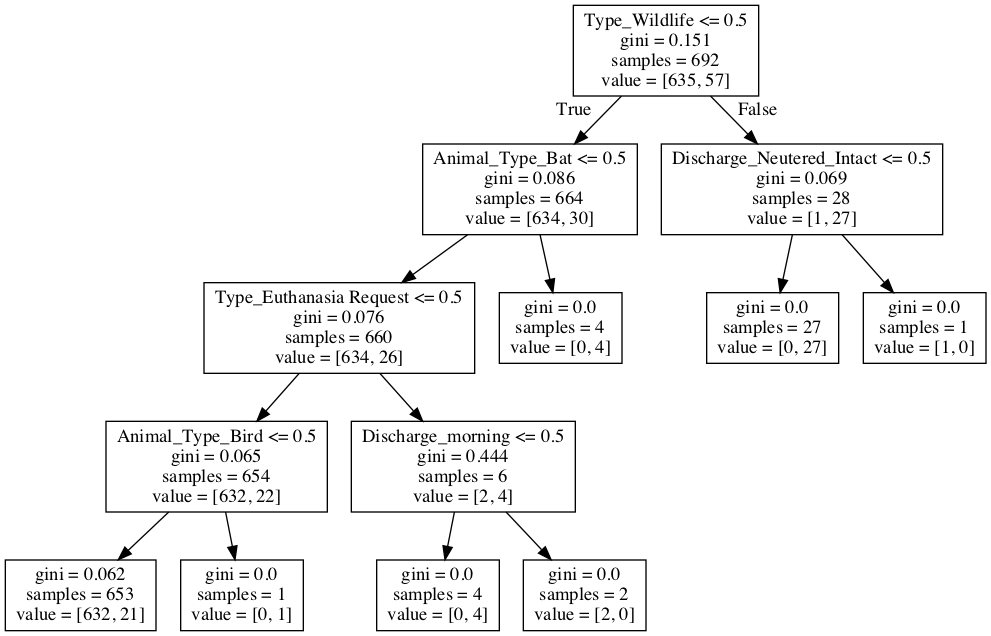

In [1531]:
from IPython.display import Image 
pil_img = Image(filename='DecisionTree4.png')
display(pil_img)

##### Tree interpretation
-----
- The root node in this tree has been identified as Type_Wildlife (value for Type_Wildlife is >= 0.5). This means that this feature performs the best in terms of splitting features into those with the positive class (binary outcome = 1.0) and thoswe with the negative class (binary outcome = 0.0).


- This is in line with previous observations. Of the 28 animals that are of type wildlife, 27 are of the positive class, with just one being of the negative class.


- The Type_Wildlife positive animals can be divided perfectly into those with binary outcome of 1.0 and those with outcome of 0.0 with the Discharge_Neutered_Intact feature.


- Animals with Discharge_Neutered_Intact feature <= 0.5 (i.e. were not intact on discharge) had a poor outcome, while the one animal of that subset which was intact had a good outcome. On closer inspection the animals which tested true for the condition (27 animals), their neutered status 'unknown', which means it is not known if the animal was neutered or not. In section 5, using the 'neuteredInShelter' feature might help clarify the effect of neutering.


- For non-wildlife animals the condition was Animal_Type_Bat. With the four animals which are Bats, all showing poor outcomes.


- As the tree progresses, animals which are of the type 'euthanasia request' followed by 'discharge_morning' can separate that subset of animals into positive and negative classes.


- After the final branch of this tree 'Animal_Type_Bird', there are 653 samples left in the leaf node out of an original 692. Out of the 39 samples classified:
    - There have been three animals identified as having a negative class (binary outcome = 0.0)
    - There were 36 animals identified as having a positive class (binary outcome = 1.0)
    
    
- This decision tree (of depth = 4), classifies over 50% of the positive class samples, which is relatively high. However, as is the weakness of decision trees, this tree looks on surface glance to be quite specific to the dataset and is at risk of overfitting.

##### Tree of depth = 4

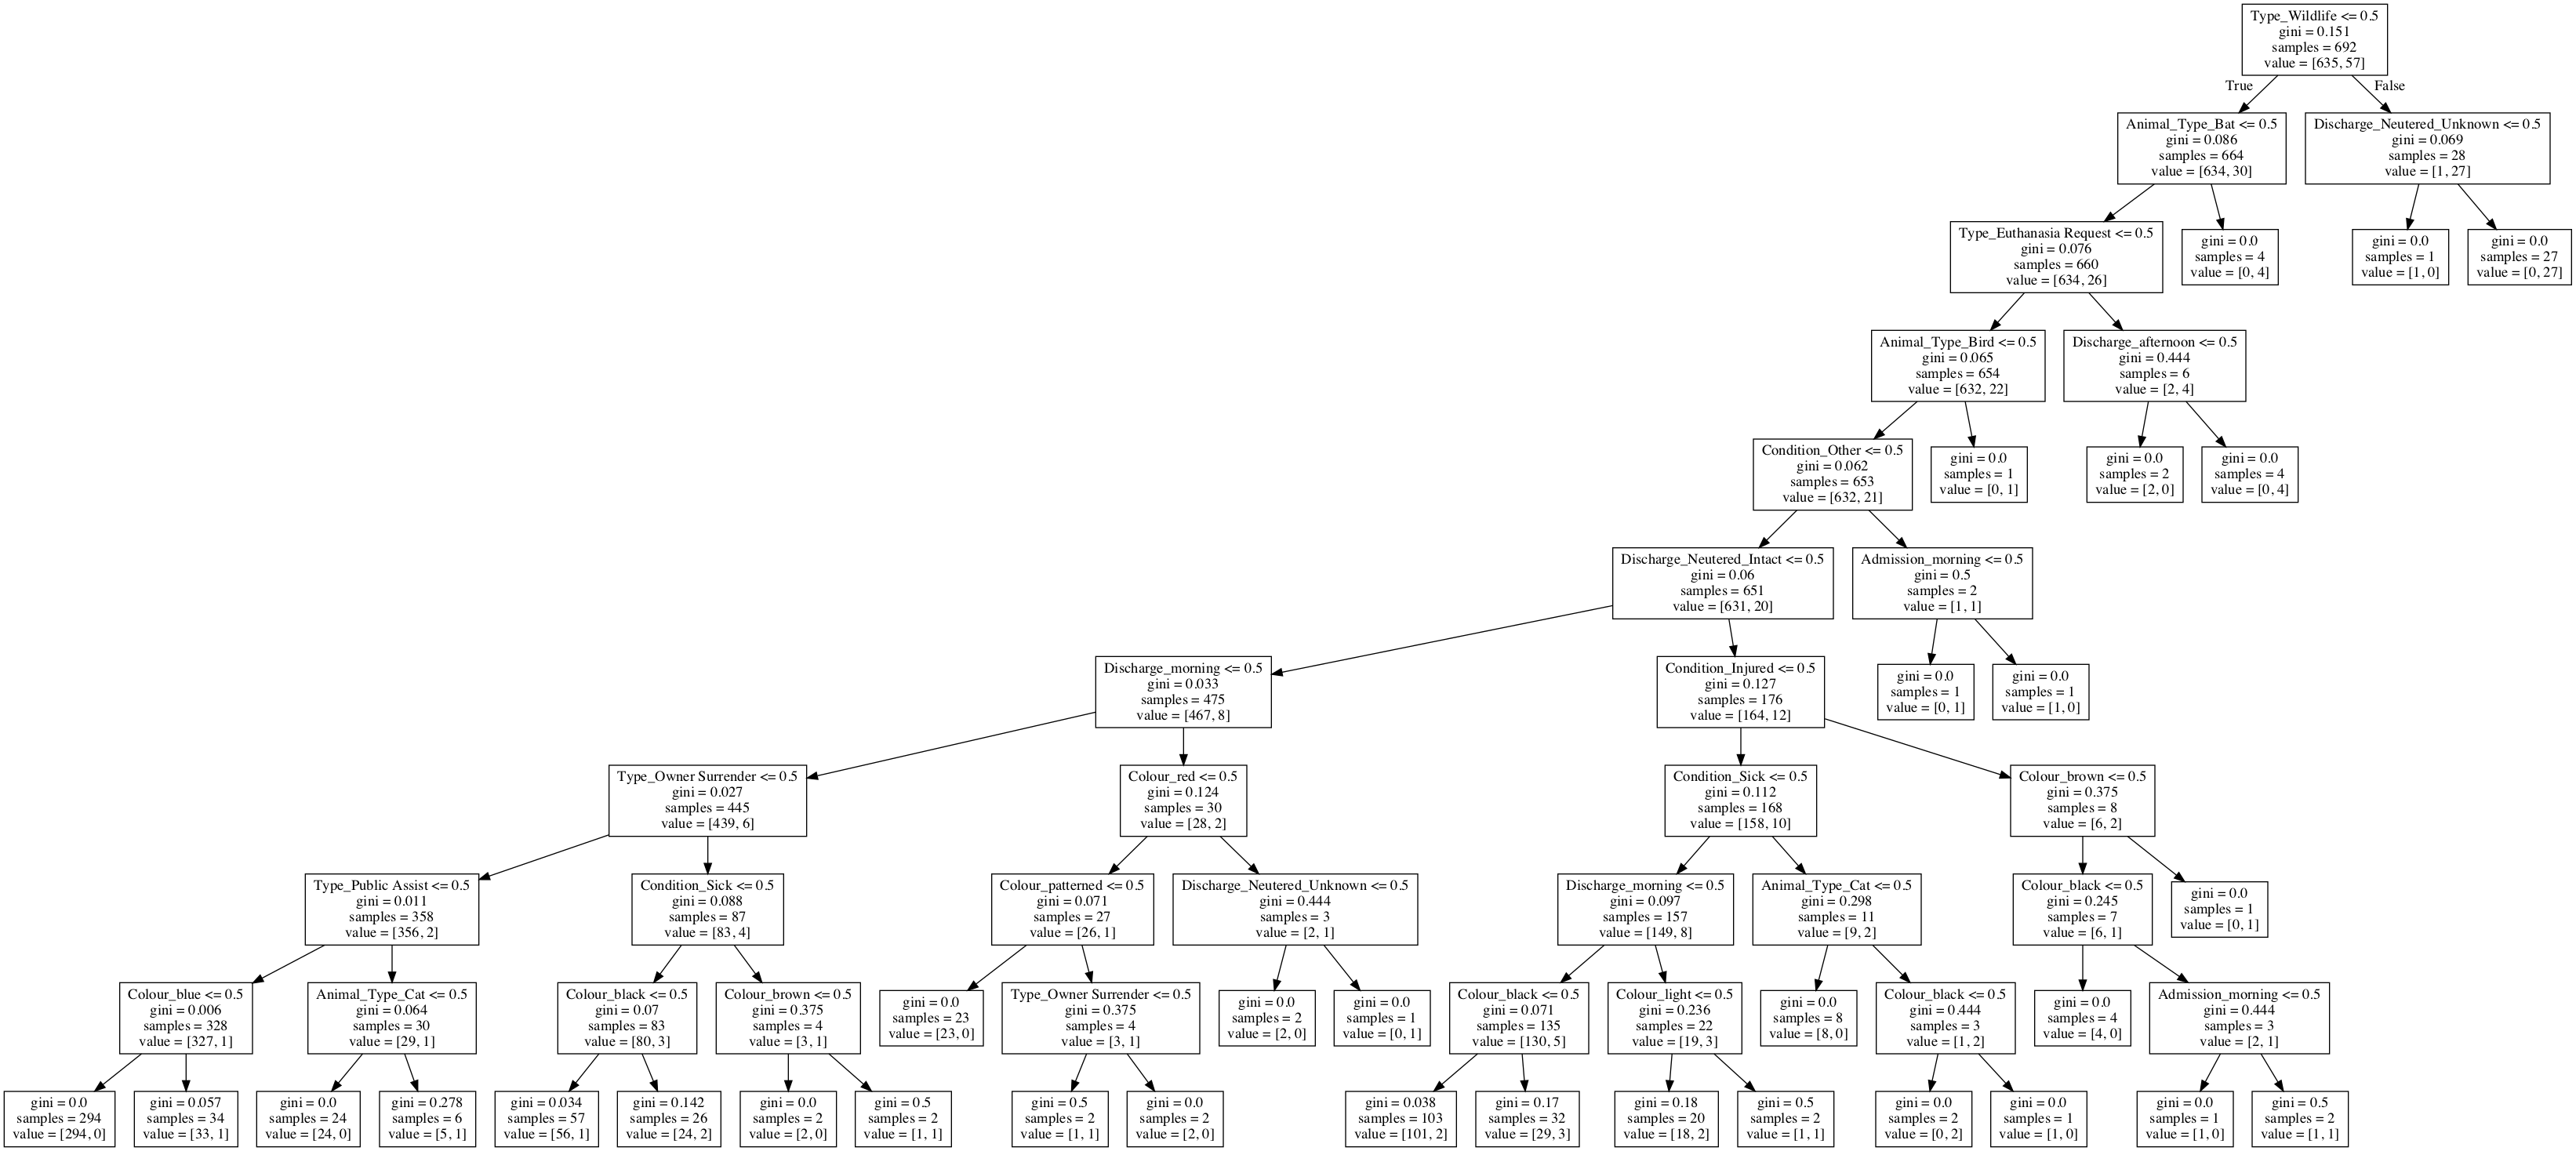

In [1532]:
pil_img = Image(filename='DecisionTree10.png')
display(pil_img)

- A tree of this size is much more difficult to dissect and analyse.


- The first false branch from the root node, has changed to Discharge_Neutered_Unknown, which as discussed above is more appropriate to capture the context of the data.


- Discharge_Neutered_Intact instead causes a relatively major split into branches further down the tree.


- At glance the gini index scores are consistently relatively low, and the leaf nodes tend to contain quite a small amount of samples. It will be interesting to view the importance ranking of the features and see if there are a number of features that are not necessary.


- Once again this well classifies the data, but my concern is with how dynamic this tree will be to new data. Hopefully the random forest can address this concern.

#### 4.2.3. Interpretation of random forest model

- Previously two specific trees of different depths were observed. 


- From these trees there were clearly features which appeared to hold more predicitive importance than others, it is important to see how this trend holds over many trees to get a better idea of actual general importance of a given feature.


- The random forest classifier (rfc) trained earlier is used to rank features based on their information gain over 100 decision trees (model parameter was n_estimators = 100).


- This should help identifiy those features which are consistently useful (i.e. will assist in predicting outcome with new data) and those which are not.


- This information could be used to optimise the features included in the model (get rid of unnecessary noise).

In [1533]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
6,Type_Wildlife,0.209985
14,Animal_Type_Bat,0.208095
35,Discharge_Neutered_Unknown,0.085439
3,Type_Euthanasia Request,0.044517
16,Animal_Type_Cat,0.044002
13,Condition_Sick,0.037709
34,Discharge_Neutered_Intact,0.034751
32,Discharge_morning,0.030444
2,Admission_night,0.026180
4,Type_Owner Surrender,0.023618


- As observed in the decision trees, Type_Wildlife and Animal_Type_Bat are the most important features with almost equivalent values of 0.209985 and 0.208095.


- Colour_green,Animal_Type_Turtle, Condition_Pregnant and Condition_Feral show an importance of 0.000000, with several other features not having much higher values. These are potential features to drop.

#### 4.4. Printing 100 predicted target features and evaluating prediction
- Here we will print the predicted target feature value for the first 100 training examples. 



In [1534]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y_train, 'PredictedClass': rfc_predictions_train})
df_true_vs_rfc_predicted.head(100)

,ActualClass,PredictedClass
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


#### 4.5. Evaluation metrics based on training data
- As with the linear model, to evaluate the model we will use a number of classification related metrics:
    - Accuracy
    - Confusion Matrix
    - Precision
    - Recall
    - F1
    

- For training and later test data these metrics will be used to evaluate the model perfomance.

In [1535]:
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.9841040462427746
Confusion matrix: 
 [[635   0]
 [ 11  46]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99       635
           1       1.00      0.81      0.89        57

    accuracy                           0.98       692
   macro avg       0.99      0.90      0.94       692
weighted avg       0.98      0.98      0.98       692



#### Interpretation of training data results
-----
1. Accuracy
  - The accuracy is very high (98.4%)
  
2. Confusion Matrix
  - There are no false positives.
  - The majority of the predictions fall under the true negative category, meaning the model on the test data shows a similar aptitude for correctly predicting the negative class.
  - Compared to previous model test sets, the number of FN is low (11).
  - Compared to previous model test sets, the number of TP is high (46).
  
3. Precision
  - The precision positive is 1.00
  - The precision negative is 0.98
  - This high precision is due to the lack of false positives.
  
4. Recall
  - The recall positive is 0.81
  - The recall negative is 1.0
  - The model shows high recall, this is reflecting the low number of FN compared to TP seen.
  
5. F1 Score
  - The F1 score positive is 0.89
  - The F1 score negative is 0.99
  - The model shows a very high F1 score for the positive class, due to the high precision and recall.

#### Overall
----
- On the training set there is a high accuracy, precision, recall and F1-score, there are no false positives, only 11 false negatives and 46 true positives.


- The performance metrics are very good, however I am cautious when evaluating this model as this is the data it has been trained on and given the nature of random forest models, it will be quite well optimised to perform well on training data.


- The metrics from the test data will be informative to see if there is overfitting in the model.

#### 4.6. Evaluation metrics based on test data
- As previously seen we have trained the data on the training set (70% of original dataset)


- To evaluate how well the trained model will do on a new set of data, test the model and evaluate its predictions when run using the test dataset (30% of original dataset)


- In addition they will be compared to the results from a cross-validated model (i.e. a new model trained and evaluated using cross-validation on the full dataset).

In [1536]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(20)

,ActualClass,PredictedClass
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [1537]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9562289562289562
Confusion matrix: 
 [[271   1]
 [ 12  13]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       0.93      0.52      0.67        25

    accuracy                           0.96       297
   macro avg       0.94      0.76      0.82       297
weighted avg       0.96      0.96      0.95       297

==================== Train Data =======================
Accuracy:  0.9841040462427746
Confusion matrix: 
 [[635   0]
 [ 11  46]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      1.00      0.99       635
           1       1.00      0.81      0.89        57

    accuracy                           0.98       692
   macro avg       0.99      0.90      0.94       692
weighted avg       0.98      0.98      0.98       692



#### Interpretation of test data results
-----
1. Accuracy
  - The accuracy is high (95.6%), but lower than the training data, which is to be expected.
  
2. Confusion Matrix
  - There is one false positive.
  - The majority of the predictions fall under the true negative category (271).
  - Compared to the training data, the number of FN is proportionally much higher (~50%).
 - Compared to the training data, the number of TP is proportionally much lower (~50%).
  
3. Precision
  - The precision positive is 0.93
  - The precision negative is 0.96
  - The precision has dropped due to the presence of a false positive.
  
4. Recall
  - The recall positive is 0.52
  - The recall negative is 1.0
  - The positive recall has dropped dramatically (by ~ 0.3). This is due to the lower TP and higher FN.
  
5. F1 Score
  - The F1 score positive is 0.67
  - The F1 score negative is 0.98
  - The positive recall has dropped (by ~ 0.22). This is due to the lower TP, higher FN and lower precision.

#### Overall
----
- On the test set there is a high accuracy and precision but noticeably lower recall and F1-scores.


- The performance on the test data is very similar to the metrics observed in the logistic and linear regression models, and a large reduction compared to the training data

- The previous concern of overfitting appears to be warranted as the recall and F1-score has dropped quite dramatically between the training and test data. As seen in other models there is a high number of false negatives proportional to the number of true positives.

#### 4.7 Cross validation
We will first create function to perform 10 fold cross validation and store results into a dataframe
- This will be used to simplify further analysis the dataset, looking at accuracy, precision, recall, f1.

In [1538]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100,class_weight=None):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(class_weight=class_weight,n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

#### Summary of random forest results

In [1539]:
RandomForestDF = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.949443
precision,0.804762
recall,0.529167
f1,0.624344


#### Interpretation of cross validation results
-----
- Overall the results of the cross validation are largely similar to that of the metrics observed on the test data set.


- The accuracy is similar, the precision has dropped quite significantly (0.93 - 0.8), the recall has remained the same and the F1-score has dropped slightly (0.67 - 0.62), due to the drop in precision.


- Overall the random forest model appears to perform well on training data but its performance drops significantly when introduced to new data, suggsting some model overfitting.


- The random forest model does not appear to improve upon the weaknesses observed in the linear and logistic regression models, and in fact performs in a very similar manner.

### 4.8 Out of bag accuracy


In [1540]:
# compute the out-of-bag classification accuracy
rfc.oob_score_

0.9595375722543352

Finally the oob score is similar to the results of the cross validation seen above.

## Part 5 - Improving the Predictive Models

### 5.1. Which model performs better at predicting the target feature?

In order to directly compare the models in a consistent manner, the results of the cross validation in each case will be used as the performance mark in each of the classification metrics.

In [1541]:
ResultsDF_model = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_model

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.951515,0.954515,0.949443
precision,0.871437,0.965714,0.804762
recall,0.515178,0.480556,0.529167
f1,0.641905,0.613916,0.624344


1. Accuracy
    - All models show very similar accuracy levels all falling within +/- 1% of each other. 
    
2. Precision
    - There is a clear difference in precision between the three models.
    - Logistic regression is by far the most precise model, with a score almost 10% higher than the next closet model.
    - Random forest shows the worst performance in terms of precision (16% lower than logistic regression), with linear regression falling in the middle (10% lower).
    
3. Recall
    - There is a small variance in the recall values.
    - Random forest is the most sensitive of the models (~53%)
    - Linear regression is following closely in terms of sensitivity (~51.5%).
    - Logistic regression is the least sensitive model with a recall of 48%.

4. F1-Score
    - There is only small variation in the F1-scores with all falling within 3% of each other.
    - Although the logistic regression model was the most precise, due to the lower recall, it has the lowest F1-Score (61.4%).
    - Linear regression has the highest F1-score (64.2%), followed by the random forest model (62.4%).
    
    
##### Overall
----
- Each model appears to have strengths and weaknesses, with there being no clear 'best model' but more so models that perform better in a particular metric.


- All models show very similar accuracy
- Logistic regression clearly has the most precision by a relatively large margin.
- Random forest has the best recall performance i.e. most sensitive by a small margin
- Linear regression has the best F1-score by a small margin.


- It is important to remember that these models are trained on a subset of featured selected in section 1. Given the very similar performance between the models, feature selection is an important aspect to reconsider and investigate.

### 5.2. Majority classifier

- To see if the models actually add any predictive ability they will be compared to the scenario of the majority class (i.e. negative class/ binary outcome = 0.0) always being predicted.


- Below we demonstrate the breakdown of positive and negative class proportions

In [1542]:
good_count = y_test[y_test == 0].count()
bad_count = y_test[y_test == 1].count()
total = good_count+ bad_count
print(f'From original dataset: \t\tCount {total}')
print(f'Binary outcome = 0.0 (good outcome):\t {good_count}\t{round(good_count/len(y_test)*100,2)}%')
print(f'Binary outcome = 1.0 (bad outcome):\t {bad_count}\t{round(bad_count/len(y_test)*100,2)}%')

From original dataset: 		Count 297
Binary outcome = 0.0 (good outcome):	 272	91.58%
Binary outcome = 1.0 (bad outcome):	 25	8.42%


- The majority class is quite clearly the negative class/0 (good outcomes)


- One of my suspicions for the poor model performance could be due to the low proportion of the minority class (poor outcomes). This could be a factor in the low sensitivity seen in the models.

#### Majority Class performance

In [1543]:
# generate array of 253 zeros (length of test dataset)
majority = np.zeros(297)
# create dataframe 
df_majorityClass = pd.DataFrame(majority, columns=['prediction'])
# calculate scores of simple predictin vs actual
print("Accuracy: ", metrics.accuracy_score(y_test, df_majorityClass))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, df_majorityClass))
print("Classification report:\n ", metrics.classification_report(y_test, df_majorityClass))

Accuracy:  0.9158249158249159
Confusion matrix: 
 [[272   0]
 [ 25   0]]
Classification report:
                precision    recall  f1-score   support

           0       0.92      1.00      0.96       272
           1       0.00      0.00      0.00        25

    accuracy                           0.92       297
   macro avg       0.46      0.50      0.48       297
weighted avg       0.84      0.92      0.88       297



- The accuracy of the majority class is worse than all of the models


- The negative class precision is higher than linear regression and random forest models, but lower than the logistic regression model

- As would be expected the model does not predict the positive class correctly once (all false negatives), meaning all classification scores are 0.



### 5.3. Compare feature subsets

#### 5.3.1. All features
- The models seen so far have been evaluated using the subsest of features identified in section 1.


- To see if having a feature subset improves the model performance all models will be trained on all features and evaluated after cross validation.

In [1544]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df)
# set X,y
y_all = df_all["binary_outcome"]
X_all = df_all.drop(["binary_outcome"],1)
print("number of features incl dummies: ", len(X_all.columns))

number of features incl dummies:  142


In [1545]:
# calculate Linear regression, logistic regression, random forest results again using all features
linRegDF_all = cross_val_LinReg_DF(X,y)
logRegDF_all = cross_val_LogReg_DF(X,y)
RandomForestDF_all = cross_val_RandomForest_DF(X,y)
# merge all 3 models into dataframe
ResultsDF_allFeatures = pd.concat([linRegDF_all, logRegDF_all, RandomForestDF_all], axis=1)



##### All features

In [1546]:
ResultsDF_allFeatures

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.951515,0.954515,0.949443
precision,0.871437,0.965714,0.804762
recall,0.515178,0.480556,0.529167
f1,0.641905,0.613916,0.624344


##### Model Subset

In [1547]:
ResultsDF_model

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.951515,0.954515,0.949443
precision,0.871437,0.965714,0.804762
recall,0.515178,0.480556,0.529167
f1,0.641905,0.613916,0.624344


##### All features vs model subset
-----
1. Linear regression
    - This model appears to be the only one that noticeably improves with the subset
    - With all features the accruacy is reduced and the precision is dramatically lower however the recall is slighlty higher.
    - The F1-score is significanlty lower in the all features model
    - Both models show similar sensitivity but the precision drops when all features are included
    - This may be explained by the presence of multi-colinearity (i.e. very highly correlated independent variables). Such features were seen in section 1.
    
    
2. Logistic regression
    - The logistic regression model has a higher precision when the subset of features are used 
    - However the recall is lower in the subset feature model compared to the all festure model
    - The F1-score which takes both recall and precision into account is very similar in both cases.
    
    
3. Random Forest
    - The opposite effect to that seen in the logistic regression model occurs in the random forest model
    - When using all features the model is far more precise, but the recall is slightly lower.
    - The F1-score is slightly higher in the all features model
    
    
#### Overall
----
- There are some changes in each model, and they are all effected in different ways.

- Linear regression clearly benefits from being trained on the subset of features

- Logistic regression precision improves with the subset of features but its sensitivity (recall) decreases.


- Random forest precision increases with all features, but its sensitivity drops slightly


- Overall the best metrics seen appear to be all features on the random forest model. The issue of low precision is accounted for. The recall suffers slightly as a result but there appears to be a net benefit (higher F1-score). With feature optimisation this could prove to be the most viable predictive model. This was the expected outcome as random forests deal better with imbalanced data.

### 5.4. Investigating optimisations

- From the results above the best performing model appeared to be the random forest


- As the random forest performed better when all features were included, it suggsets that potentially important features were left out of the model subset.


- In an attempt to optimise the random forest model we will perform three tasks:
    1. Feature optimisation [importance ranking]
    2. Max_depth optimisation
    3. number of estimators optimisatin
    

- For each of the above optimisations models trained on (i) all features (ii) optimised features and (iii) original model subset of features will be compared in order to select the best performing model going forward.


- The logistic regression model will also be optimised through:
    1. Feature optimisation [importance ranking]
    2. Threshold optimisation

#### 5.4.1. Random Forest (RF) Optimisation

##### 5.4.1.1. RF Feature optimisation


- The random forest clasifier model will be used to rank features based on their 'importance' i.e. their information gain.


- Subsets of the most important features will be tested initially on a random forest model to investigate if this new subset improves performance.

In [1548]:
# setup dataframe, convert all features to dummy features. 
df_all = pd.get_dummies(df)
y_all = df_all["binary_outcome"]
X_all = df_all.drop(["binary_outcome"],1)
# split into training and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, random_state=1 , test_size=0.3)

In [1549]:
print("\n Total dataset counts for binary outcome: \n")
print("0 (negative): {} (% {} of total datset)".format(y_all.value_counts(0)[0],y_all.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of total datset)".format(y_all.value_counts(0)[1],y_all.value_counts(1)[1]*100))
print("\nTraining data binary_outcome counts:\n")
print("0 (negative): {} (% {} of training datset)".format(y_train_all.value_counts(0)[0],y_train_all.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of training datset)".format(y_train_all.value_counts(0)[1],y_train_all.value_counts(1)[1]*100))
print("\nTest data binary_outcome counts:\n")
print("0 (negative): {} (% {} of test datset)".format(y_test_all.value_counts(0)[0],y_test_all.value_counts(1)[0]*100))
print("1 (positive): {} (% {} of test datset)".format(y_test_all.value_counts(0)[1],y_test_all.value_counts(1)[1]*100))


 Total dataset counts for binary outcome: 

0 (negative): 907 (% 91.70879676440849 of total datset)
1 (positive): 82 (% 8.291203235591507 of total datset)

Training data binary_outcome counts:

0 (negative): 636 (% 91.90751445086705 of training datset)
1 (positive): 56 (% 8.092485549132949 of training datset)

Test data binary_outcome counts:

0 (negative): 271 (% 91.24579124579124 of test datset)
1 (positive): 26 (% 8.754208754208754 of test datset)


Train random forest model and print out the features ranked according to information gain

In [1550]:
# Train RF with 100 trees
rank = [x for x in range(1,len(X_all.columns)+1)]
rfc_all = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train_all, y_train_all)
importance = pd.DataFrame({'feature': X_train_all.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
importance.set_index('feature',1, inplace=True)
importance["rank"] = rank
importance.head(50)

,importance,rank
feature,,
Type_Wildlife,0.087392,1
Animal_Type_Bat,0.076216,2
Breed_Other animal,0.066034,3
Time_In_Shelter,0.040924,4
Discharge_Age_ratio,0.036814,5
Type_Stray,0.033600,6
Discharge_Age,0.030984,7
Admission_Age_ratio,0.030937,8
Sex_Unknown,0.029928,9


- From this list, the vast majority of features do not add much information (i.e. low information gain)


- Features previously shown to have predictive value were seen high in the importance list e.g. 'Type_Wildlife'


- To optimise the number of features the top 40 features (approximately >=0.006) will be run through a random forest model and its performance evaluated

In [1551]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
RandomForest_Features = pd.DataFrame()
count=0

# loop over 'importance' dataframe adding 1 feature per loop (will be the next most important feature)
# each loop calculates the score for the current number of features in the list_features
# Each loop appends result to RandomForest_Features dataframe
for index, row in importance.iterrows():
    # only calculate the top 22 features to keep runtime down
    if count < 30:
        list_features.append(index)
        X_temp = df_all[list_features]
        df1 = cross_val_RandomForest_DF(X_temp,y_all, depth=10)
        df1.rename(columns={'Random_Forests':f'features={len(list_features)}'}, inplace=True)
        RandomForest_Features = pd.concat([RandomForest_Features, df1], axis=1)
        count+=1
    else:
        break

# to display all columns    
pd.set_option('display.max_columns', 40)
RandomForest_Features  

KeyboardInterrupt: 

Not stratified (Optimal feature number = 23):
    - Accuracy - 0.958555
    - Precision - 0.944048
    - Recall -  0.541667
    - F1_score - 0.670519


Stratified (Optimal feature number = 22):
    - Accuracy - 0.957545
    - Precision - 0.919048
    - Recall -  0.541667
    - F1_score - 0.666673


- The model performance appears to improve with more features, but the improvement is very gradual.


- With just one feature the model appears to perform relatively well in comparison to the models previously seen.


- With four features there is an improvement in recall and F1-score to levels similar to the best performing model previously seen.


- Interestingly there is a difference in the optimal number of features between when the data is stratified and when it is not at the 'train:test split', even though the difference in positive target features is 1 extra in the stratified set.


- When not stratified, at 23 features the accuracy remains high, with a high precision and the highest recall and F1-Score from all the feature subsets.


- When stratified, the optimal feature number is 22. At this point there is similar recall levels to that of the non-stratified optimal sset, however the precision is approximately 0.03 lower, resulting in a slightly lower F1-score

- This could be that the extra row in the stratified set results in a change in the root node(Animal_Type_Bat, Breed_Other animal and Type_Wildlife) . In the non-stratified set Type_Wildlife, Animal_Type_Bat and Breed_Other animal are the three most important features (in order). 


- As the non-stratified subset performs better during cross validation, it is these top 23 features which will be used going forward as the optimised feature set for the random forest model.

In [147]:
# Form an optimal subset of the first 23 most important features
RF_opt_features = list_features[:23]



NameError: name 'list_features' is not defined

##### 5.4.1.2. RF Max_Depth

- As seen previously random forests are made of of decision trees which can have a variable depth, the depth can affect the performance of a model


- The optimal Max_depth will be investigated for three feature sets:
    1. All Features from the original dataset
    2. The optimised feature set (seen in 5.4.1.1)
    3. The feature subset from section 1 used to train the models

1. All Features

In [1287]:
# initialised empty daraframe
RandomForest_Depth = pd.DataFrame()

# calculate cross val score incrementing max depth by 1 each iteration
# append results to dataframe
for i in range(1,11):
    df1 = cross_val_RandomForest_DF(X_all,y_all,i)
    df1.rename(columns={'Random_Forests':f'depth={i}'}, inplace=True)
    RandomForest_Depth = pd.concat([RandomForest_Depth, df1], axis=1)

# same calculation but use no max depth this time
no_max_depth = cross_val_RandomForest_DF(X_all,y_all)
no_max_depth.rename(columns={'Random_Forests':f'no_max_depth'}, inplace=True)
RandomForest_Depth_all = pd.concat([RandomForest_Depth, no_max_depth], axis=1)
RandomForest_Depth_all

,depth=1,depth=2,depth=3,depth=4,depth=5,depth=6,depth=7,depth=8,depth=9,depth=10,no_max_depth
accuracy,0.917089,0.947444,0.957545,0.957545,0.957545,0.957545,0.957545,0.956535,0.957545,0.955525,0.957545
precision,0.000000,0.900000,1.000000,0.985714,0.985714,0.985714,0.985714,0.960714,0.985714,0.935714,0.985714
recall,0.000000,0.369444,0.491667,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167
f1,0.000000,0.491725,0.638395,0.647226,0.647226,0.647226,0.647226,0.643380,0.647226,0.639534,0.647226


- The optimal depth for all features is a depth of 9. A depth of 9 performs similar to no_max_depth but would significantly improve running time for the model.


- At a depth of 9 all metrics are the precision increases by approximately 0.025 compared to when there is no depth optimisation


- For the full feature set, a depth of 10 will be used

(ii) Optimised Features

In [237]:
# initialised empty daraframe
RandomForest_Depth = pd.DataFrame()

# calculate cross val score incrementing max depth by 1 each iteration
# append results to dataframe
for i in range(1,11):
    df1 = cross_val_RandomForest_DF(X_opt,y_opt,i)
    df1.rename(columns={'Random_Forests':f'depth={i}'}, inplace=True)
    RandomForest_Depth = pd.concat([RandomForest_Depth, df1], axis=1)

# same calculation but use no max depth this time
no_max_depth = cross_val_RandomForest_DF(X_opt,y_opt)
no_max_depth.rename(columns={'Random_Forests':f'no_max_depth'}, inplace=True)
RandomForest_Depth_opt = pd.concat([RandomForest_Depth, no_max_depth], axis=1)
RandomForest_Depth_opt

,depth=1,depth=2,depth=3,depth=4,depth=5,depth=6,depth=7,depth=8,depth=9,depth=10,no_max_depth
accuracy,0.944403,0.957545,0.957545,0.957545,0.956535,0.958555,0.957545,0.958555,0.958555,0.958555,0.957545
precision,0.900000,0.985714,0.985714,0.985714,0.965714,0.985714,0.965714,0.965714,0.965714,0.944048,0.937143
recall,0.331944,0.504167,0.504167,0.504167,0.504167,0.516667,0.516667,0.529167,0.529167,0.541667,0.541667
f1,0.453434,0.647226,0.647226,0.647226,0.642098,0.657483,0.652354,0.664476,0.664476,0.670519,0.664476


- At a depth of 6 and 9 the precision is among the highest out of all subsets, however the recall is less. At a depth of 10 the precision is 0.04 lower but the precision is the largest out of all subsets, resulting in the highest F1-Score


- For the optimised feature set, a depth of 10 will be used

(iii) Model Subset

In [283]:
# initialised empty daraframe
RandomForest_Depth = pd.DataFrame()

# calculate cross val score incrementing max depth by 1 each iteration
# append results to dataframe
for i in range(1,11):
    df1 = cross_val_RandomForest_DF(X,y,i)
    df1.rename(columns={'Random_Forests':f'depth={i}'}, inplace=True)
    RandomForest_Depth = pd.concat([RandomForest_Depth, df1], axis=1)

# same calculation but use no max depth this time
no_max_depth = cross_val_RandomForest_DF(X,y)
no_max_depth.rename(columns={'Random_Forests':f'no_max_depth'}, inplace=True)
RandomForest_Depth = pd.concat([RandomForest_Depth, no_max_depth], axis=1)
RandomForest_Depth

,depth=1,depth=2,depth=3,depth=4,depth=5,depth=6,depth=7,depth=8,depth=9,depth=10,no_max_depth
accuracy,0.918099,0.949464,0.954515,0.957545,0.957545,0.957545,0.956524,0.956524,0.956524,0.956524,0.949443
precision,0.100000,0.900000,0.985714,0.985714,0.985714,0.985714,0.969048,0.969048,0.969048,0.944048,0.804762
recall,0.011111,0.394444,0.468056,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.516667,0.529167
f1,0.020000,0.518392,0.604499,0.647226,0.647226,0.647226,0.641732,0.641732,0.641732,0.648142,0.624344


- Although both a depth of 4-9 boast a higher precision, when taking both precision and recall into account (as reflected by the F1-Score) a depth of 10 appears to be the optimal depth for the model when trained on this dataset.

##### 5.4.1.3. RF Number of estimators

- Random forest models consist of many decision trees. The number of trees in the model is known as the 'estimator'.


- The same three feature sets seen in 5.4.1.2 will be investigated for the optimal estimator number

1. All features

In [247]:
# initialised empty daraframe

RandomForest_Estimators_all = pd.DataFrame()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for item in n_estimators:
    df1 = cross_val_RandomForest_DF(X_all,y_all,estimators=item)
    df1.rename(columns={'Random_Forests':f'estimators={item}'}, inplace=True)
    RandomForest_Estimators_all = pd.concat([RandomForest_Estimators_all, df1], axis=1)

RandomForest_Estimators_all

,estimators=1,estimators=2,estimators=4,estimators=8,estimators=16,estimators=32,estimators=64,estimators=100,estimators=200
accuracy,0.928231,0.942352,0.951464,0.958555,0.954504,0.957545,0.956535,0.957545,0.956535
precision,0.567500,0.851667,0.913333,0.935714,0.904048,0.985714,0.960714,0.985714,0.960714
recall,0.541667,0.380556,0.466667,0.541667,0.516667,0.504167,0.504167,0.504167,0.504167
f1,0.546791,0.498586,0.596743,0.674033,0.642864,0.647226,0.643380,0.647226,0.643380


- The optimal number of estimators is 8, however both a model with 8 and 100 will be compared, as 8 is a low number of decision trees and puts the model at risk of not generalizing well to new data.

2. Optimised Features

In [249]:
# initialised empty daraframe
RandomForest_Estimators_opt = pd.DataFrame()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for item in n_estimators:
    df1 = cross_val_RandomForest_DF(X_opt,y_opt,estimators=item)
    df1.rename(columns={'Random_Forests':f'estimators={item}'}, inplace=True)
    RandomForest_Estimators_opt = pd.concat([RandomForest_Estimators_opt, df1], axis=1)

RandomForest_Estimators_opt

,estimators=1,estimators=2,estimators=4,estimators=8,estimators=16,estimators=32,estimators=64,estimators=100,estimators=200
accuracy,0.935312,0.944414,0.954525,0.955535,0.955525,0.954504,0.955525,0.957545,0.957545
precision,0.636764,0.841667,0.916071,0.907143,0.919881,0.898214,0.907381,0.937143,0.945714
recall,0.552778,0.418056,0.527778,0.540278,0.529167,0.529167,0.529167,0.541667,0.529167
f1,0.585396,0.538478,0.637140,0.655633,0.649118,0.644906,0.651106,0.664476,0.659347


- The optimal number of estimators is 100

3. Model Subset

In [284]:
# initialised empty daraframe
RandomForest_Estimators = pd.DataFrame()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for item in n_estimators:
    df1 = cross_val_RandomForest_DF(X,y,estimators=item)
    df1.rename(columns={'Random_Forests':f'estimators={item}'}, inplace=True)
    RandomForest_Estimators = pd.concat([RandomForest_Estimators, df1], axis=1)

RandomForest_Estimators

,estimators=1,estimators=2,estimators=4,estimators=8,estimators=16,estimators=32,estimators=64,estimators=100,estimators=200
accuracy,0.941373,0.947413,0.946403,0.948433,0.948433,0.948433,0.950454,0.949443,0.951464
precision,0.690635,0.810278,0.785714,0.790476,0.770476,0.770476,0.815476,0.804762,0.840476
recall,0.541667,0.516667,0.504167,0.516667,0.529167,0.529167,0.529167,0.529167,0.529167
f1,0.595661,0.607698,0.593626,0.612677,0.619670,0.619670,0.628645,0.624344,0.633190


- For the model subset, the more estimators, the better the model metrics.


- The precision is noticeably smaller compared to the other two scenarios above.


- For this dataset the optimal number of estimators is 200

##### 5.4.1.4. Compare all Random forest models

The optimal model for each featureset will be compared to identify the best model to proceed with

1. All features

- Max_depth = 9

- number of estimators = 8 (or 100)


2. Optimal features

- Max_depth = 10

- number of estimators = 100


3. Model subset

- Max_depth = 10

- number of estimators = 200

In [1294]:
RandomForestDF_all = cross_val_RandomForest_DF(X_all,y_all,depth=9,estimators=8)
RandomForestDF_opt = cross_val_RandomForest_DF(X_opt,y_opt,depth=10,estimators=100)
RandomForestDF_model_sub = cross_val_RandomForest_DF(X,y,depth=10,estimators=200)

In [1295]:
print("\nScores using all features: 142 features (includes dummy variables) ")
print("===================================================================")
print(RandomForestDF_all)
print("\nScores using optimum features: 23 features (119 features dropped from 'all features' set)")
print("===================================================================")
print(RandomForestDF_opt)
print("\nScores using model subset features: 36 features (Features identified in section 1)")
print("===================================================================")
print(RandomForestDF_model_sub)



Scores using all features: 142 features (includes dummy variables) 
           Random_Forests
accuracy         0.957545
precision        0.985714
recall           0.504167
f1               0.647226

Scores using optimum features: 23 features (119 features dropped from 'all features' set)
           Random_Forests
accuracy         0.958555
precision        0.944048
recall           0.541667
f1               0.670519

Scores using model subset features: 36 features (Features identified in section 1)
           Random_Forests
accuracy         0.955514
precision        0.944048
recall           0.504167
f1               0.637885


- There is a clear improvement in performance when using the optimum features.


- Going forward this will be the model that further improvements will be made upon.

#### 5.4.2. - Logistic Regression (LR) Optimisation

##### 5.4.2.1. LR Feature optimisation

In [289]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
New_Features = pd.DataFrame()
count=0

# loop over 'importance' dataframe adding 1 feature per loop (will be the next most important feature)
# each loop calculates the score for the current number of features in the list_features
# Each loop appends result to RandomForest_Features dataframe
for index, row in importance.iterrows():
    # only calculate the top 22 features to keep runtime down
    if count < 40:
        list_features.append(index)
        X_temp = df_all[list_features]
        df1 = cross_val_LogReg_DF(X_temp,y_all)
        df1.rename(columns={'Logistic_Regression':f'features={len(list_features)}'}, inplace=True)
        New_Features = pd.concat([New_Features, df1], axis=1)
        count+=1
    else:
        break

# to display all columns    
pd.set_option('display.max_columns', 40)
New_Features

,features=1,features=2,features=3,features=4,features=5,features=6,features=7,features=8,features=9,features=10,features=11,features=12,features=13,features=14,features=15,features=16,features=17,features=18,features=19,features=20,features=21,features=22,features=23,features=24,features=25,features=26,features=27,features=28,features=29,features=30,features=31,features=32,features=33,features=34,features=35,features=36,features=37,features=38,features=39,features=40
accuracy,0.953504,0.953504,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.956535,0.955525,0.955525,0.955525,0.957545,0.957545,0.955525,0.956535,0.958555,0.959565,0.959565,0.958555,0.958555,0.958555,0.958555,0.958555,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.957545,0.958555,0.957545,0.957545
precision,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.969048,0.956548,0.953214,0.953214,0.933214,0.965714,0.952381,0.910714,0.935714,0.949048,0.965714,0.965714,0.949048,0.949048,0.949048,0.949048,0.949048,0.936548,0.936548,0.936548,0.936548,0.936548,0.936548,0.936548,0.929048,0.945714,0.929048,0.929048
recall,0.454167,0.454167,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.504167,0.516667,0.516667,0.504167,0.504167,0.515278,0.515278,0.527778,0.527778,0.527778,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278,0.540278
f1,0.588236,0.588236,0.647226,0.647226,0.647226,0.647226,0.647226,0.647226,0.647226,0.647226,0.647226,0.647226,0.651988,0.646155,0.636265,0.636265,0.642675,0.653636,0.659497,0.650157,0.654003,0.670519,0.676014,0.676014,0.670519,0.670519,0.670519,0.670519,0.670519,0.664686,0.664686,0.664686,0.664686,0.664686,0.664686,0.664686,0.666124,0.671618,0.666124,0.666124


The optimal metrics occur for the same feature subset as the Random forest model which is the top 23 features.
    - Accuracy - 0.959565
    - Precision - 0.965714
    - Recall -  0.540278
    - F1_score - 0.676014
    
The performance of the logistic regression model is almost identical to that of the random forest with the same number of features in the optimal feature set.

In [290]:
# Form an optimal subset of the first 23 most important features
LogReg_opt_features = list_features[:23]


##### 5.4.2.2. LR Threshold optimisation

In [1298]:
df_optimum_features = pd.get_dummies(df)
y_LR_opt = df_optimum_features["binary_outcome"]
X_LR_opt = df_optimum_features[LogReg_opt_features]


# Split the data into training and test
X_train_logR, X_test_logR, y_train_logR, y_test_logR = train_test_split(X_LR_opt, y_LR_opt, random_state=1 , test_size=0.3)

multiple_logisticreg = LogisticRegression().fit(X_train_logR, y_train_logR)

# training data
multiple_logisticreg_predictions_train = multiple_logisticreg.predict(X_train_logR)

# Test data
multiple_logisticreg_predictions_test = multiple_logisticreg.predict(X_test_logR)

##### Training data ROC

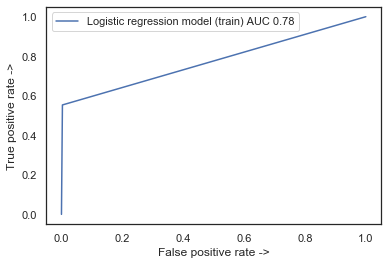

In [1299]:
# The code to make this plot was derived from: https://www.youtube.com/watch?v=TEkvKx2tQHU
lin_fpr, lin_tpr, threshold = metrics.roc_curve(y_train_logR,multiple_logisticreg_predictions_train)
auc_lin = metrics.auc(lin_fpr,lin_tpr)

plt.plot(lin_fpr,lin_tpr,label = "Logistic regression model (train) AUC {0:.2f}".format(auc_lin))
plt.xlabel("False positive rate ->")
plt.ylabel("True positive rate ->")
plt.legend()
plt.show()

##### Test data ROC

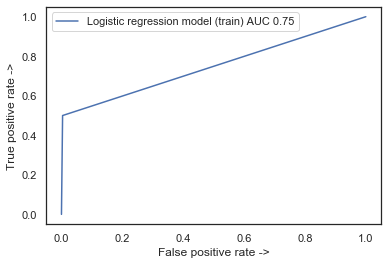

In [1300]:
# The code to make this plot was derived from: https://www.youtube.com/watch?v=TEkvKx2tQHU
lin_fpr, lin_tpr, threshold = metrics.roc_curve(y_test_logR,multiple_logisticreg_predictions_test)
auc_lin = metrics.auc(lin_fpr,lin_tpr)

plt.plot(lin_fpr,lin_tpr,label = "Logistic regression model (train) AUC {0:.2f}".format(auc_lin))
plt.xlabel("False positive rate ->")
plt.ylabel("True positive rate ->")
plt.legend()
plt.show()

- The training ROC curve shows at the optimal threshold, the TPR:FPR is approximately 58%, with an AUC of 0.78.


- The test ROC curve shows at the optimal threshold, the TPR:FPR is approximately 50%, with a slightly reduced AUC of 0.75


- These thresholds are identified below

##### Training data thresholds

In [298]:
# The code for this section was obtained from https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

pred_proba_df = pd.DataFrame(multiple_logisticreg.predict_proba(X_train_logR))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_train_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_train_logR.as_matrix().reshape(y_train_logR.as_matrix().size,1),
                                           y_train_pred.iloc[:,1].as_matrix().reshape(y_train_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(metrics.confusion_matrix(y_train_logR.as_matrix().reshape(y_train_logR.as_matrix().size,1),
                           y_train_pred.iloc[:,1].as_matrix().reshape(y_train_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.791907514450867
[[498 138]
 [  6  50]]

******** For i = 0.1 ******
Our testing accuracy is 0.9046242774566474
[[581  55]
 [ 11  45]]

******** For i = 0.15 ******
Our testing accuracy is 0.9393063583815029
[[610  26]
 [ 16  40]]

******** For i = 0.2 ******
Our testing accuracy is 0.9494219653179191
[[619  17]
 [ 18  38]]

******** For i = 0.25 ******
Our testing accuracy is 0.953757225433526
[[623  13]
 [ 19  37]]

******** For i = 0.3 ******
Our testing accuracy is 0.9609826589595376
[[629   7]
 [ 20  36]]

******** For i = 0.35 ******
Our testing accuracy is 0.9653179190751445
[[634   2]
 [ 22  34]]

******** For i = 0.4 ******
Our testing accuracy is 0.9653179190751445
[[634   2]
 [ 22  34]]

******** For i = 0.45 ******
Our testing accuracy is 0.9609826589595376
[[634   2]
 [ 25  31]]

******** For i = 0.5 ******
Our testing accuracy is 0.9609826589595376
[[634   2]
 [ 25  31]]

******** For i = 0.55 ******
Our testing accur

- The test data suggests that a threshold of 0.4 may provide some minimal classifying advantage over the default threshold of 0.5, with slightly more TP and slightly fewer FN

##### Test data thresholds

In [299]:
pred_proba_df = pd.DataFrame(multiple_logisticreg.predict_proba(X_test_logR))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test_logR.as_matrix().reshape(y_test_logR.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(metrics.confusion_matrix(y_test_logR.as_matrix().reshape(y_test_logR.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.7710437710437711
[[206  65]
 [  3  23]]

******** For i = 0.1 ******
Our testing accuracy is 0.898989898989899
[[247  24]
 [  6  20]]

******** For i = 0.15 ******
Our testing accuracy is 0.936026936026936
[[261  10]
 [  9  17]]

******** For i = 0.2 ******
Our testing accuracy is 0.9393939393939394
[[263   8]
 [ 10  16]]

******** For i = 0.25 ******
Our testing accuracy is 0.9461279461279462
[[265   6]
 [ 10  16]]

******** For i = 0.3 ******
Our testing accuracy is 0.9528619528619529
[[267   4]
 [ 10  16]]

******** For i = 0.35 ******
Our testing accuracy is 0.9494949494949495
[[268   3]
 [ 12  14]]

******** For i = 0.4 ******
Our testing accuracy is 0.9461279461279462
[[268   3]
 [ 13  13]]

******** For i = 0.45 ******
Our testing accuracy is 0.9494949494949495
[[269   2]
 [ 13  13]]

******** For i = 0.5 ******
Our testing accuracy is 0.9528619528619529
[[270   1]
 [ 13  13]]

******** For i = 0.55 ******
Our testing accur

- The test data suggests that there is no real advantage to altering the threshold down to 0.4. Ther is an increase in TP when the threshold is 0.3, however the number of FP also increases,meaning a similar accuracy for a threshold of 0.3 and 0.5.

### 5.4.3. - Synthetic Minority Oversampling Technique (SMOTE)  - Balancing the data

- With an imbalanced dataset (i.e. one with a minority and majority class), a model trained on this dataset can be prone to biased predictions and misleading accuracy.


- Two methods for resolving this are to oversample the minority class or undersample the majority class.


- Oversampling is prone to overfitting due to the presence of duplicate samples


- Undersampling discards observations which may have important information and can be susceptible to bias


- Another solution is to use the Synthetic Minority Oversampling Technique (SMOTE).


- SMOTE creates new synthetic observations/data points

- The balancing must only be applied to the training set


- The optimised feature set will be used

In [1552]:
# Code adapted from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold


from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_SM, y_SM = smote.fit_resample(X_train_opt, y_train_opt)

In [1556]:
X_SM.columns

Index(['Type_Wildlife', 'Animal_Type_Bat', 'Breed_Other animal',
       'Time_In_Shelter', 'Discharge_Age_ratio', 'Type_Stray', 'Discharge_Age',
       'Admission_Age_ratio', 'Sex_Unknown', 'Discharge_Neutered_Unknown',
       'Admission_Neutered_Unknown', 'Admission_Age', 'Discharge_morning',
       'Condition_Sick', 'Animal_Type_Cat', 'Discharge_Neutered_Neutered',
       'Type_Euthanasia Request', 'Type_Owner Surrender', 'AdmissionYear_2015',
       'Condition_Normal', 'Discharge_afternoon', 'DischargeYear_2015',
       'Admission_Neutered_Intact'],
      dtype='object')

In [1302]:
y_SM.value_counts()

1    635
0    635
Name: binary_outcome, dtype: int64

In [1303]:
scores = cross_val_RandomForest_DF(X_SM, y_SM)
scores

,Random_Forests
accuracy,0.970866
precision,0.975129
recall,0.966716
f1,0.969396


- It appears to be overfitted, but this will be tested on novel data in the last section to confirm.

### 5.4.4. Class weights
- Class weights is a parameter available for logistic regression and Random Forests.


- This could increase the performance of these models 

In [1317]:
RF_Score = cross_val_RandomForest_DF(X_opt, y_opt,class_weight={0:0.3,1:0.7})
log_reg_Score = cross_val_LogReg_DF(X_LR_opt,y_LR_opt,class_weight={0:0.26,1:0.74})
Both = pd.concat([RF_Score, log_reg_Score], axis=1)
Both

,Random_Forests,Logistic_Regression
accuracy,0.958555,0.954515
precision,0.944048,0.826587
recall,0.541667,0.612500
f1,0.670519,0.682487


1. Logistic regression
    - The more weight that is put on 1 the higher the recall (i.e. sensitivity) but the lower the precision

    - The F1-Score which weights both recall and precision, has increased by 0.1


2. Random Forest
    - Using these weights the precision increases slightly, as a result, the F1-score increases slightly

In [1318]:
Lin_Score = cross_val_LinReg_DF(X_LR_opt,y_LR_opt)

ResultsDF_optimum_features = pd.concat([RF_Score, log_reg_Score,Lin_Score], axis=1)
ResultsDF_optimum_features

,Random_Forests,Logistic_Regression,Linear_Regression
accuracy,0.958555,0.954515,0.950505
precision,0.944048,0.826587,0.884368
recall,0.541667,0.612500,0.495592
f1,0.670519,0.682487,0.625306


### Comparison of all models

In [1319]:
print("\nScores using all features: 142 features (includes dummy variables) ")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using optimum features: 23 features (119 features dropped from 'all features' set)")
print("===================================================================")
print(ResultsDF_optimum_features)
print("\nScores using model subset features: 36 features (Features identified in section 1)")
print("===================================================================")
print(ResultsDF_model)



Scores using all features: 142 features (includes dummy variables) 
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.951515             0.954515        0.949443
precision           0.871437             0.965714        0.804762
recall              0.515178             0.480556        0.529167
f1                  0.641905             0.613916        0.624344

Scores using optimum features: 23 features (119 features dropped from 'all features' set)
           Random_Forests  Logistic_Regression  Linear_Regression
accuracy         0.958555             0.954515           0.950505
precision        0.944048             0.826587           0.884368
recall           0.541667             0.612500           0.495592
f1               0.670519             0.682487           0.625306

Scores using model subset features: 36 features (Features identified in section 1)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.951515  

- For Random forest and Logistic regression models, the best metrics are clearly displayed in the optimum features row (this is with optimised class weighting)


- Linear regression did not perform as well when given the optimum feature set


- In the optimum feature row, logistic regression has a much higher recall than the random forest model, but it has a much lower precision. When one looks at the F1-Score, the logistic regression model has a slightly higher value.

### 5.5. - Evaluate your best model on the new test dataset

- A new dataset of data unseen by the model ('test.csv') will be used to evaluate the accuracy of the optimised models.


- The dataset was run through the preprocessing steps as the dataset used to train the models.


- Due to the dummy encoding, there were three features ('AdmissionYear_2015', 'Type_Euthanasia Request', 'DischargeYear_2015') that were ranked important during the model training, but which are absent in the new dataset. To counteract this and ensure both datasets have the same columns, a column with each of these features will be created in the new dataset and a value of 0 given to each row to signify that this feature is absent.


- The models will be trained on the optimised feature set.

In [144]:
test_data_set = pd.read_csv("test.csv", keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [145]:
test_data_set= test_data_set.drop(['Unnamed: 0'],1)

In [146]:
test_set = pd.get_dummies(test_data_set)

for x in ['AdmissionYear_2015', 'Type_Euthanasia Request', 'DischargeYear_2015']:
    test_set[x] = 0

X_test_set = test_set[RF_opt_features]
y_test_set = test_set["binary_outcome"]

# setup dataframe
df_all = pd.get_dummies(df)
y = df_all["binary_outcome"]

X = df_all[RF_opt_features]

# Split the dataset to train the models
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3, stratify=y)



NameError: name 'RF_opt_features' is not defined

### Unbalanced

- Train a logistic and random forest model with the optimised parameters

In [1600]:
# Train a log
multiple_logisticreg = LogisticRegression(class_weight={0:0.26,1:0.74}).fit(X_train, y_train)
rfc_test = RandomForestClassifier(class_weight={0:0.3,1:0.7},n_estimators=100, max_features='auto', max_depth=10, oob_score=True, random_state=1)
rfc_test.fit(X_train, y_train)

multiple_linreg = LinearRegression().fit(X_train, y_train)


- Test the new dataset on these models

In [1601]:
Logistic_Regression_Test = multiple_logisticreg.predict(X_test_set)

Random_Forest_Test = rfc_test.predict(X_test_set)

multiple_linreg_test = (multiple_linreg.predict(X_test_set) >= 0.5) * 1.0

In [1602]:
print("==================== Logistic Regression =======================")
print("Accuracy: ", metrics.accuracy_score(y_test_set, Logistic_Regression_Test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_set, Logistic_Regression_Test))
print("Classification report:\n ", metrics.classification_report(y_test_set, Logistic_Regression_Test))


==================== Logistic Regression =======================
Accuracy:  0.9539748953974896
Confusion matrix: 
 [[795   4]
 [ 40 117]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      0.99      0.97       799
           1       0.97      0.75      0.84       157

    accuracy                           0.95       956
   macro avg       0.96      0.87      0.91       956
weighted avg       0.95      0.95      0.95       956



In [1603]:
print("==================== Random Forest =======================")
print("Accuracy: ", metrics.accuracy_score(y_test_set, Random_Forest_Test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_set, Random_Forest_Test))
print("Classification report:\n ", metrics.classification_report(y_test_set, Random_Forest_Test))

==================== Random Forest =======================
Accuracy:  0.9560669456066946
Confusion matrix: 
 [[799   0]
 [ 42 115]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      1.00      0.97       799
           1       1.00      0.73      0.85       157

    accuracy                           0.96       956
   macro avg       0.98      0.87      0.91       956
weighted avg       0.96      0.96      0.95       956



In [1604]:
print("==================== Linear Regression =======================")
print("Accuracy: ", metrics.accuracy_score(y_test_set, multiple_linreg_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_set, multiple_linreg_test))
print("Classification report:\n ", metrics.classification_report(y_test_set, multiple_linreg_test))

==================== Linear Regression =======================
Accuracy:  0.9550209205020921
Confusion matrix: 
 [[799   0]
 [ 43 114]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      1.00      0.97       799
           1       1.00      0.73      0.84       157

    accuracy                           0.96       956
   macro avg       0.97      0.86      0.91       956
weighted avg       0.96      0.96      0.95       956



-  Random forest, linear regression and the logistic regression showed very similar performances, with very similar accuracies


- Linear regression and random forest model show almost identical performance (random forest has a higher F1-Score)


- The Logistic regression had a higher recall (i.e. sensitivity) compared to the random forest and linear regression models


- The random forest and linear regression models had a much better precision, and a slightly worse recall compared to logistic regression model.


- When recall and precision were taken into account for the F1-Score, the Random forest model had the highest score by 0.1

### Balanced (SMOTE)

- Using the balanced data set generated earlier

In [1605]:
# Train a log
multiple_logisticreg = LogisticRegression().fit(X_SM, y_SM)
rfc_test = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=10, oob_score=True, random_state=1)
rfc_test.fit(X_SM, y_SM)

multiple_linreg = LinearRegression().fit(X_SM, y_SM)

In [1606]:
Logistic_Regression_Test = multiple_logisticreg.predict(X_test_set)

Random_Forest_Test = rfc_test.predict(X_test_set)
multiple_linreg_test = (multiple_linreg.predict(X_test_set) >= 0.5) * 1.0

In [1607]:
print("==================== Logistic Regression =======================")
print("Accuracy: ", metrics.accuracy_score(y_test_set, Logistic_Regression_Test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_set, Logistic_Regression_Test))
print("Classification report:\n ", metrics.classification_report(y_test_set, Logistic_Regression_Test))

==================== Logistic Regression =======================
Accuracy:  0.9173640167364017
Confusion matrix: 
 [[752  47]
 [ 32 125]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      0.94      0.95       799
           1       0.73      0.80      0.76       157

    accuracy                           0.92       956
   macro avg       0.84      0.87      0.85       956
weighted avg       0.92      0.92      0.92       956



In [1608]:
print("==================== Random Forest =======================")
print("Accuracy: ", metrics.accuracy_score(y_test_set, Random_Forest_Test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_set, Random_Forest_Test))
print("Classification report:\n ", metrics.classification_report(y_test_set, Random_Forest_Test))

==================== Random Forest =======================
Accuracy:  0.9497907949790795
Confusion matrix: 
 [[787  12]
 [ 36 121]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      0.98      0.97       799
           1       0.91      0.77      0.83       157

    accuracy                           0.95       956
   macro avg       0.93      0.88      0.90       956
weighted avg       0.95      0.95      0.95       956



In [1610]:
print("==================== Linear Regression =======================")
print("Accuracy: ", metrics.accuracy_score(y_test_set, multiple_linreg_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test_set, multiple_linreg_test))
print("Classification report:\n ", metrics.classification_report(y_test_set, multiple_linreg_test))

==================== Linear Regression =======================
Accuracy:  0.9152719665271967
Confusion matrix: 
 [[758  41]
 [ 40 117]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      0.95      0.95       799
           1       0.74      0.75      0.74       157

    accuracy                           0.92       956
   macro avg       0.85      0.85      0.85       956
weighted avg       0.92      0.92      0.92       956



- Overall the balanced data showed a worse performance, this is likley due to overfitting, and could be a source of further work/improvement.

### 5.6. Further work

- As seen above when faced with new data, the models perform okay, however due to the high number of False negatives, there is much room for improvement.


- Methods that could be used to improve the model include:
    - Grid search with random forest model to optimise all parameters (computationally intensive)
    - Use ensemble methods to combine models (i.e. output of one feeds into another one)
    - regularisation
    - Further investigate the effect data balancing could have on the model performance

### 5.7. Summary

- Three predictive models have been evaluated in this notebook, with all performing quite similarly when faced with new data.
- The majority of the features in the dataset have been found to have little impact on the target
- A number of optimisations have been made that have improved all models
- The biggest effect is finding the optimised list of features as this can be applied to all models, as well as the introduction of weighted classes.
- The linear regression performed the worst during model training, however when it was tested on the new dataset it showed a performance equivalent to that of the random forest and logistic regression model. It is not recommended as results could be skewed by valid outliers
- The logistic and random forest models preform almost the same +/-1% and both could be used. 
- The logistic model is more lightweight and therefore will be faster to retain, it has a higher recall however provides marginally lower F1-Score, due to its lower precision compared to the random forest model.